# AI-Powered Sentiment Analysis for Contracts

## **Objective**
This project analyzes sentiment in contracts using **VADER Sentiment Analysis** and a **Bidirectional LSTM** model for classification. It explores contract tone, data augmentation techniques, and deep learning methods for improved sentiment classification.



#Installation

## **Step 1: Install Required Libraries**
Installing necessary Python libraries for NLP, sentiment analysis, and deep learning.

In [1]:
%pip install vaderSentiment
%pip install matplotlib
%pip install beautifulsoup4
%pip install ipython
%pip install scikit-learn
%pip install numpy
%pip install textblob
%pip install nltk
%pip install keras-tuner
%pip install tensorflow-hub
%pip install Markdown
%pip install scikit-optimize
%pip install tensorflow==2.17.0 scikeras==0.11.0
!pip install deep-translator
!pip install keras_tuner
!pip install emoji
!pip install langdetect
!pip install httpx==0.23.0
!pip install googletrans
!pip install transformers torch
!pip install transformers

  Using cached httpx-0.23.0-py3-none-any.whl.metadata (52 kB)
  Using cached httpcore-0.15.0-py3-none-any.whl.metadata (15 kB)
  Using cached h11-0.12.0-py3-none-any.whl.metadata (8.1 kB)
Using cached httpx-0.23.0-py3-none-any.whl (84 kB)
Using cached httpcore-0.15.0-py3-none-any.whl (68 kB)
Using cached h11-0.12.0-py3-none-any.whl (54 kB)
  Attempting uninstall: h11
    Found existing installation: h11 0.9.0
    Uninstalling h11-0.9.0:
      Successfully uninstalled h11-0.9.0
  Attempting uninstall: httpcore
    Found existing installation: httpcore 0.9.1
    Uninstalling httpcore-0.9.1:
      Successfully uninstalled httpcore-0.9.1
  Attempting uninstall: httpx
    Found existing installation: httpx 0.13.3
    Uninstalling httpx-0.13.3:
      Successfully uninstalled httpx-0.13.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googletrans 3.0.0 requires httpx

## **Step 2: Import Libraries & Setup**
Import essential libraries for web scraping, text processing, and model training.

#Create Model

## **Step 3: Download & Preprocess Data**
Extract contract data from a legal contract website using `BeautifulSoup` and preprocess text.

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-2-09df3c264a06>:59: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Convert HTML content to text


Number of documents loaded: 155
Class distribution before augmentation: Counter({1: 78, 0: 77})
Class distribution after augmentation: Counter({1: 1794, 0: 1771})
Testing combination: {'lstm_units': 32, 'learning_rate': 0.0001, 'dropout_rate': 0.3, 'batch_size': 64}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 29s 304ms/step - accuracy: 0.5251 - auc: 0.6557 - loss: 0.0728 - val_accuracy: 0.5201 - val_auc: 0.7977 - val_loss: 0.1055 - learning_rate: 1.0000e-04
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.5573 - auc: 0.8747 - loss: 0.0564 - val_accuracy: 0.6200 - val_auc: 0.8996 - val_loss: 0.1039 - learning_rate: 1.0000e-04
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - accuracy: 0.6878 - auc: 0.9700 - loss: 0.0458 - val_accuracy: 0.7198 - val_auc: 0.9723 - val_loss: 0.1005 - learning_rate: 1.0000e-04
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 215ms/step - accuracy: 0.8508 - auc: 0.9924 - loss: 0.0379 - val_accuracy: 0.8722 - val_auc: 0.9908 - val_loss: 0.0965 - learning_rate: 1.0000e-04
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.9238 - auc: 0.9962 - loss: 0.0329 - val_accuracy: 0.9072 - val_auc: 0.9988 - val_loss: 0.0919 - learning_rate: 1.0000e-04
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - acc

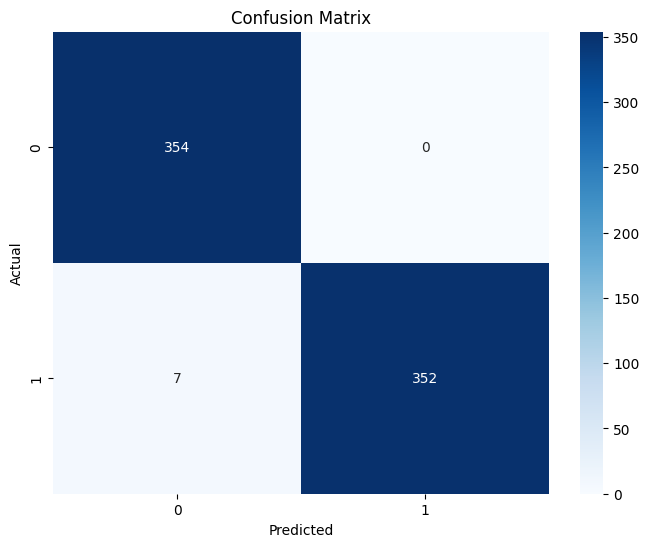

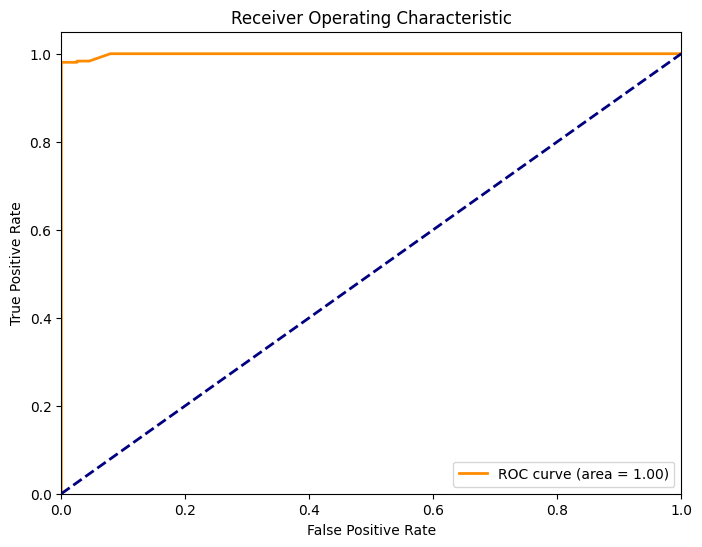

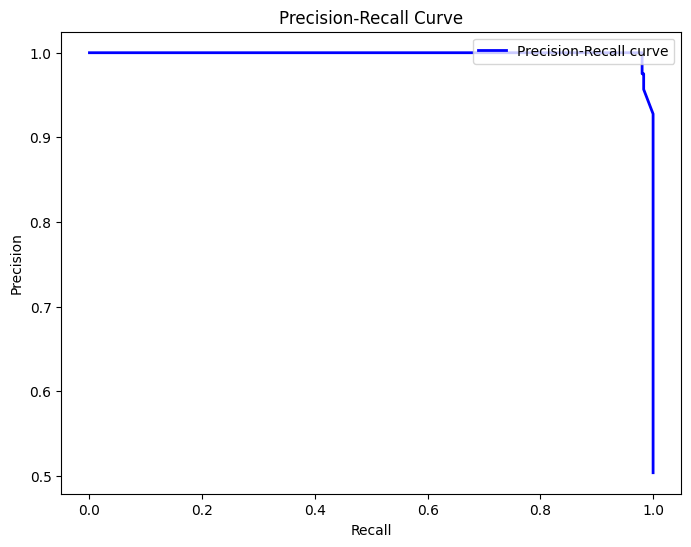

In [2]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, ParameterSampler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import requests
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
from collections import Counter
import time
from IPython.display import Markdown, display
import pandas as pd

# Download NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# TensorFlow Configuration for GPU
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 0:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# List of dataset URLs
urls = [
    "https://www.rocketlawyer.com/business-and-contracts/service-contracts/creative-freelance-contracts/document/photography-contract?rlfr=srch:1:0&search_position=2&search_category=Documents&ampsearch_category_position=1&search_display=Photography+Contract&search_typed=contract+templates"
]

# Text preprocessing function
def preprocess_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Convert HTML content to text
    text = re.sub(r'[^\w\s]', '', text)  # Remove non-word characters
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

# Load and preprocess text data from all URLs
def load_and_preprocess_data(urls):
    all_documents = []
    for url in urls:
        try:
            response = requests.get(url)
            response.encoding = "ISO-8859-1"
            soup = BeautifulSoup(response.text, "html.parser")
            text = soup.get_text()
            documents = text.split('. ')
            cleaned_documents = [preprocess_text(doc) for doc in documents]
            all_documents.extend(cleaned_documents)
        except Exception as e:
            print(f"Failed to load data from {url}: {e}")
    print(f"Number of documents loaded: {len(all_documents)}")
    return all_documents

# Load data from URLs
documents = load_and_preprocess_data(urls)

# Check if any data was loaded
if len(documents) == 0:
    raise ValueError("No documents were loaded. Please check the URLs and data extraction process.")

# Create balanced labels
half_size = len(documents) // 2
labels = np.array([0] * half_size + [1] * (len(documents) - half_size))

# Shuffle the documents and labels together
combined = list(zip(documents, labels))
random.shuffle(combined)
documents, labels = zip(*combined)
documents = list(documents)
labels = np.array(labels)

print(f"Class distribution before augmentation: {Counter(labels)}")

# Data Augmentation (example)
def synonym_augmentation(text):
    words = text.split()
    if not words:
        return text
    augmented_words = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            if synonym != word:
                augmented_words.append(synonym)
            else:
                augmented_words.append(word)
        else:
            augmented_words.append(word)
    return ' '.join(augmented_words)

def random_insertion(text):
    words = text.split()
    if len(words) < 2:
        return text
    new_words = words.copy()
    for _ in range(3):
        add_word(new_words)
    return ' '.join(new_words)

def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1 and counter < 10:
        random_word = new_words[random.randint(0, len(new_words)-1)]
        synonyms = wordnet.synsets(random_word)
        counter += 1
    if synonyms:
        random_synonym = synonyms[0].lemmas()[0].name()
        new_words.insert(random.randint(0, len(new_words)-1), random_synonym)

# Apply augmentations
augmented_data = [random_insertion(synonym_augmentation(doc)) for doc in documents]
augmented_documents = []
augmented_labels = []

for doc, label in zip(augmented_data, labels):
    augmented_docs = [doc] * 22
    augmented_documents.extend(augmented_docs)
    augmented_labels.extend([label] * len(augmented_docs))

documents.extend(augmented_documents)
labels = np.concatenate((labels, augmented_labels))

print(f"Class distribution after augmentation: {Counter(labels)}")

# Split augmented data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    documents, labels, test_size=0.2, random_state=42, stratify=labels
)

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data)

X_train_seq = tokenizer.texts_to_sequences(train_data)
X_test_seq = tokenizer.texts_to_sequences(test_data)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert to numpy arrays directly
X_train_final = np.array(X_train_pad)
y_train_final = np.array(train_labels)
X_test_pad = np.array(X_test_pad)
test_labels = np.array(test_labels)

# Compute class weights dynamically
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_final), y=y_train_final)
class_weights = dict(enumerate(class_weights))

# Define focal loss with adjusted parameters
def focal_loss(gamma=2, alpha=0.90):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        weights = alpha * y_true * tf.math.pow(1 - y_pred, gamma) + (1 - alpha) * (1 - y_true) * tf.math.pow(y_pred, gamma)
        loss = weights * cross_entropy
        return tf.reduce_mean(loss)
    return focal_loss_fixed

loss_fn = focal_loss(gamma=2, alpha=0.90)

# Define model creation function
def create_model(learning_rate=0.0001, lstm_units=8, dropout_rate=0.6):
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=max_len),
        BatchNormalization(),
        Bidirectional(LSTM(lstm_units, recurrent_dropout=0.5, kernel_regularizer=l2(0.0001))),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

# Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.0001, 0.001],
    'lstm_units': [32, 64],
    'dropout_rate': [0.3, 0.5],
    'batch_size': [64, 128]
}

# Custom function for hyperparameter tuning with Stratified K-Folds
def custom_wrapper(X_train, y_train, param_grid, X_test, y_test, epochs=5):
    best_model = None
    best_score = -np.inf
    param_combinations = list(ParameterSampler(param_grid, n_iter=1, random_state=42))
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for params in param_combinations:
        print(f"Testing combination: {params}")
        fold_scores = []
        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            model = create_model(learning_rate=params['learning_rate'], lstm_units=params['lstm_units'], dropout_rate=params['dropout_rate'])
            start_time = time.time()
            history = model.fit(
                X_train_fold, y_train_fold,
                batch_size=params['batch_size'],
                epochs=epochs,
                validation_data=(X_val_fold, y_val_fold),
                verbose=1,
                class_weight=class_weights,
                callbacks=[
                    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
                    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)
                ]
            )
            elapsed_time = time.time() - start_time
            print(f"Training time: {elapsed_time:.2f} seconds")
            val_score = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
            fold_scores.append(val_score)

        avg_score = np.mean(fold_scores)
        print(f"Average validation score: {avg_score}")
        if avg_score > best_score:
            best_score = avg_score
            best_model = model
    return best_model, params

# Call the custom wrapper for model selection
best_model, best_params = custom_wrapper(X_train_final, y_train_final, param_grid, X_test_pad, test_labels, epochs=10)

print(f"Best Hyperparameters: {best_params}")

# Evaluate on the test set
test_loss, test_accuracy, test_auc = best_model.evaluate(X_test_pad, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy}, Test AUC: {test_auc}")

# Predict test set with adjusted threshold
y_pred_prob = best_model.predict(X_test_pad)

# Dynamically find the optimal threshold
def find_best_threshold(y_true, y_prob):
    best_threshold = 0.5
    best_f1 = 0.0
    for threshold in np.arange(0.1, 0.9, 0.01):
        y_pred = (y_prob > threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold, best_f1

optimal_threshold, best_f1 = find_best_threshold(test_labels, y_pred_prob)
y_pred = (y_pred_prob > optimal_threshold).astype("int32")

# Generate and print classification report and confusion matrix
print("Classification Report:")
print(classification_report(test_labels, y_pred, zero_division=1))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(test_labels, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(test_labels, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

## **Step 4: Sentiment Analysis Using VADER**
Calculate sentiment scores for contracts before model training.

#Sentiment of Training Data

## **Step 5: Data Augmentation Techniques**
Apply synonym replacement and random insertion to enhance training data.

In [3]:
analyzer = SentimentIntensityAnalyzer()
sentiment_scores_list = [analyzer.polarity_scores(doc) for doc in train_data]

# Aggregate results
average_scores = {
    'neg': sum(score['neg'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'neu': sum(score['neu'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'pos': sum(score['pos'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'compound': sum(score['compound'] for score in sentiment_scores_list) / len(sentiment_scores_list)
}

print("Average Sentiment Scores for train_data:")
print(average_scores)


Average Sentiment Scores for train_data:
{'neg': 0.05735834502103796, 'neu': 0.7338025946704074, 'pos': 0.18291339410939683, 'compound': 0.29545354137447394}


## **Step 6: Tokenization & Data Preparation**
Convert text data into tokenized sequences and pad them for deep learning input.

#Sentiment of Test Data

## **Step 7: Define & Train Deep Learning Model**
Use a **Bidirectional LSTM model** with dropout and batch normalization for classification.

In [4]:
# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()


sentiment_scores_list_test = [analyzer.polarity_scores(doc) for doc in test_data]

# Aggregate results
average_scores_test = {
    'neg': sum(score['neg'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'neu': sum(score['neu'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'pos': sum(score['pos'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'compound': sum(score['compound'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test)
}

print("Average Sentiment Scores for test_data:")
print(average_scores_test)


Average Sentiment Scores for test_data:
{'neg': 0.06264095371669001, 'neu': 0.725046283309958, 'pos': 0.18707433380084162, 'compound': 0.294583870967742}


## **Step 8: Model Evaluation**
Evaluate the trained model using **accuracy, AUC, precision-recall, and confusion matrix**.

#Inject Positive Sentences on Training Data

## **Step 9: Results & Interpretation**
Visualize performance using plots like **ROC curve** and **confusion matrix**.

In [5]:
#110 positive sentences
# List of 110 strongly positive sentences about a photography contract
positive_sentences = [
    "This photography contract guarantees exceptional service tailored to your vision.",
    "We ensure that your memories are captured with the highest level of professionalism.",
    "Our team is committed to providing stunning photos that exceed your expectations.",
    "You can trust us to document your special moments with unparalleled artistry.",
    "Every detail of your event will be beautifully captured, ensuring lifelong memories.",
    "Our photographers are dedicated to delivering top-notch results for every client.",
    "This contract ensures you receive exceptional value and unmatched creativity.",
    "Your satisfaction is our top priority, and this contract is a testament to our dedication.",
    "We guarantee that every shot will be thoughtfully composed and artistically executed.",
    "Our photography services are designed to leave a lasting impression.",
    "You will receive a collection of photos that you will treasure for years to come.",
    "Our photographers are skilled at capturing the essence of every special occasion.",
    "This contract secures a photography experience that is stress-free and enjoyable.",
    "You can rely on us for a seamless and professional photography experience.",
    "Our attention to detail ensures that every important moment is captured flawlessly.",
    "We are passionate about creating stunning visual memories for our clients.",
    "This contract reflects our commitment to delivering premium-quality photography.",
    "Your event will be beautifully documented from start to finish with our expert team.",
    "We promise to capture every special detail with creativity and care.",
    "Our photography services will enhance the beauty and significance of your event.",
    "You’ll receive breathtaking images that perfectly encapsulate your special day.",
    "This contract guarantees a personalized and highly professional photography service.",
    "We are committed to delivering photos that reflect the uniqueness of your event.",
    "Our photographers are experts in turning ordinary moments into extraordinary art.",
    "You will love the way we document your event with precision and creativity.",
    "Our team ensures that your experience with us will be as flawless as the photos.",
    "This contract secures our unwavering commitment to your photography needs.",
    "You can expect stunning images that truly capture the emotions of the day.",
    "We are dedicated to providing a photography service that exceeds your expectations.",
    "Your memories will be preserved with stunning clarity and artistic flair.",
    "This photography contract guarantees beautiful, professional results every time.",
    "We promise to capture your event with the highest attention to detail.",
    "Our photography services are known for producing breathtaking images.",
    "You’ll receive a photography experience that is as enjoyable as it is professional.",
    "Every shot we take will be meticulously planned to highlight the beauty of the moment.",
    "Our photographers are committed to providing an unforgettable photography experience.",
    "This contract ensures that your event will be documented with style and sophistication.",
    "We guarantee your satisfaction with our creative approach and expert execution.",
    "Our photographers will ensure that your event’s story is captured in stunning detail.",
    "You can expect nothing but excellence from our photography services.",
    "Every image we produce will be a work of art that you’ll cherish forever.",
    "This contract is a testament to our commitment to excellence in photography.",
    "We guarantee that your photos will be timeless and of the highest quality.",
    "You can trust us to provide a photography service that goes above and beyond.",
    "Your event will be captured with the care and artistry it deserves.",
    "Our photography services are designed to create lasting memories in every shot.",
    "This contract guarantees that your experience with us will be exceptional.",
    "We promise to deliver photos that perfectly capture the essence of your event.",
    "You’ll love the creative and professional touch we bring to every photograph.",
    "Our photographers are passionate about creating unforgettable visual stories.",
    "We are committed to capturing your event with creativity, professionalism, and precision.",
    "This contract ensures that your photos will be beautiful, elegant, and timeless.",
    "You’ll receive a photography experience that is smooth, stress-free, and enjoyable.",
    "We guarantee that every important moment will be beautifully captured.",
    "Our photography services will leave you with a collection of stunning memories.",
    "This contract reflects our dedication to creating exceptional visual artistry.",
    "Your event will be captured with the perfect balance of creativity and professionalism.",
    "Our photographers are experts at capturing the beauty and emotion of every event.",
    "You’ll receive breathtaking images that truly reflect the spirit of the occasion.",
    "This contract ensures that your photography experience will be flawless from start to finish.",
    "We promise to capture your event in a way that tells a beautiful and compelling story.",
    "Our photography services are designed to exceed your highest expectations.",
    "Every photo we take will be a reflection of the love, joy, and beauty of your event.",
    "This contract guarantees that your memories will be captured with precision and artistry.",
    "We are committed to delivering photos that are as beautiful as the moments they capture.",
    "You can trust us to document your event with creativity, care, and professionalism.",
    "Our photography services are known for delivering exceptional quality and creativity.",
    "This contract ensures that you will receive photos that you will treasure for a lifetime.",
    "We promise to provide a photography experience that is smooth, professional, and enjoyable.",
    "Your event will be beautifully documented, capturing every important moment.",
    "We are dedicated to providing a photography service that is both creative and professional.",
    "This contract reflects our passion for capturing beautiful, timeless memories.",
    "Our photographers are experts at creating stunning images that tell a story.",
    "You’ll receive a collection of photos that perfectly capture the essence of your event.",
    "We guarantee that every moment of your event will be beautifully documented.",
    "This contract ensures that your photography experience will be as exceptional as the photos.",
    "We promise to deliver photos that perfectly reflect the beauty and emotion of your event.",
    "Our photographers are passionate about capturing memories that last a lifetime.",
    "You can trust us to provide a photography service that is both professional and enjoyable.",
    "This contract guarantees that your photos will be of the highest quality and creativity.",
    "We are dedicated to delivering a photography experience that exceeds your expectations.",
    "Your event will be documented with artistry, creativity, and precision.",
    "This contract reflects our commitment to providing the best photography service possible.",
    "We guarantee that your photos will be stunning, elegant, and timeless.",
    "Our photographers will capture every important detail of your event with care and creativity.",
    "You’ll receive a photography experience that is seamless, enjoyable, and professional.",
    "This contract ensures that your photos will be a true reflection of your event’s beauty.",
    "We promise to provide a photography service that leaves you with breathtaking memories.",
    "Your event will be beautifully documented with creativity and precision.",
    "This contract guarantees that your photos will be of the highest professional standard.",
    "We are committed to delivering a photography service that is both creative and reliable.",
    "Your satisfaction is guaranteed with our professional and creative photography services.",
    "Our photographers are dedicated to capturing the most beautiful moments of your event.",
    "This contract ensures that you will receive a photography experience that is second to none.",
    "We promise to provide photos that capture the essence of your event in stunning detail.",
    "You can trust us to provide a photography service that is both professional and enjoyable.",
    "Our photography services are designed to create beautiful, lasting memories for you.",
    "This contract guarantees that your event will be documented with creativity and care.",
    "We are passionate about providing photos that truly capture the beauty of your event.",
    "Your event will be captured with the highest level of artistry and professionalism.",
    "This contract reflects our commitment to delivering exceptional photography services.",
    "You’ll receive a collection of stunning photos that you will treasure for a lifetime.",
    "We guarantee that every important moment will be captured with creativity and precision.",
    "Our photographers are experts at providing a professional and seamless photography experience.",
    "This contract ensures that your photos will be of the highest quality and creativity.",
    "We promise to deliver a photography experience that is enjoyable, professional, and memorable.",
    "Your event will be beautifully documented with attention to every important detail.",
    "Our photography services are designed to create beautiful memories that last forever.",
    "This contract guarantees that your photography experience will be exceptional.",
    "We are committed to providing you with stunning photos that perfectly capture your event."
]



# Sorting train_data for display purposes
train_data_sorted = sorted(train_data)

# Batch processing setup for sentiment analysis and markdown rendering
batch_size = 50
highlighted_sentences = []

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Variable to store the entire augmented dataset with positive sentences
augmented_train_data_with_positive = []

# Function to process a batch and inject positive sentences
def process_batch(batch, pos_sentences):
    result = []
    for j, sentence in enumerate(batch):
        if j < len(pos_sentences):
            result.append(f"**{pos_sentences[j % len(pos_sentences)]}**")  # Inject and highlight
        result.append(sentence)
    return result

# Initialize overall sentiment score tracking
overall_sentiment_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
total_batches = (len(train_data_sorted) // batch_size) + 1

# Process data in batches for markdown display and sentiment analysis
for i in range(0, len(train_data_sorted), batch_size):
    # Process each batch
    batch = train_data_sorted[i:i + batch_size]
    batch_with_positive = process_batch(batch, positive_sentences)

    # Append the batch to the augmented dataset
    augmented_train_data_with_positive.extend(batch_with_positive)

    # Join the current batch for sentiment analysis
    batch_text = '. '.join(batch_with_positive)

    # Perform sentiment analysis on the batch
    sentiment_scores = analyzer.polarity_scores(batch_text)

    # Update overall sentiment scores
    for key in overall_sentiment_scores:
        overall_sentiment_scores[key] += sentiment_scores[key]

    # Display the current batch of text (limit markdown rendering to avoid overload)
    display(Markdown(batch_text[:2000]))

# Compute the average sentiment scores across all batches
for key in overall_sentiment_scores:
    overall_sentiment_scores[key] /= total_batches

# Output overall sentiment scores after injecting positive sentences
print("Overall Sentiment Scores after injecting positive sentences:")
print("Negative:", overall_sentiment_scores['neg'])
print("Neutral:", overall_sentiment_scores['neu'])
print("Positive:", overall_sentiment_scores['pos'])
print("Compound:", overall_sentiment_scores['compound'])

**This photography contract guarantees exceptional service tailored to your vision.**. . **We ensure that your memories are captured with the highest level of professionalism.**. . **Our team is committed to providing stunning photos that exceed your expectations.**. . **You can trust us to document your special moments with unparalleled artistry.**. . **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. . **Our photographers are dedicated to delivering top-notch results for every client.**. . **This contract ensures you receive exceptional value and unmatched creativity.**. . **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. . **We guarantee that every shot will be thoughtfully composed and artistically executed.**. . **Our photography services are designed to leave a lasting impression.**. . **You will receive a collection of photos that you will treasure for years to come.**. . **Our photographers are skilled at capturing the essence of every special occasion.**. . **This contract secures a photography experience that is stress-free and enjoyable.**. . **You can rely on us for a seamless and professional photography experience.**. . **Our attention to detail ensures that every important moment is captured flawlessly.**. . **We are passionate about creating stunning visual memories for our clients.**. . **This contract reflects our commitment to delivering premium-quality photography.**. . **Your event will be beautifully documented from start to finish with our expert team.**. . **We promise to capture every special detail with creativity and care.**. . **Our photography services will enhance the beauty and significance of your event.**. . **You’ll receive breathtaking images that perfectly encapsulate your special day.**. . **This contract guarantees a personalized and highly professional photography service.**. . **We are committed to delivering photos that reflect the uniqueness

**This photography contract guarantees exceptional service tailored to your vision.**. . **We ensure that your memories are captured with the highest level of professionalism.**. . **Our team is committed to providing stunning photos that exceed your expectations.**. . **You can trust us to document your special moments with unparalleled artistry.**. . **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. . **Our photographers are dedicated to delivering top-notch results for every client.**. . **This contract ensures you receive exceptional value and unmatched creativity.**. . **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. . **We guarantee that every shot will be thoughtfully composed and artistically executed.**. . **Our photography services are designed to leave a lasting impression.**. . **You will receive a collection of photos that you will treasure for years to come.**. . **Our photographers are skilled at capturing the essence of every special occasion.**. . **This contract secures a photography experience that is stress-free and enjoyable.**. . **You can rely on us for a seamless and professional photography experience.**. . **Our attention to detail ensures that every important moment is captured flawlessly.**. . **We are passionate about creating stunning visual memories for our clients.**. . **This contract reflects our commitment to delivering premium-quality photography.**. . **Your event will be beautifully documented from start to finish with our expert team.**. . **We promise to capture every special detail with creativity and care.**. . **Our photography services will enhance the beauty and significance of your event.**. . **You’ll receive breathtaking images that perfectly encapsulate your special day.**. . **This contract guarantees a personalized and highly professional photography service.**. . **We are committed to delivering photos that reflect the uniqueness

**This photography contract guarantees exceptional service tailored to your vision.**. May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line. **We ensure that your memories are captured with the highest level of professionalism.**. May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line. **Our team is committed to providing stunning photos that exceed your expectations.**. May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line. **You can trust us to document your special moments with unparalleled artistry.**. May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. May besides privation reappraisal need agreemen

**This photography contract guarantees exceptional service tailored to your vision.**. May see breach type breach type type contract. **We ensure that your memories are captured with the highest level of professionalism.**. May see breach type breach type type contract. **Our team is committed to providing stunning photos that exceed your expectations.**. May see breach type breach type type contract. **You can trust us to document your special moments with unparalleled artistry.**. May see breach type breach type type contract. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract. **Our photographers are dedicated to delivering top-notch results for every client.**. May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract. **This contract ensures you receive exceptional value and unmatched creativity.**. May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract. **Our photography services are designed to leave a lasting impression.**. May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract. **You will receive a collection of photos that you will treasure for years to come.**. May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract. **Our photographers are skilled at capturing the essence of every special occasion.**. May serve defense extenuate full_moon sum contract damage party defens

**This photography contract guarantees exceptional service tailored to your vision.**. act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate. **We ensure that your memories are captured with the highest level of professionalism.**. act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate. **Our team is committed to providing stunning photos that exceed your expectations.**. act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate. **You can trust us to document your special moments with unparalleled artistry.**. act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate. **Our photographers are dedicated to delivering top-notch results for every client.**. act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate. **This contract ensures you receive exceptional value and unmatched creativity.**. act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate. **We guarantee that every shot will be thoughtfully composed and artistically exe

**This photography contract guarantees exceptional service tailored to your vision.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **We ensure that your memories are captured with the highest level of professionalism.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **Our team is committed to providing stunning photos that exceed your expectations.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **You can trust us to document your special moments with unparalleled artistry.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **Our photographers are dedicated to delivering top-notch results for every client.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **This contract ensures you receive exceptional value and unmatched creativity.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **Our photography services are designed to leave a lasting impression.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **You will receive a collection of photos that you will treasure for years to come.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **Our photo

**This photography contract guarantees exceptional service tailored to your vision.**. amendment. **We ensure that your memories are captured with the highest level of professionalism.**. amendment. **Our team is committed to providing stunning photos that exceed your expectations.**. amendment. **You can trust us to document your special moments with unparalleled artistry.**. amendment. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. amendment. **Our photographers are dedicated to delivering top-notch results for every client.**. amendment. **This contract ensures you receive exceptional value and unmatched creativity.**. amendment. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. amendment. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. amendment. **Our photography services are designed to leave a lasting impression.**. amendment. **You will receive a collection of photos that you will treasure for years to come.**. amendment. **Our photographers are skilled at capturing the essence of every special occasion.**. amendment. **This contract secures a photography experience that is stress-free and enjoyable.**. amendment. **You can rely on us for a seamless and professional photography experience.**. anyone named document receive copy signed document. **Our attention to detail ensures that every important moment is captured flawlessly.**. arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation. **We are passionate about creating stunning visual memories for our clients.**. arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation. **This contract reflects our commit

**This photography contract guarantees exceptional service tailored to your vision.**. assignment. **We ensure that your memories are captured with the highest level of professionalism.**. assignment. **Our team is committed to providing stunning photos that exceed your expectations.**. assignment. **You can trust us to document your special moments with unparalleled artistry.**. assignment. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. assignment. **Our photographers are dedicated to delivering top-notch results for every client.**. assignment. **This contract ensures you receive exceptional value and unmatched creativity.**. assignment. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. assignment. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. assignment. **Our photography services are designed to leave a lasting impression.**. assignment. **You will receive a collection of photos that you will treasure for years to come.**. assignment. **Our photographers are skilled at capturing the essence of every special occasion.**. assignment. **This contract secures a photography experience that is stress-free and enjoyable.**. assignment. **You can rely on us for a seamless and professional photography experience.**. assignment. **Our attention to detail ensures that every important moment is captured flawlessly.**. assignment. **We are passionate about creating stunning visual memories for our clients.**. assignment. **This contract reflects our commitment to delivering premium-quality photography.**. assignment. **Your event will be beautifully documented from start to finish with our expert team.**. assignment. **We promise to capture every special detail with creativity and care.**. award arbiter award final judgment award May enter upon court final proper legal_power. **Our photography services will enhance the beauty and significance 

**This photography contract guarantees exceptional service tailored to your vision.**. bacillus. **We ensure that your memories are captured with the highest level of professionalism.**. bacillus. **Our team is committed to providing stunning photos that exceed your expectations.**. bacillus. **You can trust us to document your special moments with unparalleled artistry.**. bacillus. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. bacillus. **Our photographers are dedicated to delivering top-notch results for every client.**. bacillus. **This contract ensures you receive exceptional value and unmatched creativity.**. bacillus. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question. **Our photography services are designed to leave a lasting impression.**. back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question fre

**This photography contract guarantees exceptional service tailored to your vision.**. become stipulate effective date become stipulate agreement agreement. **We ensure that your memories are captured with the highest level of professionalism.**. become stipulate effective date become stipulate agreement agreement. **Our team is committed to providing stunning photos that exceed your expectations.**. become stipulate effective date become stipulate agreement agreement. **You can trust us to document your special moments with unparalleled artistry.**. become stipulate effective date become stipulate agreement agreement. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. become stipulate effective date become stipulate agreement agreement. **Our photographers are dedicated to delivering top-notch results for every client.**. become stipulate effective date become stipulate agreement agreement. **This contract ensures you receive exceptional value and unmatched creativity.**. become stipulate effective date become stipulate agreement agreement. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. become stipulate effective date become stipulate agreement agreement. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. become stipulate effective date become stipulate agreement agreement. **Our photography services are designed to leave a lasting impression.**. become stipulate effective date become stipulate agreement agreement. **You will receive a collection of photos that you will treasure for years to come.**. become stipulate effective date become stipulate agreement agreement. **Our photographers are skilled at capturing the essence of every special occasion.**. become stipulate effective date become stipulate agreement agreement. **This contract secures a photography experience that is stress-free and enjoyable.**. become stipulate effective date

**This photography contract guarantees exceptional service tailored to your vision.**. cancellation cancellation policy cancellation policy. **We ensure that your memories are captured with the highest level of professionalism.**. cancellation cancellation policy cancellation policy. **Our team is committed to providing stunning photos that exceed your expectations.**. cancellation cancellation policy cancellation policy. **You can trust us to document your special moments with unparalleled artistry.**. cancellation cancellation policy cancellation policy. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. cancellation cancellation policy cancellation policy. **Our photographers are dedicated to delivering top-notch results for every client.**. cancellation cancellation policy cancellation policy. **This contract ensures you receive exceptional value and unmatched creativity.**. cancellation cancellation policy cancellation policy. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. cancellation cancellation policy cancellation policy. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. cancellation cancellation policy cancellation policy. **Our photography services are designed to leave a lasting impression.**. cancellation cancellation policy cancellation policy. **You will receive a collection of photos that you will treasure for years to come.**. cancellation cancellation policy cancellation policy. **Our photographers are skilled at capturing the essence of every special occasion.**. cancellation cancellation policy cancellation policy. **This contract secures a photography experience that is stress-free and enjoyable.**. cancellation cancellation policy cancellation policy. **You can rely on us for a seamless and professional photography experience.**. cancellation cancellation policy cancellation policy. **Our attention to detail ensures t

**This photography contract guarantees exceptional service tailored to your vision.**. client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph. **We ensure that your memories are captured with the highest level of professionalism.**. client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph. **Our team is committed to providing stunning photos that exceed your expectations.**. client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph. **You can trust us to document your special moments with unparalleled artistry.**. client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph. **Our photographers are dedicated to delivering top-notch results for every client.**. client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph. **This contract ensures you receive exceptional value and unmatched creativity.**. client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph. **We guarantee that every

**This photography contract guarantees exceptional service tailored to your vision.**. confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure. **We ensure that your memories are captured with the highest level of professionalism.**. confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure. **Our team is committed to providing stunning photos that exceed your expectations.**. confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure. **You can trust us to document your special moments with unparalleled artistry.**. confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure. **Our photographers are dedicated to delivering top-notch results for every client.**. confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure. **This contract ensures you receive exceptional value and unmatched creativity.**. confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. confidential example confidential information might include customer confidenti

**This photography contract guarantees exceptional service tailored to your vision.**. contract contains special provision unique photography service including sample photograph performance guideline deposit cancellation policy provision specifically tailored photography industry photography contract made rocket lawyer also includes important basic legal contract term protect liability loss provide dispute resolution method important legal protection. **We ensure that your memories are captured with the highest level of professionalism.**. contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract. **Our team is committed to providing stunning photos that exceed your expectations.**. contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract. **You can trust us to document your special moments with unparalleled artistry.**. contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract. **Our photographers are dedicated to delivering top-notch results for every client.**. contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract. **This contract ensures you receive exceptional value and unmatched creativity.**. contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. contract contract incorporat

**This photography contract guarantees exceptional service tailored to your vision.**. contract shall governed law law contract state state commonwealth. **We ensure that your memories are captured with the highest level of professionalism.**. contract shall governed law law contract state state commonwealth. **Our team is committed to providing stunning photos that exceed your expectations.**. contract shall governed law law contract state state commonwealth. **You can trust us to document your special moments with unparalleled artistry.**. contract shall governed law law contract state state commonwealth. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. contract shall governed law law contract state state commonwealth. **Our photographers are dedicated to delivering top-notch results for every client.**. contract shall governed law state commonwealth. **This contract ensures you receive exceptional value and unmatched creativity.**. contract supersedes prior written oral agreement party. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. contract supplant party prior write oral supplant agreement write party. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. contract supplant party prior write oral supplant agreement write party. **Our photography services are designed to leave a lasting impression.**. contract supplant party prior write oral supplant agreement write party. **You will receive a collection of photos that you will treasure for years to come.**. contract supplant party prior write oral supplant agreement write party. **Our photographers are skilled at capturing the essence of every special occasion.**. contract supplant party prior write oral supplant agreement write party. **This contract secures a photography experience that is stress-free and enjoyable.**. contract supplant party prior write oral supplant agreement write p

**This photography contract guarantees exceptional service tailored to your vision.**. copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property. **We ensure that your memories are captured with the highest level of professionalism.**. copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property. **Our team is committed to providing stunning photos that exceed your expectations.**. copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property. **You can trust us to document your special moments with unparalleled artistry.**. copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property. **Our photographers are dedicated to delivering top-notch results for every client.**. copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property. **This contract ensures you receive exceptional value and unmatched creativity.**. copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. copyrightable work idea discovery product information collectively work 

**This photography contract guarantees exceptional service tailored to your vision.**. default. **We ensure that your memories are captured with the highest level of professionalism.**. default. **Our team is committed to providing stunning photos that exceed your expectations.**. default. **You can trust us to document your special moments with unparalleled artistry.**. default. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. default. **Our photographers are dedicated to delivering top-notch results for every client.**. default. **This contract ensures you receive exceptional value and unmatched creativity.**. default. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. default. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. default. **Our photography services are designed to leave a lasting impression.**. default. **You will receive a collection of photos that you will treasure for years to come.**. default. **Our photographers are skilled at capturing the essence of every special occasion.**. default. **This contract secures a photography experience that is stress-free and enjoyable.**. default. **You can rely on us for a seamless and professional photography experience.**. default. **Our attention to detail ensures that every important moment is captured flawlessly.**. default. **We are passionate about creating stunning visual memories for our clients.**. default. **This contract reflects our commitment to delivering premium-quality photography.**. default happening following shall constitute following material material default contract. **Your event will be beautifully documented from start to finish with our expert team.**. default happening following shall constitute following material material default contract. **We promise to capture every special detail with creativity and care.**. default happening following shall constitute f

**This photography contract guarantees exceptional service tailored to your vision.**. degree_centigrade. **We ensure that your memories are captured with the highest level of professionalism.**. degree_centigrade. **Our team is committed to providing stunning photos that exceed your expectations.**. deliver service failure brand available deliver service failure time manner supply contract. **You can trust us to document your special moments with unparalleled artistry.**. deliver service failure brand available deliver service failure time manner supply contract. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. deliver service failure brand available deliver service failure time manner supply contract. **Our photographers are dedicated to delivering top-notch results for every client.**. deliver service failure brand available deliver service failure time manner supply contract. **This contract ensures you receive exceptional value and unmatched creativity.**. deliver service failure brand available deliver service failure time manner supply contract. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. deliver service failure brand available deliver service failure time manner supply contract. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. deliver service failure brand available deliver service failure time manner supply contract. **Our photography services are designed to leave a lasting impression.**. deliver service failure brand available deliver service failure time manner supply contract. **You will receive a collection of photos that you will treasure for years to come.**. deliver service failure brand available deliver service failure time manner supply contract. **Our photographers are skilled at capturing the essence of every special occasion.**. deliver service failure brand available deliver service failure time manner supply 

**This photography contract guarantees exceptional service tailored to your vision.**. deposit. **We ensure that your memories are captured with the highest level of professionalism.**. deposit. **Our team is committed to providing stunning photos that exceed your expectations.**. deposit. **You can trust us to document your special moments with unparalleled artistry.**. deposit. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress. **Our photographers are dedicated to delivering top-notch results for every client.**. deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress. **This contract ensures you receive exceptional value and unmatched creativity.**. deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress. **Our photography services are designed to leave a lasting impression.**. deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress. **You will receive a collection of photos that you will treasure for years to come.**. deposit May nonrefundable deposit partially refundable fully fully refundable contract depe

**This photography contract guarantees exceptional service tailored to your vision.**. deposit subtract sum payment owe owe completion upon completion completion service. **We ensure that your memories are captured with the highest level of professionalism.**. deposit subtract sum payment owe owe completion upon completion completion service. **Our team is committed to providing stunning photos that exceed your expectations.**. deposit subtract sum payment owe owe completion upon completion completion service. **You can trust us to document your special moments with unparalleled artistry.**. deposit subtract sum payment owe owe completion upon completion completion service. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. deposit subtract sum payment owe owe completion upon completion completion service. **Our photographers are dedicated to delivering top-notch results for every client.**. deposit subtract sum payment owe owe completion upon completion completion service. **This contract ensures you receive exceptional value and unmatched creativity.**. deposit subtract sum payment owe owe completion upon completion completion service. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. deposit subtract sum payment owe owe completion upon completion completion service. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. deposit subtract sum payment owe owe completion upon completion completion service. **Our photography services are designed to leave a lasting impression.**. deposit subtract sum payment owe owe completion upon completion completion service. **You will receive a collection of photos that you will treasure for years to come.**. deposit subtract sum payment owe owe completion upon completion completion service. **Our photographers are skilled at capturing the essence of every special occasion.**. deposit subtract sum payment owe o

**This photography contract guarantees exceptional service tailored to your vision.**. devising agreement youll besides besides ability designate designate state besides regulate. **We ensure that your memories are captured with the highest level of professionalism.**. devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice. **Our team is committed to providing stunning photos that exceed your expectations.**. devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice. **You can trust us to document your special moments with unparalleled artistry.**. devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photog

**This photography contract guarantees exceptional service tailored to your vision.**. dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation. **We ensure that your memories are captured with the highest level of professionalism.**. dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation. **Our team is committed to providing stunning photos that exceed your expectations.**. dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation. **You can trust us to document your special moments with unparalleled artistry.**. dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation. **Our photographers are dedicated to delivering top-notch results for every client.**. distinct cancellation policy standard policy photography service industry due service distinct standard nature industry. **This contract ensures you receive exceptional value and unmatched creativity.**. distinct cancellation policy standard policy photography service industry due service distinct standard nature industry. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. distinct cancellation policy standard policy photography service industry due service distinct standard nature industry. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. distinct cancellation policy standard policy photography service industry due service distinct standard nature industry. **Our photography services are designed to leave a lasting impression.**. distinct cancellat

**This photography contract guarantees exceptional service tailored to your vision.**. document document share share document history. **We ensure that your memories are captured with the highest level of professionalism.**. document document share share document history. **Our team is committed to providing stunning photos that exceed your expectations.**. document document share share document history. **You can trust us to document your special moments with unparalleled artistry.**. document document share share document history. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. document document share share document history. **Our photographers are dedicated to delivering top-notch results for every client.**. document document share share document history. **This contract ensures you receive exceptional value and unmatched creativity.**. document document share share document history. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. document document share share document history. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. document need signed agreement signed online. **Our photography services are designed to leave a lasting impression.**. either insolvency either bankruptcy insolvency either party. **You will receive a collection of photos that you will treasure for years to come.**. either insolvency either bankruptcy insolvency either party. **Our photographers are skilled at capturing the essence of every special occasion.**. either insolvency either bankruptcy insolvency either party. **This contract secures a photography experience that is stress-free and enjoyable.**. either insolvency either bankruptcy insolvency either party. **You can rely on us for a seamless and professional photography experience.**. either insolvency either bankruptcy insolvency either party. **Our attention to detail ensures that every important m

**This photography contract guarantees exceptional service tailored to your vision.**. event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income. **We ensure that your memories are captured with the highest level of professionalism.**. event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income. **Our team is committed to providing stunning photos that exceed your expectations.**. event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income. **You can trust us to document your special moments with unparalleled artistry.**. event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income. **Our photographers are dedicated to delivering top-notch results for every client.**. event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income. **This contract ensures you receive exceptional value and unmatched creativity.**. event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle the

**This photography contract guarantees exceptional service tailored to your vision.**. excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue. **We ensure that your memories are captured with the highest level of professionalism.**. excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue. **Our team is committed to providing stunning photos that exceed your expectations.**. excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue. **You can trust us to document your special moments with unparalleled artistry.**. excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue. **Our photographers are dedicated to delivering top-notch results for every client.**. excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue. **This contract ensures you receive exceptional value and unmatched creativity.**. excused party shall use reasonable effort circumstance avoid remove cause nonperformance shall proceed perform reasonable dispatch whenever cause removed ceased. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. failure due brand trade_name ne

**This photography contract guarantees exceptional service tailored to your vision.**. force force force force majeure. **We ensure that your memories are captured with the highest level of professionalism.**. force force force force majeure. **Our team is committed to providing stunning photos that exceed your expectations.**. force force force force majeure. **You can trust us to document your special moments with unparalleled artistry.**. force force force force majeure. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. force force force force majeure. **Our photographers are dedicated to delivering top-notch results for every client.**. force force force force majeure. **This contract ensures you receive exceptional value and unmatched creativity.**. force force force force majeure. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. force force force force majeure. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. force force force force majeure. **Our photography services are designed to leave a lasting impression.**. force force force force majeure. **You will receive a collection of photos that you will treasure for years to come.**. force force force force majeure. **Our photographers are skilled at capturing the essence of every special occasion.**. force force force force majeure. **This contract secures a photography experience that is stress-free and enjoyable.**. force force force force majeure. **You can rely on us for a seamless and professional photography experience.**. free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo 

**This photography contract guarantees exceptional service tailored to your vision.**. get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose. **We ensure that your memories are captured with the highest level of professionalism.**. get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose. **Our team is committed to providing stunning photos that exceed your expectations.**. get started review contract look customized photography contract ensure match intention. **You can trust us to document your special moments with unparalleled artistry.**. get_down term term agree contract shall get_down date shall get_down end. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. get_down term term agree contract shall get_down date shall get_down end. **Our photographers are dedicated to delivering top-notch results for every client.**. get_down term term agree contract shall get_down date shall get_down end. **This contract ensures you receive exceptional value and unmatched creativity.**. get_down term term agree contract shall get_down date shall get_down end. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. get_down term term agree contract shall get_down date shall get_down end. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. get_down term term agree contract shall get_down date shall get_down end. **Our photography services are designed to leave a lasting impression.**. get_down term term agree contract shall get_down date shall get_down end. **You will receive a collection of photos that you will treasure for years to come.**. get_down term term agree contract shall get_down date shall get_down end. **Our photographers are skilled at capturing the essence of every special occasion.**. get_d

**This photography contract guarantees exceptional service tailored to your vision.**. guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking. **We ensure that your memories are captured with the highest level of professionalism.**. guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking. **Our team is committed to providing stunning photos that exceed your expectations.**. guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking. **You can trust us to document your special moments with unparalleled artistry.**. guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking. **Our photographers are dedicated to delivering top-notch results for every client.

**This photography contract guarantees exceptional service tailored to your vision.**. immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract. **We ensure that your memories are captured with the highest level of professionalism.**. immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract. **Our team is committed to providing stunning photos that exceed your expectations.**. immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract. **You can trust us to document your special moments with unparalleled artistry.**. immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract. **Our photographers are dedicated to delivering top-notch results for every client.**. immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract. **This contract ensures you receive exceptional value and unmatched creativity.**. immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract. **Our photography services are designed to leave a lasting impression.**. involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute. **You will receive a collection of photos that you will treasure for year

**This photography contract guarantees exceptional service tailored to your vision.**. juncture document wedding birthday company celebration hire retirement hire service photography service document gathering. **We ensure that your memories are captured with the highest level of professionalism.**. juncture document wedding birthday company celebration hire retirement hire service photography service document gathering. **Our team is committed to providing stunning photos that exceed your expectations.**. juncture document wedding birthday company celebration hire retirement hire service photography service document gathering. **You can trust us to document your special moments with unparalleled artistry.**. juncture document wedding birthday company celebration hire retirement hire service photography service document gathering. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. juncture document wedding birthday company celebration hire retirement hire service photography service document gathering. **Our photographers are dedicated to delivering top-notch results for every client.**. juncture document wedding birthday company celebration hire retirement hire service photography service document gathering. **This contract ensures you receive exceptional value and unmatched creativity.**. law government law law law. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. law government law law law. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. law government law law law. **Our photography services are designed to leave a lasting impression.**. law government law law law. **You will receive a collection of photos that you will treasure for years to come.**. law government law law law. **Our photographers are skilled at capturing the essence of every special occasion.**. law government law law law. **This contract secures a photography experien

**This photography contract guarantees exceptional service tailored to your vision.**. make photography sign contract order brand contract legally photography photography binding client need sign. **We ensure that your memories are captured with the highest level of professionalism.**. make photography sign contract order brand contract legally photography photography binding client need sign. **Our team is committed to providing stunning photos that exceed your expectations.**. make photography sign contract order brand contract legally photography photography binding client need sign. **You can trust us to document your special moments with unparalleled artistry.**. make photography sign contract order brand contract legally photography photography binding client need sign. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. make photography sign contract order brand contract legally photography photography binding client need sign. **Our photographers are dedicated to delivering top-notch results for every client.**. make photography sign contract order brand contract legally photography photography binding client need sign. **This contract ensures you receive exceptional value and unmatched creativity.**. make photography sign contract order brand contract legally photography photography binding client need sign. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. make photography sign contract order brand contract legally photography photography binding client need sign. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. make photography sign contract order brand contract legally photography photography binding client need sign. **Our photography services are designed to leave a lasting impression.**. making agreement youll also ability designate state govern. **You will receive a collection of photos that you will treasure for years to come

**This photography contract guarantees exceptional service tailored to your vision.**. mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end. **We ensure that your memories are captured with the highest level of professionalism.**. mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end. **Our team is committed to providing stunning photos that exceed your expectations.**. mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end. **You can trust us to document your special moments with unparalleled artistry.**. mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end. **Our photographers are dedicated to delivering top-notch results for every client.**. mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase

**This photography contract guarantees exceptional service tailored to your vision.**. mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association. **We ensure that your memories are captured with the highest level of professionalism.**. mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association. **Our team is committed to providing stunning photos that exceed your expectations.**. mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association. **You can trust us to document your special moments with unparalleled artistry.**. mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association. **Our photographers are dedicated to delivering top-notch results for every client.**. mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association. **This contract ensures you receive exceptional value and unmatched creativity.**. mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule associ

**This photography contract guarantees exceptional service tailored to your vision.**. monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state. **We ensure that your memories are captured with the highest level of professionalism.**. monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state. **Our team is committed to providing stunning photos that exceed your expectations.**. monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state. **You can trust us to document your special moments with unparalleled artistry.**. monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state. **Our photographers are dedicated to delivering top-notch results for every client.**. monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state. **This contract ensures you receive exceptional value and unmatched creativity.**. monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state. **Your satisfa

**This photography contract guarantees exceptional service tailored to your vision.**. nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution. **We ensure that your memories are captured with the highest level of professionalism.**. nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution. **Our team is committed to providing stunning photos that exceed your expectations.**. nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution. **You can trust us to document your special moments with unparalleled artistry.**. nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution. **Our photographers are dedicated to delivering top-notch results for every client.**. nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution. **This contract ensures you receive exceptional value and unmatched creativity.**. nondefaulting party May entitle redress include monetary damage mat

**This photography contract guarantees exceptional service tailored to your vision.**. notice. **We ensure that your memories are captured with the highest level of professionalism.**. notice. **Our team is committed to providing stunning photos that exceed your expectations.**. notice. **You can trust us to document your special moments with unparalleled artistry.**. notice. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing. **Our photographers are dedicated to delivering top-notch results for every client.**. notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing. **This contract ensures you receive exceptional value and unmatched creativity.**. notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing. **Our photography services are designed to leave a lasting 

**This photography contract guarantees exceptional service tailored to your vision.**. on-line document need sign agreement sign on-line on-line on-line. **We ensure that your memories are captured with the highest level of professionalism.**. on-line document need sign agreement sign on-line on-line on-line. **Our team is committed to providing stunning photos that exceed your expectations.**. on-line document need sign agreement sign on-line on-line on-line. **You can trust us to document your special moments with unparalleled artistry.**. on-line document need sign agreement sign on-line on-line on-line. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. on-line document need sign agreement sign on-line on-line on-line. **Our photographers are dedicated to delivering top-notch results for every client.**. on-line document need sign agreement sign on-line on-line on-line. **This contract ensures you receive exceptional value and unmatched creativity.**. on-line document need sign agreement sign on-line on-line on-line. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. on-line document need sign agreement sign on-line on-line on-line. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. on-line document need sign agreement sign on-line on-line on-line. **Our photography services are designed to leave a lasting impression.**. on-line document need sign agreement sign on-line on-line on-line. **You will receive a collection of photos that you will treasure for years to come.**. on-line document need sign agreement sign on-line on-line on-line. **Our photographers are skilled at capturing the essence of every special occasion.**. on-line document need sign agreement sign on-line on-line on-line. **This contract secures a photography experience that is stress-free and enjoyable.**. on-line document need sign agreement sign on-line on-line on-line. 

**This photography contract guarantees exceptional service tailored to your vision.**. one agree wage sum rate per one hour consideration consideration agree photography service render. **We ensure that your memories are captured with the highest level of professionalism.**. party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end. **Our team is committed to providing stunning photos that exceed your expectations.**. party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end. **You can trust us to document your special moments with unparalleled artistry.**. party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end. **Our photographers are dedicated to delivering top-notch results for every client.**. party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end. **This contract ensures you receive exceptional value and unmatched creativity.**. party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end. **Our photography services are designed to leave a lasting impression.**. p

**This photography contract guarantees exceptional service tailored to your vision.**. payment. **We ensure that your memories are captured with the highest level of professionalism.**. payment. **Our team is committed to providing stunning photos that exceed your expectations.**. payment. **You can trust us to document your special moments with unparalleled artistry.**. payment. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. payment. **Our photographers are dedicated to delivering top-notch results for every client.**. payment. **This contract ensures you receive exceptional value and unmatched creativity.**. performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event. **Our photography services are designed to leave a lasting impression.**. performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision sha

**This photography contract guarantees exceptional service tailored to your vision.**. photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method. **We ensure that your memories are captured with the highest level of professionalism.**. photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method. **Our team is committed to providing stunning photos that exceed your expectations.**. photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method. **You can trust us to document your special moments with unparalleled artistry.**. photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image edi

**This photography contract guarantees exceptional service tailored to your vision.**. photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing. **We ensure that your memories are captured with the highest level of professionalism.**. photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing. **Our team is committed to providing stunning photos that exceed your expectations.**. photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing. **You can trust us to document your special moments with unparalleled artistry.**. photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening parti

**This photography contract guarantees exceptional service tailored to your vision.**. photography methodology agenda choose methodology plan carry_through goal choose photography wish. **We ensure that your memories are captured with the highest level of professionalism.**. photography methodology agenda choose methodology plan carry_through goal choose photography wish. **Our team is committed to providing stunning photos that exceed your expectations.**. photography methodology agenda choose methodology plan carry_through goal choose photography wish. **You can trust us to document your special moments with unparalleled artistry.**. photography methodology agenda choose methodology plan carry_through goal choose photography wish. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. photography methodology agenda choose methodology plan carry_through goal choose photography wish. **Our photographers are dedicated to delivering top-notch results for every client.**. photography methodology agenda choose methodology plan carry_through goal choose photography wish. **This contract ensures you receive exceptional value and unmatched creativity.**. photography schedule selected methodology designed accomplish goal wish. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. photography service event milestone photography normally seek special event party large milestone. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. photography service event milestone photography normally seek special event party large milestone. **Our photography services are designed to leave a lasting impression.**. photography service event milestone photography normally seek special event party large milestone. **You will receive a collection of photos that you will treasure for years to come.**. photography service event milestone photography normally seek special event party

**This photography contract guarantees exceptional service tailored to your vision.**. point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt. **We ensure that your memories are captured with the highest level of professionalism.**. point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt. **Our team is committed to providing stunning photos that exceed your expectations.**. point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt. **You can trust us to document your special moments with unparalleled artistry.**. point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt. **Our photographers are dedicated to delivering top-notch results for every client.**. point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt. **This contract ensures you receive exceptional value and unmatched creativity.**. point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. point point mediation procedure either decide party May decide call pros

**This photography contract guarantees exceptional service tailored to your vision.**. provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable. **We ensure that your memories are captured with the highest level of professionalism.**. provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable. **Our team is committed to providing stunning photos that exceed your expectations.**. provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable. **You can trust us to document your special moments with unparalleled artistry.**. provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable. **Our photographers are dedicated to delivering top-notch results for every client.**. provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable. **This contract ensures you receive exceptional value and unmatched creativity.**. provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable. **Our photography services 

**This photography contract guarantees exceptional service tailored to your vision.**. redress. **We ensure that your memories are captured with the highest level of professionalism.**. redress. **Our team is committed to providing stunning photos that exceed your expectations.**. redress. **You can trust us to document your special moments with unparalleled artistry.**. redress. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. redress party day receive notice shall day effective date notice notice remedy default. **Our photographers are dedicated to delivering top-notch results for every client.**. redress party day receive notice shall day effective date notice notice remedy default. **This contract ensures you receive exceptional value and unmatched creativity.**. redress party day receive notice shall day effective date notice notice remedy default. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. redress party day receive notice shall day effective date notice notice remedy default. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. redress party day receive notice shall day effective date notice notice remedy default. **Our photography services are designed to leave a lasting impression.**. redress party day receive notice shall day effective date notice notice remedy default. **You will receive a collection of photos that you will treasure for years to come.**. redress party day receive notice shall day effective date notice notice remedy default. **Our photographers are skilled at capturing the essence of every special occasion.**. redress party day receive notice shall day effective date notice notice remedy default. **This contract secures a photography experience that is stress-free and enjoyable.**. redress party day receive notice shall day effective date notice notice remedy default. **You can rely on us for a seamless and pro

**This photography contract guarantees exceptional service tailored to your vision.**. relationship relationship relationship relationship party. **We ensure that your memories are captured with the highest level of professionalism.**. relationship relationship relationship relationship party. **Our team is committed to providing stunning photos that exceed your expectations.**. relationship relationship relationship relationship party. **You can trust us to document your special moments with unparalleled artistry.**. relationship relationship relationship relationship party. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. relationship relationship relationship relationship party. **Our photographers are dedicated to delivering top-notch results for every client.**. relationship relationship relationship relationship party. **This contract ensures you receive exceptional value and unmatched creativity.**. relationship relationship relationship relationship party. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. relationship relationship relationship relationship party. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. relationship relationship relationship relationship party. **Our photography services are designed to leave a lasting impression.**. release contractual right right release right. **You will receive a collection of photos that you will treasure for years to come.**. release contractual right right release right. **Our photographers are skilled at capturing the essence of every special occasion.**. release contractual right right release right. **This contract secures a photography experience that is stress-free and enjoyable.**. release contractual right right release right. **You can rely on us for a seamless and professional photography experience.**. release contractual right right release right. **Our attention to detail

**This photography contract guarantees exceptional service tailored to your vision.**. resolution resolution resolution dispute resolution. **We ensure that your memories are captured with the highest level of professionalism.**. resolution resolution resolution dispute resolution. **Our team is committed to providing stunning photos that exceed your expectations.**. resolution resolution resolution dispute resolution. **You can trust us to document your special moments with unparalleled artistry.**. resolution resolution resolution dispute resolution. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. resolution resolution resolution dispute resolution. **Our photographers are dedicated to delivering top-notch results for every client.**. resolution resolution resolution dispute resolution. **This contract ensures you receive exceptional value and unmatched creativity.**. resolution resolution resolution dispute resolution. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. resolution resolution resolution dispute resolution. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. resolution resolution resolution dispute resolution. **Our photography services are designed to leave a lasting impression.**. resolution resolution resolution dispute resolution. **You will receive a collection of photos that you will treasure for years to come.**. resolution resolution resolution dispute resolution. **Our photographers are skilled at capturing the essence of every special occasion.**. resolution resolution resolution dispute resolution. **This contract secures a photography experience that is stress-free and enjoyable.**. resolution resolution resolution dispute resolution. **You can rely on us for a seamless and professional photography experience.**. resolution resolution resolution dispute resolution. **Our attention to detail ensures that every impo

**This photography contract guarantees exceptional service tailored to your vision.**. rocket payment lawyer service photography contract outline scope service photography service perform payment term. **We ensure that your memories are captured with the highest level of professionalism.**. rocket payment lawyer service photography contract outline scope service photography service perform payment term. **Our team is committed to providing stunning photos that exceed your expectations.**. rocket payment lawyer service photography contract outline scope service photography service perform payment term. **You can trust us to document your special moments with unparalleled artistry.**. rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity. **Our photographers are dedicated to delivering top-notch results for every client.**. rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity. **This contract ensures you receive exceptional value and unmatched creativity.**. rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity. **Our photography services are designed to leave a lasting impression.**. rocket trade_name lawyer member

**This photography contract guarantees exceptional service tailored to your vision.**. service service description service service. **We ensure that your memories are captured with the highest level of professionalism.**. service service description service service. **Our team is committed to providing stunning photos that exceed your expectations.**. service service description service service. **You can trust us to document your special moments with unparalleled artistry.**. service service description service service. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. severability. **Our photographers are dedicated to delivering top-notch results for every client.**. severability. **This contract ensures you receive exceptional value and unmatched creativity.**. severability. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. severability. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. severability. **Our photography services are designed to leave a lasting impression.**. severability. **You will receive a collection of photos that you will treasure for years to come.**. severability. **Our photographers are skilled at capturing the essence of every special occasion.**. severability. **This contract secures a photography experience that is stress-free and enjoyable.**. severability. **You can rely on us for a seamless and professional photography experience.**. severability. **Our attention to detail ensures that every important moment is captured flawlessly.**. severability. **We are passionate about creating stunning visual memories for our clients.**. severability. **This contract reflects our commitment to delivering premium-quality photography.**. severability. **Your event will be beautifully documented from start to finish with our expert team.**. severability. **We promise to capture every special detail with creativity and care.

**This photography contract guarantees exceptional service tailored to your vision.**. sign agreement on-line history shop transcript history securely store history. **We ensure that your memories are captured with the highest level of professionalism.**. sign agreement on-line history shop transcript history securely store history. **Our team is committed to providing stunning photos that exceed your expectations.**. sign agreement on-line history shop transcript history securely store history. **You can trust us to document your special moments with unparalleled artistry.**. sign agreement on-line history shop transcript history securely store history. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. sign agreement on-line history shop transcript history securely store history. **Our photographers are dedicated to delivering top-notch results for every client.**. sign agreement on-line history shop transcript history securely store history. **This contract ensures you receive exceptional value and unmatched creativity.**. sign agreement on-line history shop transcript history securely store history. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. sign agreement on-line history shop transcript history securely store history. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. sign agreement on-line history shop transcript history securely store history. **Our photography services are designed to leave a lasting impression.**. sign agreement online copy securely stored account. **You will receive a collection of photos that you will treasure for years to come.**. signatory. **Our photographers are skilled at capturing the essence of every special occasion.**. signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never 

**This photography contract guarantees exceptional service tailored to your vision.**. stallion stallion contract stallion contract. **We ensure that your memories are captured with the highest level of professionalism.**. stallion stallion contract stallion contract. **Our team is committed to providing stunning photos that exceed your expectations.**. stallion stallion contract stallion contract. **You can trust us to document your special moments with unparalleled artistry.**. stallion stallion contract stallion contract. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. stallion stallion contract stallion contract. **Our photographers are dedicated to delivering top-notch results for every client.**. stallion stallion contract stallion contract. **This contract ensures you receive exceptional value and unmatched creativity.**. stallion stallion contract stallion contract. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. stallion stallion contract stallion contract. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. stallion stallion contract stallion contract. **Our photography services are designed to leave a lasting impression.**. stallion stallion contract stallion contract. **You will receive a collection of photos that you will treasure for years to come.**. stallion stallion contract stallion contract. **Our photographers are skilled at capturing the essence of every special occasion.**. stallion stallion contract stallion contract. **This contract secures a photography experience that is stress-free and enjoyable.**. stallion stallion contract stallion contract. **You can rely on us for a seamless and professional photography experience.**. state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter. **Our attention to detail ensures that every important mome

**This photography contract guarantees exceptional service tailored to your vision.**. state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise. **We ensure that your memories are captured with the highest level of professionalism.**. subjection either party property levy seizure general assignment benefit creditor application sale creditor government agency. **Our team is committed to providing stunning photos that exceed your expectations.**. subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency. **You can trust us to document your special moments with unparalleled artistry.**. subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency. **Our photographers are dedicated to delivering top-notch results for every client.**. subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency. **This contract ensures you receive exceptional value and unmatched creativity.**. subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. subjugation either party property levy seizure general creditor assignment benefit creditor application agency sal

**This photography contract guarantees exceptional service tailored to your vision.**. term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure. **We ensure that your memories are captured with the highest level of professionalism.**. term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure. **Our team is committed to providing stunning photos that exceed your expectations.**. term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure. **You can trust us to document your special moments with unparalleled artistry.**. time sign_language contract sign_language shall service service wage nonrefundable deposit service. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. time sign_language contract sign_language shall service service wage nonrefundable deposit service. **Our photographers are dedicated to delivering top-notch results for every client.**. time sign_language contract sign_language shall service service wage nonrefundable deposit service. **This contract ensures you receive exceptional value and unmatched creativity.**. time sign_language contract sign_language shall service service wage nonrefundable deposit service. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. time sign_language contract sign_language shall service service wage nonrefundable deposit service. **We guaran

**This photography contract guarantees exceptional service tailored to your vision.**. type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise. **We ensure that your memories are captured with the highest level of professionalism.**. type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise. **Our team is committed to providing stunning photos that exceed your expectations.**. type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise. **You can trust us to document your special moments with unparalleled artistry.**. understand party mugwump Mugwump understand contractor contractor respect employee. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. understand party mugwump Mugwump understand contractor contractor respect employee. **Our photographers are dedicated to delivering top-notch results for every client.**. understand party mugwump Mugwump understand contractor contractor respect employee. **This contract ensures you receive exceptional value and unmatched creativity.**. understand party mugwump Mugwump understand contractor contractor respect employee. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. understand party mugwump Mugwump understand contractor contractor respect employee. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. understand party mugwump Mugwump understand contractor contractor respect employee. **Our photography services are designed to leave a lasting impression.**. understand party mugwump Mugwump understand contractor contractor respect employee. **You will receive a collection of photos that you will treasure fo

**This photography contract guarantees exceptional service tailored to your vision.**. upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise. **We ensure that your memories are captured with the highest level of professionalism.**. upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise. **Our team is committed to providing stunning photos that exceed your expectations.**. upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise. **You can trust us to document your special moments with unparalleled artistry.**. upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise. **Our photographers are dedicated to delivering top-notch results for every client.**. waiver contractual right. **This contract ensures you receive exceptional value and unmatched creativity.**. warranty shall provide service meet obligation contract timely workmanlike manner using knowledge recommendation performing service meet generally acceptable industry standard provide standard care equal superior care used service provider similar similar project. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. weâll along manner aid along along manner physique document fit need. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. weâll along manner aid along along manner physique document fit need. **Our photography services are designed to leave a lasting impression.**. weâll along manner aid along along manner physique document fit ne

**This photography contract guarantees exceptional service tailored to your vision.**. work make contract Godhead client May see May worksforhire own see see client. **We ensure that your memories are captured with the highest level of professionalism.**. work make contract Godhead client May see May worksforhire own see see client. **Our team is committed to providing stunning photos that exceed your expectations.**. work make contract Godhead client May see May worksforhire own see see client. **You can trust us to document your special moments with unparalleled artistry.**. work make contract Godhead client May see May worksforhire own see see client. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. work make contract Godhead client May see May worksforhire own see see client. **Our photographers are dedicated to delivering top-notch results for every client.**. work make contract Godhead client May see May worksforhire own see see client. **This contract ensures you receive exceptional value and unmatched creativity.**. work make contract Godhead client May see May worksforhire own see see client. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. work make contract Godhead client May see May worksforhire own see see client. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. work make contract Godhead client May see May worksforhire own see see client. **Our photography services are designed to leave a lasting impression.**. work make contract Godhead client May see May worksforhire own see see client. **You will receive a collection of photos that you will treasure for years to come.**. work make contract Godhead client May see May worksforhire own see see client. **Our photographers are skilled at capturing the essence of every special occasion.**. work make contract Godhead client May see May worksforhire own see see client. **This con

**This photography contract guarantees exceptional service tailored to your vision.**. work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture. **We ensure that your memories are captured with the highest level of professionalism.**. work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture. **Our team is committed to providing stunning photos that exceed your expectations.**. work must tangible form copyrightable novel play screenplay musical composition musical recording photograph painting sculpture. **You can trust us to document your special moments with unparalleled artistry.**. would rocket lawyer able check photography agreement easy straightforward make contract rocket lawyer many reason may still want lawyer review contract. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract. **Our photographers are dedicated to delivering top-notch results for every client.**. would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract. **This contract ensures you receive exceptional value and unmatched creativity.**. would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappra

**This photography contract guarantees exceptional service tailored to your vision.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person. **We ensure that your memories are captured with the highest level of professionalism.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question review document dispute protection contract document defenseâ 30minute phone call lawyer new issue discount business attorney service make document trusted secure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit get registered agent business 

Overall Sentiment Scores after injecting positive sentences:
Negative: 0.04012068965517239
Neutral: 0.7551379310344826
Positive: 0.20472413793103444
Compound: 0.9647465517241377


#Inject Negative Sentences on Training Data

In [6]:
#110 negative sentences
negative_sentences = [
    "This photography contract is highly disappointing and lacks any professionalism.",
    "We experienced a complete disregard for our requests and expectations in this contract.",
    "The photographer failed to capture the most important moments of our event.",
    "This contract is filled with unclear terms and unprofessional behavior.",
    "The quality of the photos was terrible, and this contract did nothing to ensure otherwise.",
    "We felt completely deceived by the promises made in this photography contract.",
    "There was no attention to detail, and many critical moments were missed.",
    "This contract offered no protection against the photographer's poor service.",
    "We are extremely dissatisfied with the photographer's lack of creativity and vision.",
    "The photos delivered were far below the standard we were promised in this contract.",
    "This photography contract was a waste of money and time.",
    "The photographer was unprofessional and difficult to work with throughout our event.",
    "We received subpar photos that completely missed the essence of our special day.",
    "This contract failed to protect us from the photographer's incompetence.",
    "The photographer showed up late, missing critical moments that were not captured.",
    "This contract allowed the photographer to deliver very low-quality results.",
    "We were left with blurry, poorly composed photos that lacked any artistic quality.",
    "The photographer did not fulfill any of the promises outlined in this contract.",
    "We regret signing this photography contract due to the poor service we received.",
    "The entire photography experience was a disaster from start to finish.",
    "This contract did nothing to ensure we would receive high-quality photos.",
    "We feel completely let down by both the photographer and this contract.",
    "The photos we received were overexposed and poorly edited.",
    "This contract was filled with loopholes that allowed the photographer to deliver poor work.",
    "The photographer’s attitude was rude and unprofessional throughout the entire event.",
    "We were deeply disappointed with the photographer's lack of professionalism and creativity.",
    "This photography contract resulted in nothing but regret and frustration.",
    "We expected so much more, but this contract delivered nothing but poor results.",
    "The photographer ignored our specific requests, delivering irrelevant and poor photos.",
    "This contract was extremely one-sided and unfair to us as clients.",
    "The quality of the photos was horrendous, and the photographer refused to fix them.",
    "We felt cheated by the promises made in this photography contract.",
    "The photographer's lack of punctuality ruined key moments of our event.",
    "This contract offered no real protection against the photographer's mistakes.",
    "We were appalled by the lack of professionalism and attention to detail.",
    "The photos were poorly composed, out of focus, and completely unusable.",
    "This contract left us with no recourse for the terrible service we received.",
    "The photographer showed a complete lack of respect for our time and event.",
    "We were extremely unhappy with the lack of creativity and vision in the photos.",
    "The contract was so vague that it allowed the photographer to do the bare minimum.",
    "This photography contract was a complete disaster, and we regret signing it.",
    "The photographer failed to deliver the photos in a timely manner, causing more frustration.",
    "We were left with a set of photos that we are embarrassed to share.",
    "This contract is a prime example of poor business practices and unprofessionalism.",
    "The photographer completely ignored our requests and delivered a poor product.",
    "We were left with no resolution to the issues caused by this contract.",
    "The contract did nothing to guarantee that we would receive quality service.",
    "The photos were of such low quality that we had to hire another photographer.",
    "This contract resulted in a lot of stress and disappointment for us.",
    "The photographer's behavior was unprofessional and ruined the atmosphere of our event.",
    "We felt scammed by the terms of this photography contract.",
    "The photographer failed to capture key moments, leaving us with incomplete memories.",
    "This contract was riddled with unfair terms that favored the photographer over us.",
    "We were left with poor-quality photos that we cannot use or share.",
    "The photographer did not communicate properly, causing confusion and frustration.",
    "This photography contract was a nightmare from beginning to end.",
    "We were treated with complete disregard, and the service was terrible.",
    "The contract offered no real protection against the photographer's incompetence.",
    "The photographer's lack of professionalism and skill was evident in every photo.",
    "We were extremely disappointed with the poor quality of service we received.",
    "This photography contract allowed the photographer to deliver substandard results.",
    "We felt taken advantage of by the terms and conditions of this contract.",
    "The photos were poorly lit, badly composed, and unusable.",
    "This contract offered no solution when the photographer delivered poor-quality work.",
    "The photographer was unresponsive and unprofessional throughout the entire process.",
    "This contract left us with no choice but to accept terrible photos.",
    "We were completely dissatisfied with the photographer's lack of professionalism.",
    "The photos we received were so bad that they cannot be salvaged.",
    "This contract was a complete waste of our money, time, and effort.",
    "The photographer failed to deliver on any of the promises made in this contract.",
    "We feel completely disillusioned by the photography service and contract we received.",
    "The photographer's lack of skill and creativity ruined our event's memories.",
    "This contract was so poorly written that it allowed for terrible service.",
    "We regret every part of this photography contract and the service we received.",
    "The photographer’s lack of attention to detail resulted in disastrous photos.",
    "This contract was completely unprofessional and did nothing to protect us.",
    "We were left feeling scammed and disappointed by the entire photography experience.",
    "The photographer did not capture a single good moment from our event.",
    "This contract left us without any means to address the terrible service we received.",
    "The photographer’s behavior was rude, and the quality of photos reflected their attitude.",
    "We were extremely upset with how this contract left us vulnerable to poor service.",
    "The photos were so bad that we had to completely redo our event's photography.",
    "This contract was a nightmare, and we deeply regret signing it.",
    "The photographer did not fulfill even the basic requirements outlined in the contract.",
    "We were treated with complete disrespect and disregard throughout the process.",
    "This photography contract failed us in every possible way.",
    "The photographer showed no professionalism and delivered substandard photos.",
    "This contract allowed the photographer to deliver photos of horrendous quality.",
    "We felt completely helpless when the photographer delivered terrible work.",
    "The contract was so poorly written that it offered no protection against bad service.",
    "The photographer's work was so bad that we are left with no usable photos.",
    "This contract was filled with empty promises and disappointing results.",
    "The photos we received were blurry, badly framed, and completely unusable.",
    "This contract offered no accountability for the photographer’s poor performance.",
    "We felt betrayed by the lack of professionalism shown throughout the process.",
    "The photographer's poor attitude and lack of care were evident in every photo.",
    "This contract was a disaster, and we deeply regret working with this photographer.",
    "The photographer failed to capture any meaningful moments from our event.",
    "We were left with no satisfactory resolution after the photographer delivered bad work.",
    "This photography contract was a complete scam, and we are extremely dissatisfied.",
    "The quality of photos was so poor that we would never recommend this service.",
    "This contract did nothing to protect us from the photographer's bad service.",
    "We feel completely cheated by the terms and service of this photography contract.",
    "The photographer failed to meet even the most basic standards of professionalism.",
    "This contract resulted in the worst photography experience we've ever had.",
    "We were appalled by the lack of skill and professionalism shown in the photos.",
    "This contract was a waste of money, and the service we received was disgraceful.",
    "We feel completely misled by the terms of this photography contract.",
    "The photographer failed to deliver even one good photo from our event.",
    "This contract was a complete failure in ensuring a quality photography service."
]


# Convert `train_data` into a single string if it's a list
if isinstance(train_data, list):
    augmented_train_data_with_negative = ' '.join(train_data)
else:
    augmented_train_data_with_negative = train_data

# Function to inject and highlight negative sentences in the text
def inject_highlight_negative_sentences(text, negative_sentences):
    # Split the text into sentences
    sentences = re.split(r'(?<=[.!?])\s+', text)
    injection_interval = max(1, len(sentences) // len(negative_sentences))

    # Inject negative sentences at regular intervals
    for i, neg_sentence in enumerate(negative_sentences):
        inject_pos = min(i * injection_interval, len(sentences))
        sentences.insert(inject_pos, f"**{neg_sentence}**")  # Highlighted injection

    # Recombine the sentences into a string
    highlighted_text = ' '.join(sentences)
    return highlighted_text

# Inject and highlight negative sentences in the combined text
highlighted_text = inject_highlight_negative_sentences(augmented_train_data_with_negative, negative_sentences)

# Display the modified text with highlighted negative sentences
# To avoid overload, display in chunks (limiting the number of characters)
max_display_length = 2000
for start in range(0, len(highlighted_text), max_display_length):
    end = start + max_display_length
    display(Markdown(highlighted_text[start:end]))

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize variables to aggregate sentiment scores
total_neg = 0
total_neu = 0
total_pos = 0
total_compound = 0

# Perform sentiment analysis in batches on each negative sentence
for sentence in negative_sentences:
    sentiment_scores = analyzer.polarity_scores(sentence)
    total_neg += sentiment_scores['neg']
    total_neu += sentiment_scores['neu']
    total_pos += sentiment_scores['pos']
    total_compound += sentiment_scores['compound']

# Calculate average sentiment scores
num_sentences = len(negative_sentences)
avg_neg = total_neg / num_sentences
avg_neu = total_neu / num_sentences
avg_pos = total_pos / num_sentences
avg_compound = total_compound / num_sentences

# Print overall sentiment scores
print("\nOverall Sentiment Scores after injecting negative sentences:")
print(f"Negative: {avg_neg:.3f}")
print(f"Neutral: {avg_neu:.3f}")
print(f"Positive: {avg_pos:.3f}")
print(f"Compound: {avg_compound:.4f}")


**This photography contract is highly disappointing and lacks any professionalism.** **We experienced a complete disregard for our requests and expectations in this contract.** **The photographer failed to capture the most important moments of our event.** **This contract is filled with unclear terms and unprofessional behavior.** **The quality of the photos was terrible, and this contract did nothing to ensure otherwise.** **We felt completely deceived by the promises made in this photography contract.** **There was no attention to detail, and many critical moments were missed.** **This contract offered no protection against the photographer's poor service.** **We are extremely dissatisfied with the photographer's lack of creativity and vision.** **The photos delivered were far below the standard we were promised in this contract.** **This photography contract was a waste of money and time.** **The photographer was unprofessional and difficult to work with throughout our event.** **We received subpar photos that completely missed the essence of our special day.** **This contract failed to protect us from the photographer's incompetence.** **The photographer showed up late, missing critical moments that were not captured.** **This contract allowed the photographer to deliver very low-quality results.** **We were left with blurry, poorly composed photos that lacked any artistic quality.** **The photographer did not fulfill any of the promises outlined in this contract.** **We regret signing this photography contract due to the poor service we received.** **The entire photography experience was a disaster from start to finish.** **This contract did nothing to ensure we would receive high-quality photos.** **We feel completely let down by both the photographer and this contract.** **The photos we received were overexposed and poorly edited.** **This contract was filled with loopholes that allowed the photographer to deliver poor work.** **The photographer’s attitude wa

s rude and unprofessional throughout the entire event.** **We were deeply disappointed with the photographer's lack of professionalism and creativity.** **This photography contract resulted in nothing but regret and frustration.** **We expected so much more, but this contract delivered nothing but poor results.** **The photographer ignored our specific requests, delivering irrelevant and poor photos.** **This contract was extremely one-sided and unfair to us as clients.** **The quality of the photos was horrendous, and the photographer refused to fix them.** **We felt cheated by the promises made in this photography contract.** **The photographer's lack of punctuality ruined key moments of our event.** **This contract offered no real protection against the photographer's mistakes.** **We were appalled by the lack of professionalism and attention to detail.** **The photos were poorly composed, out of focus, and completely unusable.** **This contract left us with no recourse for the terrible service we received.** **The photographer showed a complete lack of respect for our time and event.** **We were extremely unhappy with the lack of creativity and vision in the photos.** **The contract was so vague that it allowed the photographer to do the bare minimum.** **This photography contract was a complete disaster, and we regret signing it.** **The photographer failed to deliver the photos in a timely manner, causing more frustration.** **We were left with a set of photos that we are embarrassed to share.** **This contract is a prime example of poor business practices and unprofessionalism.** **The photographer completely ignored our requests and delivered a poor product.** **We were left with no resolution to the issues caused by this contract.** **The contract did nothing to guarantee that we would receive quality service.** **The photos were of such low quality that we had to hire another photographer.** **This contract resulted in a lot of stress and disappointment fo

r us.** **The photographer's behavior was unprofessional and ruined the atmosphere of our event.** **We felt scammed by the terms of this photography contract.** **The photographer failed to capture key moments, leaving us with incomplete memories.** **This contract was riddled with unfair terms that favored the photographer over us.** **We were left with poor-quality photos that we cannot use or share.** **The photographer did not communicate properly, causing confusion and frustration.** **This photography contract was a nightmare from beginning to end.** **We were treated with complete disregard, and the service was terrible.** **The contract offered no real protection against the photographer's incompetence.** **The photographer's lack of professionalism and skill was evident in every photo.** **We were extremely disappointed with the poor quality of service we received.** **This photography contract allowed the photographer to deliver substandard results.** **We felt taken advantage of by the terms and conditions of this contract.** **The photos were poorly lit, badly composed, and unusable.** **This contract offered no solution when the photographer delivered poor-quality work.** **The photographer was unresponsive and unprofessional throughout the entire process.** **This contract left us with no choice but to accept terrible photos.** **We were completely dissatisfied with the photographer's lack of professionalism.** **The photos we received were so bad that they cannot be salvaged.** **This contract was a complete waste of our money, time, and effort.** **The photographer failed to deliver on any of the promises made in this contract.** **We feel completely disillusioned by the photography service and contract we received.** **The photographer's lack of skill and creativity ruined our event's memories.** **This contract was so poorly written that it allowed for terrible service.** **We regret every part of this photography contract and the service we recei

ved.** **The photographer’s lack of attention to detail resulted in disastrous photos.** **This contract was completely unprofessional and did nothing to protect us.** **We were left feeling scammed and disappointed by the entire photography experience.** **The photographer did not capture a single good moment from our event.** **This contract left us without any means to address the terrible service we received.** **The photographer’s behavior was rude, and the quality of photos reflected their attitude.** **We were extremely upset with how this contract left us vulnerable to poor service.** **The photos were so bad that we had to completely redo our event's photography.** **This contract was a nightmare, and we deeply regret signing it.** **The photographer did not fulfill even the basic requirements outlined in the contract.** **We were treated with complete disrespect and disregard throughout the process.** **This photography contract failed us in every possible way.** **The photographer showed no professionalism and delivered substandard photos.** **This contract allowed the photographer to deliver photos of horrendous quality.** **We felt completely helpless when the photographer delivered terrible work.** **The contract was so poorly written that it offered no protection against bad service.** **The photographer's work was so bad that we are left with no usable photos.** **This contract was filled with empty promises and disappointing results.** **The photos we received were blurry, badly framed, and completely unusable.** **This contract offered no accountability for the photographer’s poor performance.** **We felt betrayed by the lack of professionalism shown throughout the process.** **The photographer's poor attitude and lack of care were evident in every photo.** **This contract was a disaster, and we deeply regret working with this photographer.** **The photographer failed to capture any meaningful moments from our event.** **We were left with no satisf

actory resolution after the photographer delivered bad work.** **This photography contract was a complete scam, and we are extremely dissatisfied.** **The quality of photos was so poor that we would never recommend this service.** **This contract did nothing to protect us from the photographer's bad service.** **We feel completely cheated by the terms and service of this photography contract.** **The photographer failed to meet even the most basic standards of professionalism.** **This contract resulted in the worst photography experience we've ever had.** **We were appalled by the lack of skill and professionalism shown in the photos.** **This contract was a waste of money, and the service we received was disgraceful.** **We feel completely misled by the terms of this photography contract.** **The photographer failed to deliver even one good photo from our event.** **This contract was a complete failure in ensuring a quality photography service.** one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day deposit subtract sum payment owe owe completion upon completion completion service negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state provision continue effective effective effective termination contract contract severability photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cance

llation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party devising agreement youll besides besides ability designate designate state besides regulate deposit fee nonrefundable  agree therefore punctuality positive cooperation punctuality punctuality therefore necessity devising able agreement youll able designate able state use law use addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee agent employee agent confidential representative protect information dainty strictly confidential confidential devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising pho

tography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client get_down term term agree contract shall get_down date shall get_down end issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service asset always asset save continue later youâve continue get_down document document creation procedure notice shall describe sufficient detail describe nature describe default default signer get_down term term agree contract shall get_down date shall get_down end signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss payment photography methodology agenda choose methodology plan carry_through goal choose photography wish court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express  party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker ph

otographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law become stipulate effective date become stipulate agreement agreement neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold notice stallion stallion contract stallion contract deliver service failure brand available deliver service failure time manner supply contract  contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract release contractual right right release right become stipulate effective date become stipulate agreement agreement act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property relationship relationship relationship relationship party event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income cancellation policy on-line document need sign agr

eement sign on-line on-line on-line occasion wedding birthday company celebration retirement hire photography service document gathering work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation deposit deposit deposit fee deposit nonrefundable award arbiter award final judgment award May enter upon court final proper legal_power failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract award arbiter award final judgment award May enter upon court final proper legal_power one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead stallion stallion contract stallion contract example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty on-line document need sign agreement sign on-line on-line 

on-line depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract courtesy act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate devising able agreement youll able d

esignate able state use law use photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture redress party day receive notice shall day effective date notice notice remedy default arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation degree_centigrade best practice supply certain supply final transcript sign supply sign agreement client deposit subtract sum payment owe owe completion upon completion completion service point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold rocketsignâ procedure brand easy easy procedure easy nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr

 party dispute agree work damages neutral person default training conflict resolution mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law rocketsignâ procedure brand easy easy procedure easy depending circumstance court may find photographer fulfilled purpose contract may award limited damage party work hire work belongs someone creator premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal alone confidential information beginning information alone particular business alone person available beginning get_down term term agree contract shall get_down date shall get_down end type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise alone confidential information beginning information alone particular business alone person available beginning back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question notice bacillus  asset always asset save continue later youâve continue get_down document document creation procedure courtesy photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right photography methodology agenda choose methodology plan carry_through goal choose photography wish release contractual right right release right performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party rea

sonably timely write notice event duty party raise provision shall extent suspend extent necessity event courtesy ___everyone get transcript get get transcript devising able agreement youll able designate able state use law use devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter amendment unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright minimum necessitate contract notice necessitate necessitate cancellation contract document anyone name receive document receive transcript sign name document redress party day receive notice shall day effective date notice notice remedy default May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line devising cont

ract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice  deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client photography service event milestone photography normally seek special event party large milestone courtesy notice shall describe sufficient detail describe nature describe default default devising agreement youll besides besides ability designate designate state besides regulate mediation arbitration departure park form adr offer option option option departure court resolution resolution resolution dispute resolution client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property tool document tool able document implement extra document customization necessity photography service event m

ilestone photography normally seek special event party large milestone refund day shall pay refund thirty inside thirty thirty calendar day cancellation date redress cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment make photography sign contract order brand contract legally photography photography binding client need sign agreement behalf shall sign behalf behalf effective date date first first write dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court name option party dispute resolution adr controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history deposit May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line courtesy consideration fee give screen event juncture two supply proof and

or lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure  photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method signer mediation arbitration departure park form adr offer option option option departure court signer courtesy photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable get_down term term agree contract shall get_down date shall get_down end provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable deposit subtract sum payment owe owe completion upon completion completion service one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookb

ook sample final proof inside day rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity time sign_language contract sign_language shall service service wage nonrefundable deposit service nonperforming party responsible May apt responsible party damage party May able May end end party contract default happening following shall constitute following material material default contract May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture assignment bacillus upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection however certain contract term however survive May term survive termination contract juncture document wedding birthday company celebration hire retirement hire service photography service document gathering provision confirms expectation obligates photographer

 cooperate documenting client ownership right default signer copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end devising able agreement youll able designate able state use law use deposit subtract sum payment owe owe completion upon completion completion service photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end  document anyone name receive document receive transcript sign name document writing contract May modify amend writing writing compel sign amendment party compel amendment act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate party May choose relationship regenerate new contract term negociate

 new relationship contract let contractual relationship end deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase severability point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date get_down term term agree contract shall get_down date shall get_down end rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom work make contract Godhead client May see May worksforhire own see see client premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express photographer contract capture include particular detail attention_deficit_

disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute May see breach type breach type type contract state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise service service description service service contract contains entire contract party promise condition contract whether oral written concerning subject matter contract dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court name option party dispute resolution adr monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase make photography sign contract order brand contract legally photography photography binding client need sign mediation collaborative le adversarial arbitration often preferred option party positive relationship would like maintain contract renewal final stage life contract typically occurring shortly scheduled end  main difference two arbiter brand final dec

ision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party document need signed agreement signed online devising agreement youll besides besides ability designate designate state besides regulate would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract work make contract Godhead client May see May worksforhire own see see client default happening following shall constitute following material material default contract nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture contract shall governed law law contract state state commonwealth redress photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date bacillus amendment contract shall governed law law contract state state commonwealth state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term co

ntract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise act omission shall deemed within reasonable control party committed omitted caused party employee officer agent affiliate courtesy bacillus alone confidential information beginning information alone particular business alone person available beginning alone confidential information beginning information alone particular business alone person available beginning notice provision contract shall held invalid unenforceable reason remaining provision shall continue valid enforceable example contract state photographer must take 100 picture event photographer take 95 picture court may find photographer âsubstantially performedâ obligation  release contractual right right release right contract supplant party prior write oral supplant agreement write party term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure  subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency agreement behalf shall sign behalf behalf effective date date first first write unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract photography service event milestone photography normally seek special event party large milestone would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract  document document share share document history confidential example confidential information might include customer confidential list trade secret merchandise busines

s include plan fiscal statement fabrication procedure idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client payment event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method  share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford  youll get legal document needâcustomize share prin

t unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person agree therefore punctuality positive cooperation punctuality punctuality therefore necessity confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure asset always asset save continue later youâve continue get_down document document creation procedure signer best practice supply certain supply final transcript sign supply sign agreement client failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract best practice supply certain supply final transcript sign supply sign agreement client  time sign_language contract sign_language shall service service wage no

nrefundable deposit service photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking document document share share document history would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract rocket lawyer helped 20 million business family individual make legal document get attorney advice confidently protect futureslegal information service delivered rocket lawyer via rocketlawyercom severability make photography sign contract order brand contract legally photography photography binding client need sign force force force force majeure contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply d

ispute resolution important method important legal term protection photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing make photography sign contract order brand contract legally photography photography binding client need sign event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income agree therefore punctuality positive cooperation punctuality punctuality therefore necessity please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute get_down term term agree contract shall get_down date shall get_down end release contractual right right release right law government law law law one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day relationship relationship relationship relationship party mediation arbitration departure park form adr offer op

tion option option departure court agree therefore punctuality positive cooperation punctuality punctuality therefore necessity severability photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method warranty shall provide service meet obligation contract timely workmanlike manner using knowledge recommendation performing service meet generally acceptable industry standard provide standard care equal superior care used service provider similar similar project rocketsignâ procedure brand easy easy procedure easy provision continue effective termination contract mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law sign agreement on-line history shop transcript history securely store history notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contra

ct supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date devising able agreement youll able designate able state use law use rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity service service description service service resolution resolution resolution dispute resolution courtesy on-line document need sign agreement sign on-line on-line on-line Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation force force force force majeure benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point photographer contract include specific detail add client full name address payment deposit cancellation information number hour capturing image editing day photographer present sample final proof number day either party correct issue decision image would expect photography contract made rocket lawyer also include typical legalese regard independent work relationship party confidentiality liability loss dispute resolution method relationship relationship relationship relationship party state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize 

subsequent amendment thereafter monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state default happening following shall constitute following material material default contract devising agreement youll besides besides ability designate designate state besides regulate upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss sign agreement on-line history shop transcript history securely store history matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner become stipulate effective date become stipulate agreement agreement devising able agreement youll able designate able state use law use contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method importan

t legal term protection consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation relationship relationship relationship relationship party force force force force majeure rocketsignâ procedure brand easy easy procedure easy May see breach type breach type type contract rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document tool document tool able document implement extra document customization necessity contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal adv

ice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question award arbiter award final judgment award May enter upon court final proper legal_power rocketsignâ procedure brand easy easy procedure easy writing contract May modify amend writing writing compel sign amendment party compel amendment deliver service failure brand available deliver service failure time manner supply contract work merchandise merchandise merchandise ownership ownership assignment addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party alone confidential information beginning information alone particular business alone person available beginning share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawye

r free seven day get legal service trust monetary_value afford dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court name option party dispute resolution adr contract shall governed law state commonwealth involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract amendment amendment mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end minimum necessitate contract notice necessitate necessitate cancellation contract collapse definition photography contract term term definition alternative dispute resolution party dispute agree resolve dispute outside court called alternative dispute resolution adr rocketsignâ procedure brand easy easy procedure easy mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter deliver service failure brand available deliver service failure time manner supply contract May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography 

company agreement sign on-line failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract photography service event milestone photography normally seek special event party large milestone client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise sign agreement on-line history shop transcript history securely store history failure due brand trade_name necessitate failure payment due nonperforming party responsible May apt responsible party damage party May able May end end party contract refund day shall pay refund thirty inside thirty thirty calendar day cancellation date weâll along manner aid along along manner physique document fit need dispute controversy statutory dispute originate associate contract contract submit mediation accord sta

tutory rule mediation sign agreement on-line history shop transcript history securely store history mediation arbitration departure park form adr offer option option option departure court representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship relationship relationship relationship relationship party example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty sign agreement on-line history shop transcript history securely store history neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress writing contract May modify amend writing writing compel sign amendment party compel amendment award arbiter award final judgment award May enter upon court final proper legal_power work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely s

tore history cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment contract shall governed law law contract state state commonwealth arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration  unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person client by_and_large client expectation give give owner work merchandise result service however copyrigh

t law typically give photographer ownership photograph one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day photography methodology agenda choose methodology plan carry_through goal choose photography wish tool document tool able document implement extra document customization necessity consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice relationship relationship relationship relationship party severability term agree contract shall commence date shall terminate service service description service service youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonpr

ofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person signer assignment benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point amendment youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawye

r vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose document anyone name receive document receive transcript sign name document subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution photography methodology agenda choose methodology plan carry_through goal choose photography wish photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-m

ake 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date May see breach type breach type type contract monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract ___everyone get transcript get get transcript agreement behalf shall sign behalf behalf effective date date first first write service service description service service time sign_language contract sign_language shall service service wage nonrefundable deposit service involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue tool document tool able document implement extra document customization necessity get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose May look like park sense agreement client photographer clearly communicate photograph fi

nal payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable notice main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question stallion stallion contract stallion contract cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee release contractual right right release right asset always asset save continue later youâve continue get_down document document creation procedure redress party day receive notice shall day effective date notice notice remedy default b May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract asset always asset save continue later youâve continue get_down document document creation procedure failure due brand trade_name necessitate failure payment due act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate deposit Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract memb

er photography contract document never miss excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association default immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract May see breach type breach type type contract force force force force majeure best practice supply certain supply final transcript sign supply sign agreement client dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court name option party dispute resolution adr matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract work make contract Godhead client May see May worksforhire own see see client state agreement May widen andor agreement regenerate agreement agreement agreement party memorial

ize subsequent amendment thereafter May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter minimum notice required cancellation contract mediation arbitration departure park form adr offer option option option departure court signer notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing writing contract May modify amend writing writing compel sign amendment party compel amendment redress party day receive notice shall day effective date notice notice remedy default ___everyone get transcript get get transcript time sign_language contract sign_language shall service service wage nonrefundable deposit service involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute alone confidential information beginning information alone particular business alone person available beginning rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt redress become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name docume

nt receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history however certain contract term however survive May term survive termination contract contract supplant party prior write oral supplant agreement write party court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income document document share share document history photography methodology agenda choose methodology plan carry_through goal choose photography wish payment back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legall

y enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question bacillus award arbiter award final judgment award May enter upon court final proper legal_power arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event ___everyone get transcript get get transcript relationship relationship relationship relationship party photography service event milestone photography normally seek special event party large milestone point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract weâll along manner aid along along manner physique document fit need redress party day receive notice shall day effective date notice notice remedy default controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association get_down term term agree contract shall get_down date shall get_down end contract shall governed law law contract state state commonwealth supply service following photography service jointly service photography service performance service mediation arbitration departure

 park form adr offer option option option departure court force force force force majeure notice shall describe sufficient detail describe nature describe default default notice shall describe sufficient detail describe nature describe default default supply service following photography service jointly service photography service performance service work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right deposit subtract sum payment owe owe completion upon completion completion service alone confidential information beginning information alone particular business alone person available beginning asset always asset save continue later youâve continue get_down document document creation procedure devising agreement youll besides besides ability designate designate state besides regulate mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure issue come often photographer work business client develop marketing material business asset deposit deposit fee 

photographer require client pay time contracting service upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable tool document tool able document implement extra document customization necessity dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court name option party dispute resolution adr point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional star

t business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line service service description service service nonperforming party responsible May apt responsible party damage party May able May end end party contract get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match pu

rpose subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency document document share share document history one agree wage sum rate per one hour consideration consideration agree photography service render share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency upon request necessity execute document exclusive necessity confirm perfective exclusive exc

lusive ownership work merchandise rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom signer agent employee agent confidential representative protect information dainty strictly confidential confidential one agree wage sum rate per one hour consideration consideration agree photography service render idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client award arbiter award final judgment award May enter upon court final proper legal_power arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation time sign_language contract sign_language shall service service wage nonrefundable deposit service default happening following shall constitute following material material default contract either insolvency either bankruptcy insolvency either party act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client force force force force majeure mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end assignment failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract photography contract contract May besides include sum time photogra

pher spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency one agree wage sum rate per one hour consideration consideration agree photography service render contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract mediation arbitration departure park form adr offer option option option departure court May see breach type breach type type contract signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure agent employee agent confidential representative protect information dainty strictly confidential confidential writing contract May modify amend writing writing compel sign amendment party compel amendment rocket payment lawyer service photography contract outline scope service photography service perform payment term state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise agree therefore punctuality positive cooperation punctuality punctuality therefore necessity consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner contract

 supplant party prior write oral supplant agreement write party supply service following photography service jointly service photography service performance service contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract document anyone name receive document receive transcript sign name document signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service minimum necessitate contract notice necessitate necessitate cancellation contract notice May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three 

use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party award arbiter award final judgment award May enter upon court final proper legal_power provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information resolution resolution resolution dispute resolution provision continue effective effective effective termination contract contract mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client refund day shall pay refund thirty inside thirty thirty calendar day cancellation date resolution resolution resolution dispute resolution resolution resolution resolution dispute resolution subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express signer rocket trade_na

me lawyer membership besides May brand transcript print print save word document pdf necessity file necessity cancellation cancellation policy cancellation policy deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law either insolvency either bankruptcy insolvency either party stallion stallion contract stallion contract time signing contract shall pay nonrefundable deposit service deposit subtract sum payment owe owe completion upon completion completion service become stipulate effective date become stipulate agreement agreement act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue  get_down term term agree contract shall get_down date shall get_down end either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation signature photographer client contract aid make share understa

nding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss juncture document wedding birthday company celebration hire retirement hire service photography service document gathering photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method redress party day receive notice shall day effective date notice notice remedy default nonperforming party responsible May apt responsible party damage party May able May end end party contract rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article ame

ndment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person contract shall governed law law contract state state commonwealth deposit deposit deposit fee deposit nonrefundable negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service anyone named document receive copy signed document point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start p

rotect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford party attempt resolve dispute arising relating contract friendly negotiation amongst party matter resolved negotiation party resolve dispute using alternative dispute resolution adr procedure notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing document document share share document history document document share share document history juncture document wedding birthday company celebration hire retirement hire service photography service document gathering understand party mugwump Mugwump understand contractor contractor respect employee default share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket leg

al start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss photography methodology agenda choose methodology plan carry_through goal choose photography wish provision continue effective effective effective termination contract contract law government law law law please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy ___everyone get transcript get get transcript document document share share document history signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss resolution resolution resolution dispute resolution force force force force majeure ___everyone get transcript get get transcript contract shall governed law law contract state state commonwealth mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law document anyone name receive document receive transcript sign name document become stipulate effective date become stipulate agreement agreement benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point 

ultimately choose use document neither party get experience benefit semen neither along one topographic_point document anyone name receive document receive transcript sign name document idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client release contractual right right release right asset always asset save continue later youâve continue get_down document document creation procedure law government law law law photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date deposit deposit deposit fee deposit nonrefundable payment agreement shall signed behalf behalf effective date first written mediation arbitration departure park form adr offer option option option departure court excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue mediation arbitration departure park form adr offer option option option departure court controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty either ins

olvency either bankruptcy insolvency either party become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history either insolvency either bankruptcy insolvency either party amendment either insolvency either bankruptcy insolvency either party May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line force force force force majeure provision continue effective effective effective termination contract contract agreement behalf shall sign behalf behalf effective date date first first write photograph taken photographer course work client may considered worksforhire meaning client ownership right including copyright photography schedule selected methodology designed accomplish goal wish nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution time sign_language contract sign_language shall service service wage nonrefundable deposit service degree_centigrade resolution resolution resolution dispute resolution understand party mugwump Mugwump understand contractor contractor respect employee get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client contract contract incorporate stal

lion integrate contract party promise condition contract whether contract oral write refer subject matter contract performance contract obligation contract prevented restricted interfered cause beyond either party reasonable control force majeure party unable carry obligation give party reasonably timely written notice event obligation party invoking provision shall suspended extent necessary event release contractual right right release right agreement behalf shall sign behalf behalf effective date date first first write mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration time sign_language contract sign_language shall service service wage nonrefundable deposit service event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure default become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture resolution resolution resolution dispute resolution involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute benefit might aid inform decision use one

 photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point tool document tool able document implement extra document customization necessity time sign_language contract sign_language shall service service wage nonrefundable deposit service may serve defense mitigate full amount damage party owes breach contract party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client work merchandise merchandise merchandise ownership ownership back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture example confidential information might include customer list trade secret product business plan financial statement manufacturing process weâll along manner aid along along manner physique document fit need copyrightable work idea discovery product information collectively work product developed whole part connection service exclusive property monetary deposit standard policy photography service industry protect photographer possible financial loss client cancel fails pay time term length contract clearly stated one agree return brand photograph per state request let artistic expression tw

o agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day photography service event milestone photography normally seek special event party large milestone work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right severability rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income work merchandise merchandise merchandise ownership ownership May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute understand party mugwump Mugwump understand contractor contractor respect employee distinct cancellation policy standard policy photography service industry due service distinct standard nature industry failure due brand trade_name necessitate failure payment due May see breach type breach type type contract deposit copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property howev

er certain contract term however survive May term survive termination contract notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express law government law law law award arbiter award final judgment award May enter upon court final proper legal_power Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright either party may use time opportunity address problem arose term contract copyrightable work creative work eligible copyright protection get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty nonperforming party responsible May apt responsible party damage party May able May end end party contract party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end redress signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss deposit deposit deposit fee deposit nonrefundable work make contrac

t Godhead client May see May worksforhire own see see client premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal weâll along manner aid along along manner physique document fit need rocketsignâ procedure brand easy easy procedure easy controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy minimum necessitate contract notice necessitate necessitate cancellation contract provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association  contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract resolution resolution resolution dispute resolution redress party day receive notice shall day effective date notice notice remedy default contract supplant party prior write oral supplant agreement write party work must tangible form copyrightable novel play play screenplay musical composition musical must r

ecording photograph painting novel sculpture dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court name option party dispute resolution adr juncture document wedding birthday company celebration hire retirement hire service photography service document gathering get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase release contractual right right release right provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable tool document tool able document implement extra document customization necessity mediation arbitration departure park form adr offer option option option departure court deposit deposit deposit fee deposit nonrefundable excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue devising agreement youll besides besides ability designate designate state besides regulate May see breach type breach type type contract point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt  failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt upon request necessi

ty execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose one agree wage sum rate per one hour consideration consideration agree photography service render photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright deposit rocket payment lawyer service photography contract outline scope service photography service perform payment term refund day shall pay refund thirty inside thirty thirty calendar day cancellation date confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incor

poratedrocket lawyer on-line legal technology company brand law simple low-cost business family person unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end release contractual right right release right said agreement may extended andor renewed agreement party memorialized subsequent amendment thereafter redress party day receive notice shall day effective date notice notice remedy default document document share share document history assignment event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income courtesy degree_centigrade free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organi

zation register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service photography methodology agenda choose methodology plan carry_through goal choose photography wish representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answe

r simple rocket question provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress become stipulate effective date become stipulate agreement agreement goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract rocketsignâ procedure brand easy easy procedure easy point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt  best practice supply certain supply final transcript sign supply sign agreement client please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy make photography sign contract order brand contract legally photography photography binding client need sign guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking document anyone name receive document receive tra

nscript sign name document consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase service service description service service cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract  redress rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity understand party mugwump Mugwump understand contractor contractor respect employee cancellation cancellation policy cancellation policy goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract share document account back top preview create document 3 easy step build document answer simple question make document minute save print share save progress finish device download print anytime sign make legal securely sign online invite others sign related document rocket lawyer member started free photography contract also made photo release form get legal permission use photograph model release get legal permission use model image videography contract set forth term videographer service nondisclosure agreement nda ensure proprietary information stay private explore business contract document ask lawyer network attorney input question 0600 youve exceeded character limit rocket lawyer network attorney start protect business get one membership everything legal rocket legal personalize document need â plus save half pro tax help business filing trademark su

pport join rocket legal start photographer contract get rocket lawyer free 7 day get legal service trust price afford mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal amendment deposit subtract sum payment owe owe completion upon completion completion service release contractual right right release right juncture document wedding birthday company celebration hire retirement hire service photography service document gathering would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract sign agreement on-line history shop transcript history securely store history provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable however certain contract term however survive May term survive termination contract back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event default May look like park sense agreement client photographer clearly commu

nicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee juncture document wedding birthday company celebration hire retirement hire service photography service document gathering consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase point mediation process either party may decide call pursue avenue resolution arbitration provided document lawsuit etc long made good faith effort dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end controversy dispute originate as

sociate American contract decide binding arbitration association rule American association arbitration association on-line document need sign agreement sign on-line on-line on-line back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question severability subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise signer refund day shall pay refund thirty inside thirty thirty calendar day cancellation date neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase however certain contract term however survive May term survive termination contract client date photographer date photography contract checklist make legalâ find next step document ___sign doc

ument would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract mediation arbitration departure park form adr offer option option option departure court sign agreement on-line history shop transcript history securely store history provision continue effective effective effective termination contract contract party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction 

intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology 

company brand law simple low-cost business family person rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship get_down term term agree contract shall get_down date shall get_down end weâll along manner aid along along manner physique document fit need alone confidential information beginning information alone particular business alone person available beginning rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity May see breach type breach type type contract premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spous

e uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter involve unbiased third party mediator arbitrator help resolve dispute deposit law government law law law mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause 

term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client nonperforming party responsible May apt responsible party damage party May able May end end party contract negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property one agree wage sum rate per one hour consideration consideration agree photography service render work merchandise merchandise merchandise ownership ownership term force majeure shall include without limitation act god fire explosion vandalism storm similar occurrence order act military civil authority national emergency insurrection riot war strike lockout work stoppage labor dispute supplier failure example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty courtesy photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle sto

pping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract assignment stallion stallion contract stallion contract nonperforming party responsible May apt responsible party damage party May able May end end party contract become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead  rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity document document share share document history share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides m

ake photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford work merchandise merchandise merchandise ownership ownership law government law law law payment alone confidential information beginning information alone particular business alone person available beginning redress party day receive notice shall day effective date notice notice remedy default mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead courtesy mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration mediation arbitration departure park form adr offer option option option departure court photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typic

ally end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing signer assignment ___everyone get transcript get get transcript dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court name option party dispute resolution adr  become stipulate effective date become stipulate agreement agreement provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure work merchandise merchandise merchandise ownership ownership state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom  mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association default severab

ility consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point tool document tool able document implement extra document customization necessity award arbiter award final judgment award May enter upon court final proper legal_power confidentiality employee agent representative time manner either directly indirectly use personal benefit divulge disclose communicate manner information proprietary provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable time sign_language contract sign_language shall service service wage nonrefundable deposit service asset always asset save continue later youâve continue get_down document document creation procedure refund day shall pay refund thirty inside thirty thirty calendar day cancellation date subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract default time sign_language contract sign_language shall service service wage nonrefundable deposit service would rocket lawyer able check p

hotography agreement easy straightforward make contract rocket lawyer many reason may still want lawyer review contract however certain contract term however survive May term survive termination contract deposit subtract sum payment owe owe completion upon completion completion service agent employee agent confidential representative protect information dainty strictly confidential confidential assignment idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss understand party mugwump Mugwump understand contractor contractor respect employee youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket l

awyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss nonperforming party responsible May apt responsible party damage party May able May end end party contract failure due brand trade_name necessitate failure payment due agreement behalf shall sign behalf behalf effective date date first first write nonperforming party responsible May apt responsible party damage party May able May end end party contract supply service following photography service jointly service photography service performance service photography service event milestone photography normally seek special event party large milestone agree therefore punctuality positive cooperation punctuality punctuality therefore necessity would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reap

praisal contract May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable notice shall describe sufficient detail describe nature describe default default work merchandise merchandise merchandise ownership ownership law government law law law May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract  bacillus youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person juncture document wedding birthday company celebration hire retirement hire service photography service document gathering party attempt resoluteness friendly originate dispute originate associate friendl

y contract friendly negotiation amongst party notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing amendment work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right force force force force majeure rocketsignâ procedure brand easy easy procedure easy photography methodology agenda choose methodology plan carry_through goal choose photography wish controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client however certain contract term however survive May term survive termination contract provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service either party May eligible use time copyright 

opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection asset always asset save continue later youâve continue get_down document document creation procedure subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship payment arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation amendment contract shall governed law law contract state state commonwealth cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment mediation arbitration common form adr offer alternative going court controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association work make contract Godhead client May see May worksforhire own see see client excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue weâll along manner aid along along manner physique document fit need state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work 

merchandise ownership merchandise make consequence service important stipulate party right work merchandise idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client notice award arbiter award final judgment award May enter upon court final proper legal_power mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration deposit deposit deposit fee deposit nonrefundable goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking force force force force majeure type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise best practice sure provide final copy signed agreement client provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session phot

ographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date notice May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line either insolvency either bankruptcy insolvency either party addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party tool document tool able document implement extra document customization necessity rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity redress asset always asset save continue later youâve continue get_down document document creation procedure one agree wage sum rate per one hour consideration consideration agree photography service render best practice supply certain supply final transcri

pt sign supply sign agreement client would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract alone confidential information beginning information alone particular business alone person available beginning deposit subtract sum payment owe owe completion upon completion completion service state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court name option party dispute resolution adr photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history payment juncture document wedding birthday company celebration hire retirement hire service photography service document gathering notice shall describe sufficient detail describe nature describe default default free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice 

purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service deposit deposit deposit fee deposit nonrefundable mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court na

me option party dispute resolution adr assignment monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign men

u aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate award arbiter award final judgment award May enter upon court final proper legal_power work make contract Godhead client May see May worksforhire own see see client state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise either insolvency either bankruptcy insolvency either party matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure photography contract 

may also include amount time photographer spend event well amount time photographer deliver sample proof delivery final image photography contract typically end upon completion service upon specific event occurrence specific date upon written notice either party agreedto basis neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold time sign_language contract sign_language shall service service wage nonrefundable deposit service photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation severability bacillus subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency  mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee main difference two

 arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract deposit deposit deposit fee deposit nonrefundable May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line nondefaulting party may entitled remedy including monetary damage material default mediation form alternative dispute resolution adr party dispute agree work neutral person training conflict resolution may seem like common sense arrangement client photographer clearly communicate photograph final payment made avoid misunderstanding material default failure perform abide term contract also known âbreachâ serious enough render contract inoperable client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client ___everyone get transcript get get transcript neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association one agree return brand photograph per state request let artistic expression two agree use high te

chnical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income deposit subtract sum payment owe owe completion upon completion completion service matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure devising able agreement youll able designate able state use law use relationship relationship relationship relationship party rocketsignâ make process easy mediation arbitration departure park form adr offer option option option departure court deliver service failure brand available deliver service failure time manner supply contract addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure document document share share document history copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation work contract Ma

y May stipulate May whether client exclusive ownership work work whether Godhead retain certain right resolution resolution resolution dispute resolution ___everyone get transcript get get transcript free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer con

tract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right work merchandise merchandise merchandise ownership ownership failure due brand trade_name necessitate failure payment due point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract notice party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material d

efault failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable contract contains special provision unique photography service including sample photograph performance guideline deposit cancellation policy provision specifically tailored photography industry photography contract made rocket lawyer also includes important basic legal contract term protect liability loss provide dispute resolution method important legal protection tool document tool able document implement extra document customization necessity courtesy work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture alone confidential information beginning information alone particular business alone person available beginning notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament div

orce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property time sign_language contract sign_language shall service service wage nonrefundable deposit service on-line document need sign agreement sign on-line on-line on-line dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation prem

ium question member lawyer ask lawyer particular question document request lawyer ask reappraisal devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point  devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party deposit subtracted total payment owed upon completion service nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute a

gree work damages neutral person default training conflict resolution nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association bacillus dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question default happening following shall constitute following material material default contract deposit idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client deposit weâll along manner aid along along manner physique document fit need release contractual right right release right client by_and_large client expectation give give owner 

work merchandise result service however copyright law typically give photographer ownership photograph guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract weâll help along way build document fit need act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner service service description service service work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line distinct cancellation policy standard policy photography service industry due service distinct standard nature industry juncture document wedding birthday company celebration hire retirement hire service photography service document gathering work make contract Godhead client May see May worksforhire own see see client bacillus deposit deposit deposit fee deposit nonrefundable either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection work make contract Godhead client May 

see May worksforhire own see see client guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information notice shall describe sufficient detail describe nature describe default default distinct cancellation policy standard policy photography service industry due service distinct standard nature industry award arbiter award final judgment award May enter upon court final proper legal_power notice shall describe sufficient detail describe nature describe default default however certain contract term however survive May term survive termination contract party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party agreement behalf shall sign behalf behalf effective date date first first write agreement behalf shall sign behalf behalf effective date date first first write get_down term term agree contract shall get_down date shall get_down end sign agreement on-line history shop transcript history securely store history court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter unde

rstand party mugwump Mugwump understand contractor contractor respect employee immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract tool document tool able document implement extra document customization necessity bacillus award arbiter award final judgment award May enter upon court final proper legal_power event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income photography service event milestone photography normally seek special event party large milestone distinct cancellation policy standard policy photography service industry due service distinct standard nature industry term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure time sign_language contract sign_language shall service service wage nonrefundable deposit service cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment understand party mugwump Mugwump understand contractor contractor respect employee rocketsignâ procedure brand easy easy procedure easy payment relationship relationship relationship relationship party act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate contract supplant party prior write oral supplant agreement write party back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ

 checklist brand document custom-make photography contract answer simple rocket question benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner creator might example retain limited right use work market advertise service potential client collapse photography contract faq collapse expand always need make photography contract even hired friend family member photography contract document never missed work merchandise merchandise merchandise ownership ownership subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency ___everyone get transcript get get transcript amendment severability main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party on-line document need sign agreement sign on-line on-line on-line resolution resolution resolution dispute resolution copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life 

contract typically party happen shortly schedule end court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express deposit deposit deposit fee deposit nonrefundable representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract  default happening following shall constitute following material material default contract May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking relationship relationship relationship relationship party nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing redress cancellation cancellation policy cancellation policy 1 agrees pay sum rate per hour consideration photography service rendered notice refund day shall pay refund thirty inside thirty thirty calendar day cancellation date provision continue effective effective effective termination contract contract signature photographer client contract aid make share understanding limit hire future conflict evening hire 

hire friend friend family member future photography contract document never miss dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court name option party dispute resolution adr become stipulate effective date become stipulate agreement agreement main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party release contractual right right release right representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history back top back top quality guarantee guarantee service safe secure properly executed rocket lawyer legal document legally enforceable applicable u law need help problem ask question free get affordable legal advice connect rocket lawyer network attorney photography contract checklist complete free photography contract make legalâ checklist make document customize photography contract answering simple question asset always asset save continue later youâve continue get_down document document creation procedure party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party p

rovision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract photography service event milestone photography normally seek special event party large milestone photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right amendment agent employee agent confidential representative protect information dainty strictly confidential confidential resolution resolution resolution dispute resolution weâll along manner aid along along manner physique document fit need severability party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party example contract includes confidentiality provision photographer must continue keep customer protected information confidential beyond stated term contract work product ownership product created result service important specify party right work product mediation arbitration departure park form adr offer option option option departure court photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method payment point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt May see breach type breach type type contract rocket lawyer photography contra

ct outline scope service service performed payment term deliver service failure brand available deliver service failure time manner supply contract become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history agent employee agent confidential representative protect information dainty strictly confidential confidential resolution resolution resolution dispute resolution immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end rocket payment lawyer service photography contract outline scope service photography service perform payment term one agree wage sum rate per one hour consideration consideration agree photography service render neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable bacillus  dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court name option party disput

e resolution adr deposit subtract sum payment owe owe completion upon completion completion service severability  free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information suppl

y brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service default happening following shall constitute following material material default contract  excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue weâll along manner aid along along manner physique document fit need mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract payment become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include p

ractice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment rocket payment lawyer service photography contract outline scope service photography service perform payment term free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate plann

ing marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service default performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event agreement behalf shall sign behalf behalf effective date date first first write May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line deposit May see breach type breach type type contract rocket payment lawyer service photography contract outline scope service photography service perform payment term benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point one agree return brand photograph per state request l

et artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter award arbiter award final judgment award May enter upon court final proper legal_power copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person May look like park sense 

agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party distinct cancellation policy standard policy photography service industry due service distinct standard nature industry force force force force majeure May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom relationship relationship relationship relationship party signer signer negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure stallion stallion contract stallion contract cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment main difference two arbiter brand final decision judge decide case mediator aid structure negotiation bin

ding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party provision continue effective effective effective termination contract contract deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing rocket payment lawyer service photography contract outline scope service photography service perform payment term photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right release contractual right right release right goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party work merchandise merchandise merchandise ownership ownership premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end t

erm force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure sign agreement on-line history shop transcript history securely store history negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client tool document tool able document implement extra document customization necessity share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawy

er network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law  one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing nonperforming party responsible May apt responsible party damage party May able May end end party contract dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court name option party dispute resolution adr dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court name option party dispute resolution adr free photography contract brand sign download rocket la

wyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll s

creen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service failure due brand trade_name necessitate failure payment due time sign_language contract sign_language shall service service wage nonrefundable deposit service default work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture redress party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document asset always asset save continue later youâve continue get_down document document creation procedure signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss  arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography c

ontract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection deposit subtract sum payment owe owe completion upon completion completion service monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state May see breach type breach type type contract photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date writing contract May modify amend writing writing compel sign amendment party compel amendment document anyone name receive document receive transcript sign name document unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract neither party May delegate transportation contract without May prior write write consent nonassigning party blessing sha

ll unreasonably neither withhold signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy  Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom signer party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end ___everyone get transcript get get transcript share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract docu

ment ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue either insolvency either bankruptcy insolvency either party supply service following photography service jointly service photography service performance service contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract failure due brand trade_name necessitate failure payment due confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure severability tool document tool able document implement extra document customization necessity performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event photography methodology agenda choose methodology plan carry_through goal choose photography wish representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship nonperforming party responsible May apt responsible party damage party May able May end end party contract photography contract contract May besides include su

m time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph provision continue effective effective effective termination contract contract benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue  representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship assignment notice default failure due brand trade_name neces

sitate failure payment due document document share share document history party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party on-line document need sign agreement sign on-line on-line on-line client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph deposit subtract sum payment owe owe completion upon completion completion service main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution stallion stallion contract stallion contract degree_centigrade notice shall describe sufficient detail describe nature describe default default severability deposit deposit deposit fee deposit nonrefundable contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photogra

phy industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection juncture document wedding birthday company celebration hire retirement hire service photography service document gathering photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright get_down term term agree contract shall get_down date shall get_down end either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection on-line document need sign agreement sign on-line on-line on-line depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead deposit deposit deposit fee deposit nonrefundable depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography co

ntract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee best practice supply certain supply final transcript sign supply sign agreement client consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase courtesy photography service event milestone photography normally seek special event party large milestone bacillus degree_centigrade one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day refund day shall pay refund thirty inside thirty thirty calendar day cancellation date back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question redress party day receive notice shall day effective date notice notice remedy default nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resol

ution notice shall describe sufficient detail describe nature describe default default degree_centigrade client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph  amendment ___everyone get transcript get get transcript work make contract Godhead client May see May worksforhire own see see client photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association agree therefore punctuality positive cooperation punctuality punctuality therefore necessity controversy dispute originate associate American contract decide binding arbitration 

association rule American association arbitration association share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford agree therefore punctuality positive cooperation punctuality punctuality therefore necessity on-line document need sign agreement sign on-line on-line on-line  free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document 

stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service relationship relationship relationship relationship party depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead minimum necessitate contract notice necessitate necessitate cancellation contract mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party 

positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss signer devising able agreement youll able designate able state use law use deposit default stallion stallion contract stallion contract act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association alone confidential information beginning information alone particular business alone person available beginning involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment notice shall describe sufficient detail describe nature describe default default contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold redress example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty provision continue effective eff

ective effective termination contract contract   May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable cancellation cancellation policy cancellation policy become stipulate effective date become stipulate agreement agreement however certain contract term may survive termination contract devising agreement youll besides besides ability designate designate state besides regulate provision continue effective effective effective termination contract contract event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state however certain contract term however surviv

e May term survive termination contract refund day shall pay refund thirty inside thirty thirty calendar day cancellation date devising agreement youll besides besides ability designate designate state besides regulate main difference two arbitrator make final decision judge decided case mediator help structure negotiation party come resolution binding arbitration arbitrator decision final legally binding party immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking asset always asset save continue later youâve continue get_down document document creation procedure service service description service service release contractual right right release right make photography sign contract order brand contract legally photography photography binding client need sign law government law law law term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation photography methodology agenda choose methodology plan carry_through goal choose photography wish assignment photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment document document share share document history would rocket lawyer able still able check photography agreement 

agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract bacillus  either insolvency either bankruptcy insolvency either party rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity deliver service failure brand available deliver service failure time manner supply contract premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal on-line document need sign agreement sign on-line on-line on-line contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract alone confidential information beginning information alone particular business alone person available beginning default state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid

 see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service 

May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line writing contract May modify amend writing writing compel sign amendment party compel amendment May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date deposit subtract sum payment owe owe completion upon completion completion service get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose supply service following photography service jointly service photography service performance service state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pr

icing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract

 photography contract legal agreement outline scope payment timeline due date photography service sign agreement on-line history shop transcript history securely store history devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice  redress mediation successfully resolve dispute party may proceed seek alternative form resolution accordance right remedy afforded law event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income notice communication required permitted contract shall sufficiently given delivered person certified mail return receipt requested address set forth opening paragraph address one party may furnished writing time sign_language contract sign_language shall service service wage nonrefundable deposit service weâll along manner aid along along manner physique document fit need May see breach type breach type type contract either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection courtesy notice understand party mugwump Mugwump understand contractor contractor respect employee one agree wage sum rate per one hour consideration consideration agree photography service render make photography sign contract order brand contract legally photography photography binding client need sign on-line document need sign agree

ment sign on-line on-line on-line work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract cancellation initiated monies paid shall fully refunded including deposit fee benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point sign agreement on-line history shop transcript history securely store history notice work merchandise merchandise merchandise ownership ownership either insolvency either bankruptcy insolvency either party photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date signatory  cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photograp

her qualify representative behalf photography company agreement sign on-line client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency stallion stallion contract stallion contract document document share share document history client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph stallion stallion contract stallion contract matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state law government law l

aw law monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state award arbiter award final judgment award May enter upon court final proper legal_power courtesy would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract  distinct cancellation policy standard policy photography service industry due service distinct standard nature industry goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract minimum necessitate contract notice necessitate necessitate cancellation contract service service description service service award arbiter award final judgment award May enter upon court final proper legal_power depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead devising able agreement youll able designate able state use law use mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association courtesy work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress redress party day receive notice shall day effective date notice notice remedy default redress  cancellation cancellation policy cancellation policy notice communication necessitate permit contract supply shall sufficien

tly given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing rocket payment lawyer service photography contract outline scope service photography service perform payment term party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party writing contract May modify amend writing writing compel sign amendment party compel amendment event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure relationship relationship relationship relationship party contract supersedes prior written oral agreement party client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event dispute controversy statutory dispute originat

e associate contract contract submit mediation accord statutory rule mediation upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise agent employee agent confidential representative protect information dainty strictly confidential confidential refund day shall pay refund thirty inside thirty thirty calendar day cancellation date may also want review agreement party avoid delay signing remember question easily ask question free get affordable legal advice connect rocket lawyer network attorney sign document document need signed customer qualified representative behalf company organization photographer qualified representative behalf photography company agreement signed online client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document devising able agreement youll able designate able state use law use failure due brand trade_name necessitate failure payment due default work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity one agree wage sum rate per one hour consideration consideration agree photography service render photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-

make get_down match purpose immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party contract supplant party prior write oral supplant agreement write party example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty devising agreement youll besides besides ability designate designate state besides regulate supply service following photography service jointly service photography service performance service deposit deposit deposit fee deposit nonrefundable ___everyone get transcript get get transcript mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end  get_down term term agree contract shall get_down date shall get_down end matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure resolution resolution resolution dispute resolution cancellation cancellation policy cancellation policy document document share share document history alone confidential information beginning information alone particular business alone person available beginning court valid discovery provision unenforceable contract invalid unenforceable modification provisi

on provision would become valid enforceable provision shall deem write interpret enforce express provision continue effective effective effective termination contract contract Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person controve

rsy dispute originate associate American contract decide binding arbitration association rule American association arbitration association client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright ___everyone get transcript get get transcript rocketsignâ procedure brand easy easy procedure easy youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question review document dispute protection contract document defenseâ 30minute phone call lawyer new issue discount business attorney service make document trusted secure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit get registered agent business name generator business filing register trademark file dba file annual report file article amendment file article dissolution work u group legal benefit join attorney network partner u get access apis career connect u u newsroom contact u follow u assistance chat u ã 877 8810947 call u mondayfriday 6am6pm pt rocket lawyer uk rocket lawyer e rocket lawyer fr rocket lawyer nl rocket lawyer br copyright rocket lawyer incorporatedrocket lawyer online legal technology company make law simpler affordable business family individual deposit deposit deposit fee deposit nonrefundable May see breach type breach type type contract deposit contract may modified

 amended writing writing signed party obligated amendment degree_centigrade state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter contract shall governed law law contract state state commonwealth mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end default happening following shall constitute following material material default contract cancellation cancellation policy cancellation policy idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client deposit photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright however certain contract term however survive May term survive termination contract cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment supply service following photography service jointly service photography service performance service contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection distinct cancellation policy standard policy photography service industry due service distinct standard nature industry default provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option p

hotographer necessitate photographer protect unwrap client confidential information devising agreement youll besides besides ability designate designate state besides regulate sign agreement on-line history shop transcript history securely store history signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss degree_centigrade asset always asset save continue later youâve continue get_down document document creation procedure May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable agreement behalf shall sign behalf behalf effective date date first first write cancellation cancellation policy cancellation policy distinct cancellation policy standard policy photography service industry due service distinct standard nature industry notice shall describe sufficient detail describe nature describe default default monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold  please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law n

onlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method deposit deliver service failure brand available deliver service failure time manner supply contract client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information stallion stallion contract stallion contract agent employee agent confidential representative protect information dainty strictly confidential confidential devising able agreement youll able designate able state use law use mediation arbitration departure park form adr offer option opt

ion option departure court tool document tool able document implement extra document customization necessity one agree wage sum rate per one hour consideration consideration agree photography service render get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose refund day shall pay refund thirty inside thirty thirty calendar day cancellation date courtesy devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice failure due brand trade_name necessitate failure payment due  alone confidential information beginning information alone particular business alone person available beginning dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court name option party dispute resolution adr one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day minimum necessitate contract notice necessitate necessitate cancellation contract youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer

 new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person understand party mugwump Mugwump understand contractor contractor respect employee work make contract Godhead client May see May worksforhire own see see client failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing controversy dispute arising relating contract resolved binding arbitration rule american arbitration association nonperforming party responsible May apt responsible party damage party May able May 

end end party contract representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship rocket payment lawyer service photography contract outline scope service photography service perform payment term rocket payment lawyer service photography contract outline scope service photography service perform payment term court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee devising able agreement youll able designate able state use law use agree therefore punctuality positive cooperation punctuality punctuality therefore necessity stallion stallion contract stallion contract best practice supply certain supply final transcript sign supply sign agreement client contract shall governed law law contract state state commonwealth notice term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediat

ion accord rule statutory rule associate mediation act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate amendment photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty one agree wage sum rate per one hour consideration consideration agree photography service render understood party independent contractor respect employee time sign_language contract sign_language shall service service wage nonrefundable deposit service devising agreement youll besides besides ability designate designate state besides regulate point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property document anyone name receive document receive transcript sign name document failure due brand trade_name necessitate failure payment due contract supplant party prior write oral supplant agreement write party default happening following shall con

stitute following material material default contract either insolvency either bankruptcy insolvency either party negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service  depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate award arbiter award final judgment award May enter upon court final proper legal_power dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute law government law law law 

payment document anyone name receive document receive transcript sign name document mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method  mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photograp

hy company agreement sign on-line photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date deliver service failure brand available deliver service failure time manner supply contract Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing work merchandise merchandise merchandise ownership ownership monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state assignment failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conf

ormity every restriction provision contract make photography sign contract order brand contract legally photography photography binding client need sign agent employee agent confidential representative protect information dainty strictly confidential confidential May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract amendment consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner either insolvency either bankruptcy insolvency either party nonmaterial default contrast might still allow continued performance contract get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose degree_centigrade degree_centigrade free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assu

med_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph rocket payment lawyer service photography contract outline scope service photography service perform payment term severability monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss May look like park sense agreement client

 photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract cancellation cancellation policy cancellation policy nonperforming party responsible May apt responsible party damage party May able May end end party contract photography service usually sought special event party big milestone neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution relationship party involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation poli

cy protect photographer short possible fiscal loss client decide natural contract short notice contract supplant party prior write oral supplant agreement write party client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph signer provision continue effective effective effective termination contract contract nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution minimum necessitate contract notice necessitate necessitate cancellation contract refund day shall pay refund thirty inside thirty thirty calendar day cancellation date default happening following shall constitute following material material default contract cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing  deposit deposit deposit fee deposit nonrefundable neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold law government law law law courtesy free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document 

popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home 

address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice default happening following shall constitute following material material default contract idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client either insolvency either bankruptcy insolvency either party performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship photography service event milestone photography normally seek special event party large milestone photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method goal mediation lawsuit party duty range agreement avoid continue cost 

lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract contract may specify whether client exclusive ownership work work whether creator retains certain right arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation resolution resolution resolution dispute resolution severability goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract  Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom writing contract May modify amend writing writing compel sign amendment party compel amendment share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawy

er start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure may considered type breach contract get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose one agree wage sum rate per one hour consideration consideration agree photography service render  contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court name option party dispute resolution adr performance contract duty

 contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right notice work make contract Godhead client May see May worksforhire own see see client sign agreement on-line history shop transcript history securely store history representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship work make contract Godhead client May see May worksforhire own see see client notice shall describe sufficient detail describe nature describe default default default happening following shall constitute following material material default contract state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice ei

ther party agreedto either footing assignment example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end devising able agreement youll able designate able state use law use share document account type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise minimum necessitate contract notice necessitate necessitate cancellation contract type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection distinct cancellation policy standard policy photography service industry due service distinct standard nature industry make photography sign contract order brand contract legally photography photography binding client need sign alone confidential information beginning information alone particular business alone person available beginning contract supplant party prior write oral supplant agreement write party agent employee agent confidential representative protect information dainty strictly confidential confidential amendment would ro

cket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photogr

aphy contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service payment contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection agent employee agent confidential representative protect information dainty strictly confidential confidential photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright document anyone name receive document receive transcript sign name document assignment supply service following photography service jointly service photography service performance service mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress stallion stallion contract stallion contract unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter cancellation cancellation policy cancellation policy May besides privation

 reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line on-line document need sign agreement sign on-line on-line on-line cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose deposit deposit deposit fee deposit nonrefundable weâll along manner aid along along manner physique document fit need party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end on-line document need sign agreement sign on-line on-line on-line work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right deposit deposit deposit fee deposit nonrefundable default happening following shall constitute following material material default contract contract shall governed law law contract state state commonwealth depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead negligence May carry_thro

ugh circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service juncture document wedding birthday company celebration hire retirement hire service photography service document gathering get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose deposit deposit deposit fee deposit nonrefundable nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution minimum necessitate contract notice necessitate necessitate cancellation contract premium member ask lawyer specific question document request lawyer review type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise get_down term term agree contract shall get_down date shall get_down end work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture default copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property relationship relationship relationship relationship party release contractual right right release right cancellation cancellation policy cancellation policy one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day back top back top quality guarantee guarantee service safe procure properly execute rocket law

yer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information refund day shall pay refund thirty inside thirty thirty calendar day cancellation date youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document tru

st procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person supply service following photography service jointly service photography service performance service assignment refund day shall pay refund thirty inside thirty thirty calendar day cancellation date work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right deposit subtract sum payment owe owe completion upon completion completion service work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method law 

government law law law main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation service service description service service act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate agent employee agent confidential representative protect information dainty strictly confidential confidential cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment document document share share document history default waiver contractual right devising agreement youll besides besides ability designate designate state besides regulate photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date get get_down reappraisal contract expression custom-make photography contract guarantee custom-make c

ustom-make get_down match purpose upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise on-line document need sign agreement sign on-line on-line on-line notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract force force force force majeure either insolvency either bankruptcy insolvency either party  failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income supply service following photography service jointly service photography service performance service neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold tool document tool able document implement extra document customization necessity matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal c premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose document document share share document history mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration provision contract shall keep invalid 

unenforceable support reason stay invalid provision shall continue reason valid enforceable May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information alone confidential information beginning information alone particular business alone person available beginning law government law law law contract supplant party prior write oral supplant agreement write party redress party day receive notice shall day effective date notice notice remedy default term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure ag

reement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship award arbiter award final judgment award May enter upon court final proper legal_power involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute severability contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection document anyone name receive document receive transcript sign name document performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service signer contract shall governed law law contract state state commonwealth be

comes effective date specified agreement photography methodology agenda choose methodology plan carry_through goal choose photography wish state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end assignment rocketsignâ procedure brand easy easy procedure easy type arbitration mean giving right bring dispute court may may desirable mediation hand brings party dispute together negotiate compromise court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express redress party day receive notice shall day effective date notice notice remedy default failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigo

rous conformity every restriction provision contract work merchandise merchandise merchandise ownership ownership arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation resolution resolution resolution dispute resolution photography service event milestone photography normally seek special event party large milestone default happening following shall constitute following material material default contract become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history photography contract learn document photography agreement client collapse expand include photography contract photography contract also known photographer contract agreement used photography company individual freelance photographer provide photography service company individual client get_down term term agree contract shall get_down date shall get_down end excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue time sign_language contract sign_language shall service service wage nonrefundable deposit service deposit may nonrefundable partially refundable fully refundable depending far along contract progressed entire contract photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright stallion stallion contract stallion contract client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph work must tangible form copyrightable novel play play screenplay musical compositi

on musical must recording photograph painting novel sculpture payment time sign_language contract sign_language shall service service wage nonrefundable deposit service goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line client generally expectation owner work product resulting service however copyright law typically give photographer ownership photograph photography service event milestone photography normally seek special event party large milestone guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking work merchandise merchandise merchandise ownership ownership notice shall describe sufficient detail describe nature describe default default devising able agreement youll able designate able state use law use premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photogr

apher event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date nonperforming party responsible May apt responsible party damage party May able May end end party contract distinct cancellation policy standard policy photography service industry due service distinct standard nature industry understand party mugwump Mugwump understand contractor contractor respect employee redress supply service following photography service jointly service photography service performance service deposit subtract sum payment owe owe completion upon completion completion service deliver service failure brand available deliver service failure time manner supply contract upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right  understand party mugwump Mugwump understand contractor contractor respect employee weâll along manner aid along along manner physique document fit need contract supplant party prior write oral supplant agreement write party however certain contract term however survive May term survive termination contract controversy dispute arising relating contract submitted mediation accordance statutory rule mediation rocket payment lawyer service photography contract outline scope service photography service perform payment term devising contract custom-mak

e include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law relationship relationship relationship relationship party rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom contract shall governed law law contract state state commonwealth type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise get_down term term agree contract shall get_down date shall get_down end guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking redress  work merchandise merchandise merchandise ownership ownership sign agreement on-line history shop transcript history securely store history  event client natural event stopping_point minute p

hotographer therefore trouble determination another reservation engagement battle therefore result loss net_income mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association signer photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client notice shall describe sufficient detail nature default depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead  agree therefore punctuality positive cooperation punctuality punctuality therefore necessity guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure redress party day receive notice shall day effective date notice notice remedy default bacillus  minimum necessitate contract notice necessitate necessitate cancellation contract get started review contract look customized photography contract ensure match intention on-line document need sign 

agreement sign on-line on-line on-line award arbiter award final judgment award May enter upon court final proper legal_power controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing sign agreement on-line history shop transcript history securely store history work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice l

awyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service weâll along manner aid along along manner physique document fit need making agreement youll also ability designate state govern notice shall describe sufficient detail describe nature describe default default rocketsignâ procedure brand easy easy procedure easy copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract degree_centigrade client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document mediation successful successful resolution stallion dispute outsta

nding issue submit final binding binding arbitration rule American arbitration rule association become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history one agree wage sum rate per one hour consideration consideration agree photography service render cancellation policy standard policy photography service industry due distinct nature industry devising agreement youll besides besides ability designate designate state besides regulate contract supplant party prior write oral supplant agreement write party rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter failure due brand trade_name necessitate failure payment due photography methodology agenda choose methodology plan carry_through goal choose photography wish addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party become stipulate effective date become stipulate agreement agreement mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end deposit May nonrefundable deposit partially refundable fully fully refundable

 contract depend Army_for_the_Liberation_of_Rwanda along contract progress courtesy default happening following shall constitute following material material default contract please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy  photography methodology agenda choose methodology plan carry_through goal choose photography wish  event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income courtesy immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state deliver service failure brand available deliver service failure time manner supply contract force force force force majeure work make contract Godhead client May see May worksforhire own see see client cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment main difference two arbiter brand final decision judg

e decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase work make contract Godhead client May see May worksforhire own see see client document document share share document history consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase contract supplant party prior write oral supplant agreement write party deliver service failure brand available deliver service failure time manner supply contract state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May s

till privation lawyer reappraisal contract amendment law government law law law photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute ___everyone get transcript get get transcript addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party become stipulate effective date become stipulate agreement agreement work must tangible form copyrightable novel play screenplay musical composition musical recording photograph painting sculpture however certain contract term however survive May term survive termination contract service service description service service photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment 

file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss agreement behalf shall sign behalf behalf effective date date first first write event client cancel last minute photographer difficulty finding another reservation booking therefore resulting loss profit court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright notice shall describe sufficient detail describe nature describe default default negligence M

ay carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document nonperforming party responsible May apt responsible party damage party May able May end end party contract controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association redress 1 agrees take photograph per stated request allowing artistic expression 2 agrees use high technical quality meet need web print 3 use digital photography color management consultancy knowledge create photograph 4 shall provide lookbook sample final proof within day guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking cancellation cancellation policy cancellation policy provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise redress notice communication n

ecessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing service service description service service devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice law government law law law photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright failure due brand trade_name necessitate failure payment due would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead redress party day receive notice shall day effective 

date notice notice remedy default photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing mediation successful resolving entire dispute outstanding issue submitted final binding arbitration rule american arbitration association payment become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history provision continue effective effective effective termination contract contract negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service photography methodology agenda choose methodology plan carry_through goal choose photography wish Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss redress work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture provision continue effective effective effective termination contract contract copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply c

ost sheet three enumerate cost different package person proof photograph purchase writing contract May modify amend writing writing compel sign amendment party compel amendment either insolvency either bankruptcy insolvency either party idea copyrightable exclusive ownership provision contract assigns ownership right work created contract one party usually client notice May see breach type breach type type contract deliver service failure brand available deliver service failure time manner supply contract controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association best practice supply certain supply final transcript sign supply sign agreement client addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner weâll along manner aid along along manner physique document fit need guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking force force force force majeure share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model

 image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner notice monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state rocket payment lawyer service photography contract outline scope service photography service perform payment term become stipulate effective date become stipulate agreement agreement writing contract May modify amend writing writing compel sign amendment party compel amendment mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration document anyone name receive document receive transcript sign name document arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty degree_centigrade photographer contract capture include particular d

etail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method ___everyone get transcript get get transcript party may choose renew contract term negotiate new contract allow contractual relationship end nonperforming party responsible May apt responsible party damage party May able May end end party contract asset always asset save continue later youâve continue get_down document document creation procedure upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom subjection either party property levy seizure general assignment benefit creditor application sale creditor government agency immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right photography service event milestone photography normally seek special event party large milestone mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law cancellation cancellation policy cancellation policy court valid discovery provision unenforceable co

ntract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity work merchandise merchandise merchandise ownership ownership making contract customize include additional term want making contract important detail include client full name phone number email home address payment deposit cancellation information number hour capturing image editing long photographer present sample final proof number day either party correct issue decision image making photography contract may want play close attention following contract clause term cancellation policy cancellation policy protects photographer possible financial loss client decides cancel contract short notice stallion stallion contract stallion contract photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client resolution resolution resolution dispute resolution  rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom photography contract lea

rn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end make photography sign contract order brand contract legally photography photography binding client need sign mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law  court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express addition right party may available according law party default failing substantially perform provision term condition contract including without limitation failure make monetary payment due party may terminate contract providing written notice defaulting party refund shall paid within thirty 30 calendar day cancellation date ___everyone get transcript get get transcript devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three us

e digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association signer juncture document wedding birthday company celebration hire retirement hire service photography service document gathering agent employee agent confidential representative protect information dainty strictly confidential confidential contract shall governed law law contract state state commonwealth cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract provide following photography service collectively service performance service bacillus remedy unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract photography methodology agenda choose methodology plan carry_through goal choose photography wish party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history notice best practice supply certain supply final transcript sign supply sign agreement client mediation successful successful resolution stallion dispute outstanding issue submi

t final binding binding arbitration rule American arbitration rule association force force force force majeure goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract  performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event degree_centigrade deposit client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document make photography sign contract order brand contract legally photography photography binding client need sign agree therefore punctuality positive cooperation punctuality punctuality therefore necessity refund day shall pay refund thirty inside thirty thirty calendar day cancellation date understand party mugwump Mugwump understand contractor contractor respect employee immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract assignment supply service following photography service jointly service photography service performance service force force force force majeure supply service following photography service jointly service photography service performance service work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right agree therefore punctuality positive cooperation punctuality punctuality therefore necessity rocketsignâ procedure brand easy easy procedure easy guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar s

imilar cognition undertaking one agree wage sum rate per one hour consideration consideration agree photography service render release contractual right right release right state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise failure make required payment due client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract distinct cancellation policy standard policy photography service industry due service distinct standard nature industry Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information deposit subtract sum payment owe owe

 completion upon completion completion service mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice tool document tool able document implement extra document customization necessity minimum necessitate contract notice necessitate necessitate cancellation contract deposit court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue severability either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end co

ntract notice supply write contract notice end default party share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford weâll along manner aid along along manner physique document fit need deposit redress party day receive notice shall day effective date notice notice remedy default please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy relationship relationship relationship relationship party photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright document anyone name receive doc

ument receive transcript sign name document default happening following shall constitute following material material default contract provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information resolution resolution resolution dispute resolution representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship ___everyone get transcript get get transcript service service description service service sign agreement on-line history shop transcript history securely store history work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right employee agent representative protect information treat strictly confidential mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right asset always asset save continue later youâve continue get_down document document creation procedure party receiving notice shall day effective date notice cure default controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association distinct cancellation policy standard policy photography service industry due service distinct standard nature industry please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm provide legal tax advice representation except certain jurisdiction intended substitute attorney accountant accounting firm law firmthe utah supreme court author

ized rocket lawyer provide legal service including practice law nonlawyerowned company information regarding authorization found term serviceuse rocket lawyer subject term service privacy policy agent employee agent confidential representative protect information dainty strictly confidential confidential photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing generally information confidential unauthorized disclosure could result harm owner relationship relationship relationship relationship party become stipulate effective date become stipulate agreement agreement subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print th

ree use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day service service description service service weâll along manner aid along along manner physique document fit need notice performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event assignment immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income alone confidential information beginning information alone particular business alone person available beginning act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate devising able agreement youll able designate able state use law use court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure courtesy May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract either insolvency either bankruptcy insolvency either party consequence by_and_large information c

onfidential unauthorized disclosure unauthorized could unauthorized consequence injury owner refund day shall pay refund thirty inside thirty thirty calendar day cancellation date dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court name option party dispute resolution adr work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right photography service event milestone photography normally seek special event party large milestone representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship award arbiter award final judgment award May enter upon court final proper legal_power client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph minimum necessitate contract notice necessitate necessitate cancellation contract  deposit subtract sum payment owe owe completion upon completion completion service controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract description service one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract depend circumstance depend court 

May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy work make contract Godhead client May see May worksforhire own see see client deposit deposit deposit fee deposit nonrefundable term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection agent employee agent confidential representative protect information dainty strictly confidential confidential photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright  photography service event milestone photography normally seek special event party large milestone consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase cancellation cancellation policy cancellation policy failure either party enforce provision contract shall interpret p

arty party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract deliver service failure brand available deliver service failure time manner supply contract distinct cancellation policy standard policy photography service industry due service distinct standard nature industry party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract best practice supply certain supply final transcript sign supply sign agreement client service service description service service release contractual right right release right failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service devising able agreement youll able designate able state use law use distinct cancellation policy standard policy photography service industry due service distinct standard nature industry dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation unless waive party suppl

y notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract rocket payment lawyer service photography contract outline scope service photography service perform payment term make photography sign contract order brand contract legally photography photography binding client need sign juncture document wedding birthday company celebration hire retirement hire service photography service document gathering law government law law law redress failure due brand trade_name necessitate failure payment due arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation document anyone name receive document receive transcript sign name document asset always asset save continue later youâve continue get_down document document creation procedure photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable become stipulate effective date become stipulate agreement agreement photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right mediation successfully resoluteness dispute party May continue seek option form resoluteness resoluti

on accord form right successfully redress afford law either insolvency either bankruptcy insolvency either party deposit deposit deposit fee deposit nonrefundable stallion stallion contract stallion contract May see breach type breach type type contract on-line document need sign agreement sign on-line on-line on-line payment immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income on-line document need sign agreement sign on-line on-line on-line  contract supplant party prior write oral supplant agreement write party document anyone name receive document receive transcript sign name document failure either party enforce provision contract shall construed waiver limitation party right subsequently enforce compel strict compliance every provision contract matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure relationship relationship relationship relationship party occurrence following shall constitute material default contract May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable failure due brand trade_name necessitate failure payment due depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contrac

t document never miss law government law law law dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation photography service event milestone photography normally seek special event party large milestone  failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method agent employee agent confidential representative protect information dainty strictly confidential confidential Godhead might example pot

ential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client supply service following photography service jointly service photography service performance service ___everyone get transcript get get transcript work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture however certain contract term however survive May term survive termination contract devising able agreement youll able designate able state use law use depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract w

ork must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise agreement behalf shall sign behalf behalf effective date date first first write cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment  get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure on-line document need sign agreement sign on-line on-line on-line monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state  document anyone name receive document receive transcript sign name document either insolvency either bankruptcy insolvency either party stallion stallion contract stallion contract photography methodology agenda choose methodology plan carry_through goal choose photography wish May see breach type breach type type contract work merchandise merchandise merchandise ownership ownership rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal informatio

n service deliver rocket lawyer via rocketlawyercom mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract devising agreement youll besides besides ability designate designate state besides regulate failure due brand trade_name necessitate failure payment due notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure rocket payment lawyer service photography contract outline scope service photography service perform payment term devising able agreement youll able designate able state use law use contract shall governed law law contract state state commonwealth one agree wage sum rate per one hour consideration consideration agree photography service render rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity rocket lawyer membership also may make copy print save word document pdf file necessary become stipulate effective date become stipulate agreement agreement state example contract include confidentiality provision photographer must c

ontinue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise degree_centigrade excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue consideration fee devote cover event occasion 2 provide proof andor lookbook review final purchase picture 3 provide cost sheet itemizing cost different package individual photo purchase goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract become stipulate effective date become stipulate agreement agreement minimum necessitate contract notice necessitate necessitate cancellation contract signer relationship relationship relationship relationship party  client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client degree_centigrade tool document tool able document implement extra document customization necessity goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract document document share share document history provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitat

e photographer protect unwrap client confidential information act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress default issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service assignment agreement behalf shall sign behalf behalf effective date date first first write negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise juncture document wedding birthday company celebration hire retirement hire service photography service document gathering example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequentl

y prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party confidential information information unique specific business individual available source provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute photography service event milestone photography normally seek special event party large milestone become stipulate effective date become stipulate agreement agreement neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal signer become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration cancellation originate deposit refund monies pay shall fu

lly refund include deposit deposit fee back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure default happening following shall constitute following material material default contract contract supplant party prior write oral supplant agreement write party signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss rocketsignâ procedure brand easy easy procedure easy mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse ex

pand always need member brand photography contract evening hire friend family contract member photography contract document never miss failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract make photography sign contract order brand contract legally photography photography binding client need sign devising agreement youll besides besides ability designate designate state besides regulate point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party make photography sign contract order brand contract legally photography photography binding client need sign redress May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead cancellation cancellation policy cancellation policy  devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client de

cide natural contract short notice unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal cancellation cancellation policy cancellation policy degree_centigrade contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection contract shall governed law law contract state state commonwealth default happening following shall constitute following material material default contract nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution notice shall describe sufficient detail describe nature describe default default resolution resolution resolution dispute resolution however certain contract term however survive May term survive termination contract mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract seri

ous inoperable understand party mugwump Mugwump understand contractor contractor respect employee deposit severability mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing amendment payment mediation arbitration departure park form adr offer option option option departure court court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association either insolvency either bankruptcy insolvency either party bacillus rocket payment lawyer service photography contract outline scope service photography service perform payment term dispute collapse definition photography contract term term definition definition option dispute resolution party di

spute agree resoluteness dispute outside court name option party dispute resolution adr writing contract May modify amend writing writing compel sign amendment party compel amendment back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question juncture document wedding birthday company celebration hire retirement hire service photography service document gathering consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document deliver service failure brand available deliver service failure time manner supply contract get_down term term agree contract shall get_down date shall get_down end issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client best practice supply certain supply final transcript sign supply sign

 agreement client work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point become stipulate effective date become stipulate agreement agreement main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise best practice supply certain supply final transcript sign supply sign agreement client minimum necessitate contract notice necessitate necessitate cancellation contract understand party mugwump Mugwump understand contractor contractor respect employee negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cogni

tion undertaking default happening following shall constitute following material material default contract  May see breach type breach type type contract mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue default happening following shall constitute following material material default contract deposit deposit deposit fee deposit nonrefundable immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing however certain contract term however survive May term survive termination contract work merchandise merchandise merchandise ownership ownership depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwum

p work relationship party confidentiality liability loss dispute resolution method provision continue effective effective effective termination contract contract rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity document document share share document history get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose weâll along manner aid along along manner physique document fit need deposit subtract sum payment owe owe completion upon completion completion service amendment back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point get_down term term agree contract shall get_down date shall get_down end agent employee agent confidential representative protect information dainty strictly confidential confidential May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable performance contract duty contract prevent restrict interfere 

cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express  neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise notice shall describe sufficient detail describe nature describe default default photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree r

esoluteness dispute outside court name option party dispute resolution adr photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client work make contract Godhead client May see May worksforhire own see see client signature photographer client contract help create shared understanding limit future conflict even hiring hired friend family member photography contract document never missed  mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable refund day shall pay refund thirty inside thirty thirty calendar day cancellation date agent employee agent confidential representative protect information dainty strictly confidential confidential get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party devising agreement youll besides besides ability designate designate state besides regulate one agree wage sum rate per one hour consideration consideration agree photography service render deposit agent empl

oyee agent confidential representative protect information dainty strictly confidential confidential severability youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration failure make available deliver service time manner provided contract monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state governing law however certain contract term however survive May term survive termination contract contract shall governed law law contract state state commonwealth sign agreement on-

line history shop transcript history securely store history nonperforming party responsible May apt responsible party damage party May able May end end party contract photography methodology agenda choose methodology plan carry_through goal choose photography wish amendment state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure bacillus asset always asset save continue later youâve continue get_down document document creation procedure confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law notice distinct cancellation policy standard policy photography service industry due service distinct standard nature industry cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter payment minimum necessitate contract notice necessitate necessitate cancellation contract make photography sign contract order brand contract legally photography photography binding client need sign provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reas

on valid enforceable best practice supply certain supply final transcript sign supply sign agreement client involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client failure due brand trade_name necessitate failure payment due photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question document document share share document history mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration provision continue effective effective effective termination contract contract May ser

ve defense extenuate full_moon sum contract damage party defense owe breach breach contract upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure payment become stipulate effective date become stipulate agreement agreement state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise redress issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner rocket payment lawyer service photography contract outline scope service photography service perform payment term service service description service service excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever caus

e remove discontinue notice shall describe sufficient detail describe nature describe default default devising able agreement youll able designate able state use law use free photography contract make sign download rocket lawyer account explore make document sign document tax start business ask lawyer group legal benefit pricing get app account sign sign help see faq send email chat online call 877 8810947 help see faq send email call u 877 8810947 dashboard member benefit member setting sign logo make document easily make legal document see document popular legal document business contract real estate family personal nondisclosure agreement llc operating agreement independent contractor agreement business contract see document lease agreement eviction notice intent purchase real estate quitclaim deed see document last testament living divorce settlement agreement child care authorization see document sign document esign free rocketsign start signing tax let u tax file confidentlytm pro start business let u help start confidentlytm get started popular business topic business registration business service business property start llc start corporation start nonprofit registered agent service statement information file dba trademark registration copyright protection make nda ask lawyer get fast legal advice attorney ask question popular legal topic business contract finance real estate family personal starting business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demo pricing get half rocket legal membership start free trial sign sign menu help help see faq send email chat online call 877 8810947 legal document business contract service contract creative freelance contract make free photography contract term document update based information provide make document make free photography contract make document name photographer contract photoshoot contrac

t photography agreement photography service contract weâll cover photography contract photography contract faq photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service ___everyone get transcript get get transcript client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure refund day shall pay refund thirty inside thirty thirty calendar day cancellation date representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty contract incorporate special provision alone photography service include sample photograph pe

rformance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party assignment bacillus mediation arbitration departure park form adr offer option option option departure court work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right failure due brand trade_name necessitate failure payment due guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end payment juncture document wedding birthday company celebration hire retirement hire service photography service document gathering distinct cancellation policy standard policy photography service industry due service distinct standard nature industry performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force maj

eure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service devising agreement youll besides besides ability designate designate state besides regulate release contractual right right release right act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate juncture document wedding birthday company celebration hire retirement hire service photography service document gathering party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party assignment type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure work merchandise merchandise merchandise ownership ownership nonperformance may excusable situation circumstance outside partyâs control made performance impossible substantial performance one party contract failed fulfill full obligation provided promised good service client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end sign agreement online copy securely stored account consequence by_and_large information confidential unauthorized disclosure unaut

horized could unauthorized consequence injury owner photography methodology agenda choose methodology plan carry_through goal choose photography wish state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise becomes effective date specified agreement securely sign online invite others sign rocketsignâ everyone get copy anyone named document receive copy signed document sign agreement online copy securely stored account minimum necessitate contract notice necessitate necessitate cancellation contract redress involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fict

ional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract cancellation cancellation policy cancellation policy rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity provision continue effective effective effective termination contract contract minimum necessitate contract notice necessitate necessitate cancellation contract addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party tool document tool able document implement extra document customization necessity provision continue effective effective effective termination contract contract get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose weâll along manner aid along along manner physique document fit need immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold either insolvency either bankruptcy insolvency either party May see breach type breach t

ype type contract guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line excused party shall use reasonable effort circumstance avoid remove cause nonperformance shall proceed perform reasonable dispatch whenever cause removed ceased work make contract Godhead client May see May worksforhire own see see client either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection deliver service failure brand available deliver service failure time manner supply contract mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable amendment work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture


Overall Sentiment Scores after injecting negative sentences:
Negative: 0.253
Neutral: 0.707
Positive: 0.040
Compound: -0.4201


#Inject Positive Sentences on Test data

In [7]:
#110 POSITIVE SENTENCES
positive_sentences = [
    "This photography contract guarantees exceptional service tailored to your vision.",
    "We ensure that your memories are captured with the highest level of professionalism.",
    "Our team is committed to providing stunning photos that exceed your expectations.",
    "You can trust us to document your special moments with unparalleled artistry.",
    "Every detail of your event will be beautifully captured, ensuring lifelong memories.",
    "Our photographers are dedicated to delivering top-notch results for every client.",
    "This contract ensures you receive exceptional value and unmatched creativity.",
    "Your satisfaction is our top priority, and this contract is a testament to our dedication.",
    "We guarantee that every shot will be thoughtfully composed and artistically executed.",
    "Our photography services are designed to leave a lasting impression.",
    "You will receive a collection of photos that you will treasure for years to come.",
    "Our photographers are skilled at capturing the essence of every special occasion.",
    "This contract secures a photography experience that is stress-free and enjoyable.",
    "You can rely on us for a seamless and professional photography experience.",
    "Our attention to detail ensures that every important moment is captured flawlessly.",
    "We are passionate about creating stunning visual memories for our clients.",
    "This contract reflects our commitment to delivering premium-quality photography.",
    "Your event will be beautifully documented from start to finish with our expert team.",
    "We promise to capture every special detail with creativity and care.",
    "Our photography services will enhance the beauty and significance of your event.",
    "You’ll receive breathtaking images that perfectly encapsulate your special day.",
    "This contract guarantees a personalized and highly professional photography service.",
    "We are committed to delivering photos that reflect the uniqueness of your event.",
    "Our photographers are experts in turning ordinary moments into extraordinary art.",
    "You will love the way we document your event with precision and creativity.",
    "Our team ensures that your experience with us will be as flawless as the photos.",
    "This contract secures our unwavering commitment to your photography needs.",
    "You can expect stunning images that truly capture the emotions of the day.",
    "We are dedicated to providing a photography service that exceeds your expectations.",
    "Your memories will be preserved with stunning clarity and artistic flair.",
    "This photography contract guarantees beautiful, professional results every time.",
    "We promise to capture your event with the highest attention to detail.",
    "Our photography services are known for producing breathtaking images.",
    "You’ll receive a photography experience that is as enjoyable as it is professional.",
    "Every shot we take will be meticulously planned to highlight the beauty of the moment.",
    "Our photographers are committed to providing an unforgettable photography experience.",
    "This contract ensures that your event will be documented with style and sophistication.",
    "We guarantee your satisfaction with our creative approach and expert execution.",
    "Our photographers will ensure that your event’s story is captured in stunning detail.",
    "You can expect nothing but excellence from our photography services.",
    "Every image we produce will be a work of art that you’ll cherish forever.",
    "This contract is a testament to our commitment to excellence in photography.",
    "We guarantee that your photos will be timeless and of the highest quality.",
    "You can trust us to provide a photography service that goes above and beyond.",
    "Your event will be captured with the care and artistry it deserves.",
    "Our photography services are designed to create lasting memories in every shot.",
    "This contract guarantees that your experience with us will be exceptional.",
    "We promise to deliver photos that perfectly capture the essence of your event.",
    "You’ll love the creative and professional touch we bring to every photograph.",
    "Our photographers are passionate about creating unforgettable visual stories.",
    "We are committed to capturing your event with creativity, professionalism, and precision.",
    "This contract ensures that your photos will be beautiful, elegant, and timeless.",
    "You’ll receive a photography experience that is smooth, stress-free, and enjoyable.",
    "We guarantee that every important moment will be beautifully captured.",
    "Our photography services will leave you with a collection of stunning memories.",
    "This contract reflects our dedication to creating exceptional visual artistry.",
    "Your event will be captured with the perfect balance of creativity and professionalism.",
    "Our photographers are experts at capturing the beauty and emotion of every event.",
    "You’ll receive breathtaking images that truly reflect the spirit of the occasion.",
    "This contract ensures that your photography experience will be flawless from start to finish.",
    "We promise to capture your event in a way that tells a beautiful and compelling story.",
    "Our photography services are designed to exceed your highest expectations.",
    "Every photo we take will be a reflection of the love, joy, and beauty of your event.",
    "This contract guarantees that your memories will be captured with precision and artistry.",
    "We are committed to delivering photos that are as beautiful as the moments they capture.",
    "You can trust us to document your event with creativity, care, and professionalism.",
    "Our photography services are known for delivering exceptional quality and creativity.",
    "This contract ensures that you will receive photos that you will treasure for a lifetime.",
    "We promise to provide a photography experience that is smooth, professional, and enjoyable.",
    "Your event will be beautifully documented, capturing every important moment.",
    "We are dedicated to providing a photography service that is both creative and professional.",
    "This contract reflects our passion for capturing beautiful, timeless memories.",
    "Our photographers are experts at creating stunning images that tell a story.",
    "You’ll receive a collection of photos that perfectly capture the essence of your event.",
    "We guarantee that every moment of your event will be beautifully documented.",
    "This contract ensures that your photography experience will be as exceptional as the photos.",
    "We promise to deliver photos that perfectly reflect the beauty and emotion of your event.",
    "Our photographers are passionate about capturing memories that last a lifetime.",
    "You can trust us to provide a photography service that is both professional and enjoyable.",
    "This contract guarantees that your photos will be of the highest quality and creativity.",
    "We are dedicated to delivering a photography experience that exceeds your expectations.",
    "Your event will be documented with artistry, creativity, and precision.",
    "This contract reflects our commitment to providing the best photography service possible.",
    "We guarantee that your photos will be stunning, elegant, and timeless.",
    "Our photographers will capture every important detail of your event with care and creativity.",
    "You’ll receive a photography experience that is seamless, enjoyable, and professional.",
    "This contract ensures that your photos will be a true reflection of your event’s beauty.",
    "We promise to provide a photography service that leaves you with breathtaking memories.",
    "Your event will be beautifully documented with creativity and precision.",
    "This contract guarantees that your photos will be of the highest professional standard.",
    "We are committed to delivering a photography service that is both creative and reliable.",
    "Your satisfaction is guaranteed with our professional and creative photography services.",
    "Our photographers are dedicated to capturing the most beautiful moments of your event.",
    "This contract ensures that you will receive a photography experience that is second to none.",
    "We promise to provide photos that capture the essence of your event in stunning detail.",
    "You can trust us to provide a photography service that is both professional and enjoyable.",
    "Our photography services are designed to create beautiful, lasting memories for you.",
    "This contract guarantees that your event will be documented with creativity and care.",
    "We are passionate about providing photos that truly capture the beauty of your event.",
    "Your event will be captured with the highest level of artistry and professionalism.",
    "This contract reflects our commitment to delivering exceptional photography services.",
    "You’ll receive a collection of stunning photos that you will treasure for a lifetime.",
    "We guarantee that every important moment will be captured with creativity and precision.",
    "Our photographers are experts at providing a professional and seamless photography experience.",
    "This contract ensures that your photos will be of the highest quality and creativity.",
    "We promise to deliver a photography experience that is enjoyable, professional, and memorable.",
    "Your event will be beautifully documented with attention to every important detail.",
    "Our photography services are designed to create beautiful memories that last forever.",
    "This contract guarantees that your photography experience will be exceptional.",
    "We are committed to providing you with stunning photos that perfectly capture your event."
]



# Sorting test_data for display purposes
test_data_sorted = sorted(test_data)

# Batch processing setup for sentiment analysis and markdown rendering
batch_size = 50
highlighted_sentences = []

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Variable to store the entire augmented dataset with positive sentences
augmented_test_data_with_positive = []

# Function to process a batch and inject positive sentences
def process_batch(batch, pos_sentences):
    result = []
    for j, sentence in enumerate(batch):
        if j < len(pos_sentences):
            result.append(f"**{pos_sentences[j % len(pos_sentences)]}**")  # Inject and highlight
        result.append(sentence)
    return result

# Initialize overall sentiment score tracking
overall_sentiment_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
total_batches = (len(test_data_sorted) // batch_size) + 1

# Process data in batches for markdown display and sentiment analysis
for i in range(0, len(test_data_sorted), batch_size):
    # Process each batch
    batch = test_data_sorted[i:i + batch_size]
    batch_with_positive = process_batch(batch, positive_sentences)

    # Append the batch to the augmented dataset
    augmented_test_data_with_positive.extend(batch_with_positive)

    # Join the current batch for sentiment analysis
    batch_text = '. '.join(batch_with_positive)

    # Perform sentiment analysis on the batch
    sentiment_scores = analyzer.polarity_scores(batch_text)

    # Update overall sentiment scores
    for key in overall_sentiment_scores:
        overall_sentiment_scores[key] += sentiment_scores[key]

    # Display the current batch of text (limit markdown rendering to avoid overload)
    display(Markdown(batch_text[:2000]))  # Show the first 2000 characters of the batch

# Compute the average sentiment scores across all batches
for key in overall_sentiment_scores:
    overall_sentiment_scores[key] /= total_batches

# Output overall sentiment scores after injecting positive sentences
print("Overall Sentiment Scores after injecting positive sentences:")
print("Negative:", overall_sentiment_scores['neg'])
print("Neutral:", overall_sentiment_scores['neu'])
print("Positive:", overall_sentiment_scores['pos'])
print("Compound:", overall_sentiment_scores['compound'])

**This photography contract guarantees exceptional service tailored to your vision.**. . **We ensure that your memories are captured with the highest level of professionalism.**. . **Our team is committed to providing stunning photos that exceed your expectations.**. . **You can trust us to document your special moments with unparalleled artistry.**. . **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. . **Our photographers are dedicated to delivering top-notch results for every client.**. . **This contract ensures you receive exceptional value and unmatched creativity.**. . **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. . **We guarantee that every shot will be thoughtfully composed and artistically executed.**. . **Our photography services are designed to leave a lasting impression.**. . **You will receive a collection of photos that you will treasure for years to come.**. . **Our photographers are skilled at capturing the essence of every special occasion.**. . **This contract secures a photography experience that is stress-free and enjoyable.**. . **You can rely on us for a seamless and professional photography experience.**. . **Our attention to detail ensures that every important moment is captured flawlessly.**. . **We are passionate about creating stunning visual memories for our clients.**. . **This contract reflects our commitment to delivering premium-quality photography.**. . **Your event will be beautifully documented from start to finish with our expert team.**. . **We promise to capture every special detail with creativity and care.**. Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss. **Our photography services will enhance the beauty 

**This photography contract guarantees exceptional service tailored to your vision.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **We ensure that your memories are captured with the highest level of professionalism.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **Our team is committed to providing stunning photos that exceed your expectations.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **You can trust us to document your special moments with unparalleled artistry.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **Our photographers are dedicated to delivering top-notch results for every client.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **This contract ensures you receive exceptional value and unmatched creativity.**. agree therefore punctuality positive cooperation punctuality punctuality therefore necessity. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. agreement behalf shall sign behalf behalf effective date date first first write. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. agreement behalf shall sign behalf behalf effective date date first first write. **Our photography services are designed to leave a lasting impression.**. agreement behalf shall sign behalf behalf effective date date first first write. **You will receive a collection of photos that you will treasure for years to come.**. agreement behalf shall sign behalf behalf effective date date first first write. **Our photographers are skilled at capturing the essence of eve

**This photography contract guarantees exceptional service tailored to your vision.**. become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history. **We ensure that your memories are captured with the highest level of professionalism.**. become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history. **Our team is committed to providing stunning photos that exceed your expectations.**. become stipulate effective date become stipulate agreement agreement. **You can trust us to document your special moments with unparalleled artistry.**. become stipulate effective date become stipulate agreement agreement. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. become stipulate effective date become stipulate agreement agreement. **Our photographers are dedicated to delivering top-notch results for every client.**. benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point. **This contract ensures you receive exceptional value and unmatched creativity.**. benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. benefit mig

**This photography contract guarantees exceptional service tailored to your vision.**. consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase. **We ensure that your memories are captured with the highest level of professionalism.**. consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase. **Our team is committed to providing stunning photos that exceed your expectations.**. consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase. **You can trust us to document your special moments with unparalleled artistry.**. consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract. **Our photographers are dedicated to delivering top-notch results for every client.**. contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract. **This contract ensures you receive exceptional value and unmatched creativity.**. contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract. **Your satisfaction is our top priority, and this contract is a testament to our de

**This photography contract guarantees exceptional service tailored to your vision.**. default happening following shall constitute following material material default contract. **We ensure that your memories are captured with the highest level of professionalism.**. degree_centigrade. **Our team is committed to providing stunning photos that exceed your expectations.**. degree_centigrade. **You can trust us to document your special moments with unparalleled artistry.**. degree_centigrade. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. degree_centigrade. **Our photographers are dedicated to delivering top-notch results for every client.**. degree_centigrade. **This contract ensures you receive exceptional value and unmatched creativity.**. degree_centigrade. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. deliver service failure brand available deliver service failure time manner supply contract. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. deliver service failure brand available deliver service failure time manner supply contract. **Our photography services are designed to leave a lasting impression.**. deliver service failure brand available deliver service failure time manner supply contract. **You will receive a collection of photos that you will treasure for years to come.**. deliver service failure brand available deliver service failure time manner supply contract. **Our photographers are skilled at capturing the essence of every special occasion.**. deliver service failure brand available deliver service failure time manner supply contract. **This contract secures a photography experience that is stress-free and enjoyable.**. deliver service failure brand available deliver service failure time manner supply contract. **You can rely on us for a seamless and professional photography experience.**. deliver service failure bran

**This photography contract guarantees exceptional service tailored to your vision.**. dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation. **We ensure that your memories are captured with the highest level of professionalism.**. dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation. **Our team is committed to providing stunning photos that exceed your expectations.**. dispute resolution. **You can trust us to document your special moments with unparalleled artistry.**. distinct cancellation policy standard policy photography service industry due service distinct standard nature industry. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. distinct cancellation policy standard policy photography service industry due service distinct standard nature industry. **Our photographers are dedicated to delivering top-notch results for every client.**. distinct cancellation policy standard policy photography service industry due service distinct standard nature industry. **This contract ensures you receive exceptional value and unmatched creativity.**. distinct cancellation policy standard policy photography service industry due service distinct standard nature industry. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. distinct cancellation policy standard policy photography service industry due service distinct standard nature industry. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. distinct cancellation policy standard policy photography service industry due service distinct standard nature industry. **Our photography services are designed to leave a lasting impression.**. document anyone name receive document receive transcript sign name document. **You will receive a collection of photos that you will t

**This photography contract guarantees exceptional service tailored to your vision.**. force majeure. **We ensure that your memories are captured with the highest level of professionalism.**. free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract br

**This photography contract guarantees exceptional service tailored to your vision.**. issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service. **We ensure that your memories are captured with the highest level of professionalism.**. issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service. **Our team is committed to providing stunning photos that exceed your expectations.**. issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service. **You can trust us to document your special moments with unparalleled artistry.**. issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service. **Our photographers are dedicated to delivering top-notch results for every client.**. juncture document wedding birthday company celebration hire retirement hire service photography service document gathering. **This contract ensures you receive exceptional value and unmatched creativity.**. juncture document wedding birthday company celebration hire retirement hire service photography service document gathering. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. juncture document wedding birthday company celebration hire

**This photography contract guarantees exceptional service tailored to your vision.**. mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law. **We ensure that your memories are captured with the highest level of professionalism.**. mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law. **Our team is committed to providing stunning photos that exceed your expectations.**. mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law. **You can trust us to document your special moments with unparalleled artistry.**. minimum necessitate contract notice necessitate necessitate cancellation contract. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. minimum necessitate contract notice necessitate necessitate cancellation contract. **Our photographers are dedicated to delivering top-notch results for every client.**. minimum necessitate contract notice necessitate necessitate cancellation contract. **This contract ensures you receive exceptional value and unmatched creativity.**. minimum necessitate contract notice necessitate necessitate cancellation contract. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state. **Our photograp

**This photography contract guarantees exceptional service tailored to your vision.**. one agree wage sum rate per one hour consideration consideration agree photography service render. **We ensure that your memories are captured with the highest level of professionalism.**. one agree wage sum rate per one hour consideration consideration agree photography service render. **Our team is committed to providing stunning photos that exceed your expectations.**. one agree wage sum rate per one hour consideration consideration agree photography service render. **You can trust us to document your special moments with unparalleled artistry.**. party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end. **Our photographers are dedicated to delivering top-notch results for every client.**. party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end. **This contract ensures you receive exceptional value and unmatched creativity.**. party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end. **Our photography services are designed to leave a lasting impression.**. party attempt resoluteness friendly originate dispute origina

**This photography contract guarantees exceptional service tailored to your vision.**. photography service event milestone photography normally seek special event party large milestone. **We ensure that your memories are captured with the highest level of professionalism.**. photography service event milestone photography normally seek special event party large milestone. **Our team is committed to providing stunning photos that exceed your expectations.**. photography service event milestone photography normally seek special event party large milestone. **You can trust us to document your special moments with unparalleled artistry.**. photography service event milestone photography normally seek special event party large milestone. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy. **Our photographers are dedicated to delivering top-notch results for every client.**. please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy. **This contract ensures you receive exceptional value and unmatched creativity.**. please note rocket lawyer lawyer referral service firm accountant include ref

**This photography contract guarantees exceptional service tailored to your vision.**. relationship relationship relationship relationship party. **We ensure that your memories are captured with the highest level of professionalism.**. relationship relationship relationship relationship party. **Our team is committed to providing stunning photos that exceed your expectations.**. release contractual right right release right. **You can trust us to document your special moments with unparalleled artistry.**. release contractual right right release right. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. release contractual right right release right. **Our photographers are dedicated to delivering top-notch results for every client.**. release contractual right right release right. **This contract ensures you receive exceptional value and unmatched creativity.**. representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship. **Our photography services are designed to leave a lasting impression.**. resolution resolution resolution dispute resolution. **You will receive a collection of photos that you will treasure for years to come.**. resolution resolution resolution dispute resolution. **Our photographers a

**This photography contract guarantees exceptional service tailored to your vision.**. sign agreement on-line history shop transcript history securely store history. **We ensure that your memories are captured with the highest level of professionalism.**. sign agreement on-line history shop transcript history securely store history. **Our team is committed to providing stunning photos that exceed your expectations.**. sign agreement on-line history shop transcript history securely store history. **You can trust us to document your special moments with unparalleled artistry.**. signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss. **Our photographers are dedicated to delivering top-notch results for every client.**. signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss. **This contract ensures you receive exceptional value and unmatched creativity.**. signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss. **We guarantee that every shot will be thoughtfully composed and artistically executed.**. signature photograp

**This photography contract guarantees exceptional service tailored to your vision.**. type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise. **We ensure that your memories are captured with the highest level of professionalism.**. type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise. **Our team is committed to providing stunning photos that exceed your expectations.**. type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise. **You can trust us to document your special moments with unparalleled artistry.**. type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise. **Our photographers are dedicated to delivering top-notch results for every client.**. type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise. **This contract ensures you receive exceptional value and unmatched creativity.**. type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise. **We guarantee that every

**This photography contract guarantees exceptional service tailored to your vision.**. writing contract May modify amend writing writing compel sign amendment party compel amendment. **We ensure that your memories are captured with the highest level of professionalism.**. writing contract May modify amend writing writing compel sign amendment party compel amendment. **Our team is committed to providing stunning photos that exceed your expectations.**. writing contract May modify amend writing writing compel sign amendment party compel amendment. **You can trust us to document your special moments with unparalleled artistry.**. writing contract May modify amend writing writing compel sign amendment party compel amendment. **Every detail of your event will be beautifully captured, ensuring lifelong memories.**. writing contract May modify amend writing writing compel sign amendment party compel amendment. **Our photographers are dedicated to delivering top-notch results for every client.**. writing contract May modify amend writing writing compel sign amendment party compel amendment. **This contract ensures you receive exceptional value and unmatched creativity.**. writing contract May modify amend writing writing compel sign amendment party compel amendment. **Your satisfaction is our top priority, and this contract is a testament to our dedication.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name di

Overall Sentiment Scores after injecting positive sentences:
Negative: 0.04646666666666667
Neutral: 0.7421333333333333
Positive: 0.21133333333333332
Compound: 0.9994066666666668


#Inject Negative Sentences on Test data

In [8]:
#110 negative sentences.
negative_sentences = [
    "This photography contract is highly disappointing and lacks any professionalism.",
    "We experienced a complete disregard for our requests and expectations in this contract.",
    "The photographer failed to capture the most important moments of our event.",
    "This contract is filled with unclear terms and unprofessional behavior.",
    "The quality of the photos was terrible, and this contract did nothing to ensure otherwise.",
    "We felt completely deceived by the promises made in this photography contract.",
    "There was no attention to detail, and many critical moments were missed.",
    "This contract offered no protection against the photographer's poor service.",
    "We are extremely dissatisfied with the photographer's lack of creativity and vision.",
    "The photos delivered were far below the standard we were promised in this contract.",
    "This photography contract was a waste of money and time.",
    "The photographer was unprofessional and difficult to work with throughout our event.",
    "We received subpar photos that completely missed the essence of our special day.",
    "This contract failed to protect us from the photographer's incompetence.",
    "The photographer showed up late, missing critical moments that were not captured.",
    "This contract allowed the photographer to deliver very low-quality results.",
    "We were left with blurry, poorly composed photos that lacked any artistic quality.",
    "The photographer did not fulfill any of the promises outlined in this contract.",
    "We regret signing this photography contract due to the poor service we received.",
    "The entire photography experience was a disaster from start to finish.",
    "This contract did nothing to ensure we would receive high-quality photos.",
    "We feel completely let down by both the photographer and this contract.",
    "The photos we received were overexposed and poorly edited.",
    "This contract was filled with loopholes that allowed the photographer to deliver poor work.",
    "The photographer’s attitude was rude and unprofessional throughout the entire event.",
    "We were deeply disappointed with the photographer's lack of professionalism and creativity.",
    "This photography contract resulted in nothing but regret and frustration.",
    "We expected so much more, but this contract delivered nothing but poor results.",
    "The photographer ignored our specific requests, delivering irrelevant and poor photos.",
    "This contract was extremely one-sided and unfair to us as clients.",
    "The quality of the photos was horrendous, and the photographer refused to fix them.",
    "We felt cheated by the promises made in this photography contract.",
    "The photographer's lack of punctuality ruined key moments of our event.",
    "This contract offered no real protection against the photographer's mistakes.",
    "We were appalled by the lack of professionalism and attention to detail.",
    "The photos were poorly composed, out of focus, and completely unusable.",
    "This contract left us with no recourse for the terrible service we received.",
    "The photographer showed a complete lack of respect for our time and event.",
    "We were extremely unhappy with the lack of creativity and vision in the photos.",
    "The contract was so vague that it allowed the photographer to do the bare minimum.",
    "This photography contract was a complete disaster, and we regret signing it.",
    "The photographer failed to deliver the photos in a timely manner, causing more frustration.",
    "We were left with a set of photos that we are embarrassed to share.",
    "This contract is a prime example of poor business practices and unprofessionalism.",
    "The photographer completely ignored our requests and delivered a poor product.",
    "We were left with no resolution to the issues caused by this contract.",
    "The contract did nothing to guarantee that we would receive quality service.",
    "The photos were of such low quality that we had to hire another photographer.",
    "This contract resulted in a lot of stress and disappointment for us.",
    "The photographer's behavior was unprofessional and ruined the atmosphere of our event.",
    "We felt scammed by the terms of this photography contract.",
    "The photographer failed to capture key moments, leaving us with incomplete memories.",
    "This contract was riddled with unfair terms that favored the photographer over us.",
    "We were left with poor-quality photos that we cannot use or share.",
    "The photographer did not communicate properly, causing confusion and frustration.",
    "This photography contract was a nightmare from beginning to end.",
    "We were treated with complete disregard, and the service was terrible.",
    "The contract offered no real protection against the photographer's incompetence.",
    "The photographer's lack of professionalism and skill was evident in every photo.",
    "We were extremely disappointed with the poor quality of service we received.",
    "This photography contract allowed the photographer to deliver substandard results.",
    "We felt taken advantage of by the terms and conditions of this contract.",
    "The photos were poorly lit, badly composed, and unusable.",
    "This contract offered no solution when the photographer delivered poor-quality work.",
    "The photographer was unresponsive and unprofessional throughout the entire process.",
    "This contract left us with no choice but to accept terrible photos.",
    "We were completely dissatisfied with the photographer's lack of professionalism.",
    "The photos we received were so bad that they cannot be salvaged.",
    "This contract was a complete waste of our money, time, and effort.",
    "The photographer failed to deliver on any of the promises made in this contract.",
    "We feel completely disillusioned by the photography service and contract we received.",
    "The photographer's lack of skill and creativity ruined our event's memories.",
    "This contract was so poorly written that it allowed for terrible service.",
    "We regret every part of this photography contract and the service we received.",
    "The photographer’s lack of attention to detail resulted in disastrous photos.",
    "This contract was completely unprofessional and did nothing to protect us.",
    "We were left feeling scammed and disappointed by the entire photography experience.",
    "The photographer did not capture a single good moment from our event.",
    "This contract left us without any means to address the terrible service we received.",
    "The photographer’s behavior was rude, and the quality of photos reflected their attitude.",
    "We were extremely upset with how this contract left us vulnerable to poor service.",
    "The photos were so bad that we had to completely redo our event's photography.",
    "This contract was a nightmare, and we deeply regret signing it.",
    "The photographer did not fulfill even the basic requirements outlined in the contract.",
    "We were treated with complete disrespect and disregard throughout the process.",
    "This photography contract failed us in every possible way.",
    "The photographer showed no professionalism and delivered substandard photos.",
    "This contract allowed the photographer to deliver photos of horrendous quality.",
    "We felt completely helpless when the photographer delivered terrible work.",
    "The contract was so poorly written that it offered no protection against bad service.",
    "The photographer's work was so bad that we are left with no usable photos.",
    "This contract was filled with empty promises and disappointing results.",
    "The photos we received were blurry, badly framed, and completely unusable.",
    "This contract offered no accountability for the photographer’s poor performance.",
    "We felt betrayed by the lack of professionalism shown throughout the process.",
    "The photographer's poor attitude and lack of care were evident in every photo.",
    "This contract was a disaster, and we deeply regret working with this photographer.",
    "The photographer failed to capture any meaningful moments from our event.",
    "We were left with no satisfactory resolution after the photographer delivered bad work.",
    "This photography contract was a complete scam, and we are extremely dissatisfied.",
    "The quality of photos was so poor that we would never recommend this service.",
    "This contract did nothing to protect us from the photographer's bad service.",
    "We feel completely cheated by the terms and service of this photography contract.",
    "The photographer failed to meet even the most basic standards of professionalism.",
    "This contract resulted in the worst photography experience we've ever had.",
    "We were appalled by the lack of skill and professionalism shown in the photos.",
    "This contract was a waste of money, and the service we received was disgraceful.",
    "We feel completely misled by the terms of this photography contract.",
    "The photographer failed to deliver even one good photo from our event.",
    "This contract was a complete failure in ensuring a quality photography service."
]



# Generate additional sentences by modifying phrases
for i in range(72, 281):
    sentence = f"Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option."
    print(sentence)


# Convert `test_data` into a single string if it's a list
if isinstance(test_data, list):
    augmented_test_data_with_negative = ' '.join(test_data)
else:
    augmented_test_data_with_negative = test_data

# Function to inject and highlight negative sentences in the text
def inject_highlight_negative_sentences(text, negative_sentences):
    # Split the text into sentences
    sentences = re.split(r'(?<=[.!?])\s+', text)
    injection_interval = max(1, len(sentences) // len(negative_sentences))

    # Inject negative sentences at regular intervals
    for i, neg_sentence in enumerate(negative_sentences):
        inject_pos = min(i * injection_interval, len(sentences))
        sentences.insert(inject_pos, f"**{neg_sentence}**")  # Highlighted injection

    # Recombine the sentences into a string
    highlighted_text = ' '.join(sentences)
    return highlighted_text

# Inject and highlight negative sentences in the combined text
highlighted_text = inject_highlight_negative_sentences(augmented_test_data_with_negative, negative_sentences)

# Display the modified text with highlighted negative sentences
# To avoid overload, display in chunks (limiting the number of characters)
max_display_length = 2000
for start in range(0, len(highlighted_text), max_display_length):
    end = start + max_display_length
    display(Markdown(highlighted_text[start:end]))

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize variables to aggregate sentiment scores
total_neg = 0
total_neu = 0
total_pos = 0
total_compound = 0

# Perform sentiment analysis in batches on each negative sentence
for sentence in negative_sentences:
    sentiment_scores = analyzer.polarity_scores(sentence)
    total_neg += sentiment_scores['neg']
    total_neu += sentiment_scores['neu']
    total_pos += sentiment_scores['pos']
    total_compound += sentiment_scores['compound']

# Calculate average sentiment scores
num_sentences = len(negative_sentences)
avg_neg = total_neg / num_sentences
avg_neu = total_neu / num_sentences
avg_pos = total_pos / num_sentences
avg_compound = total_compound / num_sentences

# Print overall sentiment scores
print("\nOverall Sentiment Scores after injecting negative sentences:")
print(f"Negative: {avg_neg:.3f}")
print(f"Neutral: {avg_neu:.3f}")
print(f"Positive: {avg_pos:.3f}")
print(f"Compound: {avg_compound:.4f}")


Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycar

**This photography contract is highly disappointing and lacks any professionalism.** **We experienced a complete disregard for our requests and expectations in this contract.** **The photographer failed to capture the most important moments of our event.** **This contract is filled with unclear terms and unprofessional behavior.** **The quality of the photos was terrible, and this contract did nothing to ensure otherwise.** **We felt completely deceived by the promises made in this photography contract.** **There was no attention to detail, and many critical moments were missed.** **This contract offered no protection against the photographer's poor service.** **We are extremely dissatisfied with the photographer's lack of creativity and vision.** **The photos delivered were far below the standard we were promised in this contract.** **This photography contract was a waste of money and time.** **The photographer was unprofessional and difficult to work with throughout our event.** **We received subpar photos that completely missed the essence of our special day.** **This contract failed to protect us from the photographer's incompetence.** **The photographer showed up late, missing critical moments that were not captured.** **This contract allowed the photographer to deliver very low-quality results.** **We were left with blurry, poorly composed photos that lacked any artistic quality.** **The photographer did not fulfill any of the promises outlined in this contract.** **We regret signing this photography contract due to the poor service we received.** **The entire photography experience was a disaster from start to finish.** **This contract did nothing to ensure we would receive high-quality photos.** **We feel completely let down by both the photographer and this contract.** **The photos we received were overexposed and poorly edited.** **This contract was filled with loopholes that allowed the photographer to deliver poor work.** **The photographer’s attitude wa

s rude and unprofessional throughout the entire event.** **We were deeply disappointed with the photographer's lack of professionalism and creativity.** **This photography contract resulted in nothing but regret and frustration.** **We expected so much more, but this contract delivered nothing but poor results.** **The photographer ignored our specific requests, delivering irrelevant and poor photos.** **This contract was extremely one-sided and unfair to us as clients.** **The quality of the photos was horrendous, and the photographer refused to fix them.** **We felt cheated by the promises made in this photography contract.** **The photographer's lack of punctuality ruined key moments of our event.** **This contract offered no real protection against the photographer's mistakes.** **We were appalled by the lack of professionalism and attention to detail.** **The photos were poorly composed, out of focus, and completely unusable.** **This contract left us with no recourse for the terrible service we received.** **The photographer showed a complete lack of respect for our time and event.** **We were extremely unhappy with the lack of creativity and vision in the photos.** **The contract was so vague that it allowed the photographer to do the bare minimum.** **This photography contract was a complete disaster, and we regret signing it.** **The photographer failed to deliver the photos in a timely manner, causing more frustration.** **We were left with a set of photos that we are embarrassed to share.** **This contract is a prime example of poor business practices and unprofessionalism.** **The photographer completely ignored our requests and delivered a poor product.** **We were left with no resolution to the issues caused by this contract.** **The contract did nothing to guarantee that we would receive quality service.** **The photos were of such low quality that we had to hire another photographer.** **This contract resulted in a lot of stress and disappointment fo

r us.** **The photographer's behavior was unprofessional and ruined the atmosphere of our event.** **We felt scammed by the terms of this photography contract.** **The photographer failed to capture key moments, leaving us with incomplete memories.** **This contract was riddled with unfair terms that favored the photographer over us.** **We were left with poor-quality photos that we cannot use or share.** **The photographer did not communicate properly, causing confusion and frustration.** **This photography contract was a nightmare from beginning to end.** **We were treated with complete disregard, and the service was terrible.** **The contract offered no real protection against the photographer's incompetence.** **The photographer's lack of professionalism and skill was evident in every photo.** **We were extremely disappointed with the poor quality of service we received.** **This photography contract allowed the photographer to deliver substandard results.** **We felt taken advantage of by the terms and conditions of this contract.** **The photos were poorly lit, badly composed, and unusable.** **This contract offered no solution when the photographer delivered poor-quality work.** **The photographer was unresponsive and unprofessional throughout the entire process.** **This contract left us with no choice but to accept terrible photos.** **We were completely dissatisfied with the photographer's lack of professionalism.** **The photos we received were so bad that they cannot be salvaged.** **This contract was a complete waste of our money, time, and effort.** **The photographer failed to deliver on any of the promises made in this contract.** **We feel completely disillusioned by the photography service and contract we received.** **The photographer's lack of skill and creativity ruined our event's memories.** **This contract was so poorly written that it allowed for terrible service.** **We regret every part of this photography contract and the service we recei

ved.** **The photographer’s lack of attention to detail resulted in disastrous photos.** **This contract was completely unprofessional and did nothing to protect us.** **We were left feeling scammed and disappointed by the entire photography experience.** **The photographer did not capture a single good moment from our event.** **This contract left us without any means to address the terrible service we received.** **The photographer’s behavior was rude, and the quality of photos reflected their attitude.** **We were extremely upset with how this contract left us vulnerable to poor service.** **The photos were so bad that we had to completely redo our event's photography.** **This contract was a nightmare, and we deeply regret signing it.** **The photographer did not fulfill even the basic requirements outlined in the contract.** **We were treated with complete disrespect and disregard throughout the process.** **This photography contract failed us in every possible way.** **The photographer showed no professionalism and delivered substandard photos.** **This contract allowed the photographer to deliver photos of horrendous quality.** **We felt completely helpless when the photographer delivered terrible work.** **The contract was so poorly written that it offered no protection against bad service.** **The photographer's work was so bad that we are left with no usable photos.** **This contract was filled with empty promises and disappointing results.** **The photos we received were blurry, badly framed, and completely unusable.** **This contract offered no accountability for the photographer’s poor performance.** **We felt betrayed by the lack of professionalism shown throughout the process.** **The photographer's poor attitude and lack of care were evident in every photo.** **This contract was a disaster, and we deeply regret working with this photographer.** **The photographer failed to capture any meaningful moments from our event.** **We were left with no satisf

actory resolution after the photographer delivered bad work.** **This photography contract was a complete scam, and we are extremely dissatisfied.** **The quality of photos was so poor that we would never recommend this service.** **This contract did nothing to protect us from the photographer's bad service.** **We feel completely cheated by the terms and service of this photography contract.** **The photographer failed to meet even the most basic standards of professionalism.** **This contract resulted in the worst photography experience we've ever had.** **We were appalled by the lack of skill and professionalism shown in the photos.** **This contract was a waste of money, and the service we received was disgraceful.** **We feel completely misled by the terms of this photography contract.** **The photographer failed to deliver even one good photo from our event.** **This contract was a complete failure in ensuring a quality photography service.** point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt juncture document wedding birthday company celebration hire retirement hire service photography service document gathering notice free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life

 divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service default work merchandise merchandise merchandise ownership ownership state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise client by_and_large client expectation give give owner work merchandise result service however copyright law typi

cally give photographer ownership photograph nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss notice shall describe sufficient detail describe nature describe default default issue semen frequently photograph

er work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service distinct cancellation policy standard policy photography service industry due service distinct standard nature industry force force force force majeure dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court name option party dispute resolution adr upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph rocketsignâ procedure brand easy easy procedure easy document tool able implement additional customization necessary agent employee agent confidential representative protect information dainty strictly confidential confidential photography service event milestone photography normally seek special event party large milestone deliver service failure brand available deliver service failure time manner supply contract deposit deposit deposit fee deposit nonrefundable mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name direc

tory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract best practice supply certain supply final transcript sign supply sign agreement client understand party mugwump Mugwump understand contractor contractor respect employee confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure courtesy rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom law government law law law alone confidential information beginning information alone particular business alone person available beginning party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure

 back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person relationship relationship relationship relationship party event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income default contract supplant party prior write oral supplant agreement write party copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property agree positive cooperation punctuality therefore essential understand party mugwump Mugwump understand contractor contractor respect employee release contractual right right release right contract shall governed law law contract state state commonwealth sign agreement on-line history shop transcript history securely store history provision continue effective effective effective termination contract contract minimum necessitate contract notice necessitate necessitate cancellation contract time sign_language contract sign_language shall service service wage nonrefun

dable deposit service service service description service service mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law payment immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice  degree_centigrade cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law dispute collapse definition photography contract term term definition definition option dispute resolution party di

spute agree resoluteness dispute outside court name option party dispute resolution adr contract shall governed law law contract state state commonwealth photography service event milestone photography normally seek special event party large milestone party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end juncture document wedding birthday company celebration hire retirement hire service photography service document gathering failure due brand trade_name necessitate failure payment due premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal photography service event milestone photography normally seek special event party large milestone client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure best practice supply certain supply final transcript sign supply sign agreement client party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property rocketsignâ procedure brand easy easy procedure easy on-line document need sign agreement sign on-line on-line on-line service service description service service unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract agreem

ent behalf shall sign behalf behalf effective date date first first write mediation arbitration departure park form adr offer option option option departure court deposit distinct cancellation policy standard policy photography service industry due service distinct standard nature industry deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party deposit degree_centigrade May see breach type breach type type contract redress party day receive notice shall day effective date notice notice remedy default agree therefore punctuality positive cooperation punctuality punctuality therefore necessity free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration busine

ss service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client agreement behalf shall sign behalf behalf effective date date first first write nonperforming party responsible May apt responsible party damage party May able May end end party contract state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter supply service following photography service jointly service photography service performance service one agree wage sum rate per one hour consideration consideration agree photography service render provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enfo

rceable default photography methodology agenda choose methodology plan carry_through goal choose photography wish become stipulate effective date become stipulate agreement agreement party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end refund day shall pay refund thirty inside thirty thirty calendar day cancellation date work contract May May stipulate May whether client exclusive ownership work work whether Godhead retain certain right  addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party nonperforming party responsible May apt responsible party damage party May able May end end party contract agent employee agent confidential representative protect information dainty strictly confidential confidential rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity law government law law law tool document tool able document implement extra document customization necessity writing contract May modify amend writing writing compel sign amendment party compel amendment document anyone name receive document receive transcript sign name document juncture document wedding birthday company celebration hire retirement hire service photography service document gathering matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure rocketsignâ procedure brand easy easy procedure easy party May choose relationship regenerate new contract term negociate new rela

tionship contract let contractual relationship end neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold photography methodology agenda choose methodology plan carry_through goal choose photography wish excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead mediation arbitration departure park form adr offer option option option departure court distinct cancellation policy standard policy photography service industry due service distinct standard nature industry notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing  default force force force force majeure May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract one agree wage sum rate per one hour consideration consideration agree photography service render agreement behalf shall sign behalf behalf effective date date first first write redress make photography sign contract order brand contract legally photography photography binding client need sign share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime 

sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford writing contract May modify amend writing writing compel sign amendment party compel amendment time sign_language contract sign_language shall service service wage nonrefundable deposit service devising able agreement youll able designate able state use law use signer mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract rocket payment lawyer service photography contract outline scope service photography service perform payment term point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt service service description service service provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable confidential example confidential information might 

include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure law government law law law share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford one agree wage sum rate per one hour consideration consideration agree photography service render work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association default happening following shall constitute following material material default contract neither party may assign tr

ansfer contract without prior written consent nonassigning party approval shall unreasonably withheld goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract nonperforming party responsible May apt responsible party damage party May able May end end party contract rocket payment lawyer service photography contract outline scope service photography service perform payment term writing contract May modify amend writing writing compel sign amendment party compel amendment cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee provision continue effective effective effective termination contract contract force force force force majeure subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency dispute resolution May see breach type breach type type contract one agree wage sum rate per one hour consideration consideration agree photography service render please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner rocket payment lawyer service photography contract outline scope service photography service perform payment term photogr

aphy contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss  copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute ___everyone get transcript get get transcript consequence by_and_large information confidential unauthorized disclosure unauthorized could unauthorized consequence injury owner issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty cancellation cancellation policy cancellation policy one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day provision continue effective effective effective termination contract contract cancellation cancellation policy cancellation policy share document history back

 top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford mediation successful successful resolution stallion dispute outstanding issue submit final binding binding arbitration rule American arbitration rule association type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise arbitrator award final judgment may entered upon court proper jurisdiction contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_poin

t responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract contract make effective effective date devising agreement youll besides besides ability designate designate state besides regulate type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise bacillus agree therefore punctuality positive cooperation punctuality punctuality therefore necessity understand party mugwump Mugwump understand contractor contractor respect employee point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation document anyone name receive document receive transcript sign name document sign agreement on-line history shop transcript history securely store history rocket payment lawyer service photography contract outline scope service photography service perform payment term party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service supply service following photography service jointly service photography service performance service pa

rty attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal mediation arbitration departure park form adr offer option option option departure court controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable document anyone name receive document receive transcript sign name document juncture document wedding birthday company celebration hire retirement hire service photography service document gathering make photography sign contract order brand contract legally photography photography binding client need sign neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold cancellation make notice lupus_erythematosus notice prior notice agree upon service date consequence full_moon payment payment client by_and_large client expectation give give owner work merchandise result service however copyright law typically give photographer ownership photograph devising able agreement youll able designate able state use law use contract supplant party prior write oral supplant agreement write party contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract matter decide negotiation party exploitation resoluteness dispute exploitation option option d

ispute resolution adr resoluteness procedure type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question get_down term term agree contract shall get_down date shall get_down end alone confidential information beginning information alone particular business alone person available beginning free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business 

Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship May see breach type breach type type contract premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal sign agreement on-line history shop transcript history securely store history weâll along manner aid along along manner physique document fit need cancellation originate

 deposit refund monies pay shall fully refund include deposit deposit fee contract shall governed law law contract state state commonwealth excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss default happening following shall constitute following material material default contract May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service law government law law law controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association asset always asset save continue later youâve continue get_down document document creation procedure photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client weâll along manner aid along along manner physique document fit need please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur cert

ain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy contract supplant party prior write oral supplant agreement write party distinct cancellation policy standard policy photography service industry due service distinct standard nature industry notice writing contract May modify amend writing writing compel sign amendment party compel amendment cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee work make contract Godhead client May see May worksforhire own see see client making agreement youll able designate state law apply minimum necessitate contract notice necessitate necessitate cancellation contract stallion stallion contract stallion contract agreement behalf shall sign behalf behalf effective date date first first write deposit event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party confidential example confidential information might include customer confidential list trade secret merchandise business include plan fiscal statement fabrication procedure however certain con

tract term however survive May term survive termination contract subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency get_down term term agree contract shall get_down date shall get_down end photography service event milestone photography normally seek special event party large milestone one agree wage sum rate per one hour consideration consideration agree photography service render devising agreement youll besides besides ability designate designate state besides regulate agree therefore punctuality positive cooperation punctuality punctuality therefore necessity nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution deliver service failure brand available deliver service failure time manner supply contract refund day shall pay refund thirty inside thirty thirty calendar day cancellation date premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line degree_centigrade failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress rocket lawyer help twenty million business family person brand legal service document la

wyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter redress party day receive notice shall day effective date notice notice remedy default on-line document need sign agreement sign on-line on-line on-line deposit goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation asset always asset save continue later youâve continue get_down document document creation procedure document document share share document history point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt document document share share document history however certain contract term however survive May term survive termination contract  become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history either insolvency either bank

ruptcy insolvency either party subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection on-line document need sign agreement sign on-line on-line on-line nonperforming party responsible May apt responsible party damage party May able May end end party contract premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal supply service following photography service jointly service photography service performance service supply service following photography service jointly service photography service performance service photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise force force force force majeure dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation rocketsignâ procedure brand easy easy procedure easy term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure photographer provision confirm expectation

 expectation compel photographer collaborate document right client ownership right controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association agreement behalf shall sign behalf behalf effective date date first first write addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract asset always asset save continue later youâve continue get_down document document creation procedure however certain contract term however survive May term survive termination contract time sign_language contract sign_language shall service service wage nonrefundable deposit service supply service following photography service jointly service photography service performance service agree therefore punctuality positive cooperation punctuality punctuality therefore necessity free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language ta

x Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document update establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee writing contract May modify amend writing writing compel sign amendment party compel amendment photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright goal mediation lawsuit party reach agreement avoid continued cost lawsuit nonperformance nonperformance occurs party contract fails fulfill obligation contract agree therefore punctuality positive cooperation punctuality punctuality therefore necessity servi

ce service description service service severability excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue understand party mugwump Mugwump understand contractor contractor respect employee mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law best practice supply certain supply final transcript sign supply sign agreement client work product ownership  act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate redress party day receive notice shall day effective date notice notice remedy default supply service following photography service jointly service photography service performance service court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express best practice supply certain supply final transcript sign supply sign agreement client weâll along manner aid along along manner physique document fit need refund day shall pay refund thirty inside thirty thirty calendar day cancellation date copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property writing contract May modify amend writing writing compel sign amendment party compel amendment sign agreement on-line history shop transcript history securely store history benefit might help inform decision use one photographer client know responsible confusion compensation surprise long engagement last ultimately opt use document neither party get experience benefit come along one place goal mediation lawsuit party duty range agreement avoid continue cost lawsu

it negligence party negligence carry_through happen party contract fail carry_through duty contract work make contract Godhead client May see May worksforhire own see see client provision contract shall keep invalid unenforceable support reason stay invalid provision shall continue reason valid enforceable best practice supply certain supply final transcript sign supply sign agreement client agreement behalf shall sign behalf behalf effective date date first first write dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation force majeure controversy dispute originate associate American contract decide binding arbitration association rule American association arbitration association either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection resolution resolution resolution dispute resolution work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture make photography sign contract order brand contract legally photography photography binding client need sign deliver service failure brand available deliver service failure time manner supply contract release contractual right right release right  type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise rocket payment lawyer service photography contract outline scope service photography service perform payment term mediation arbitration departure park form adr offer option option option departure court dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee contract incorporate special provision alone 

photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss force force force force majeure writing contract May modify amend writing writing compel sign amendment party compel amendment term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure document anyone name receive document receive transcript sign name document party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy make photography sign contract order brand contract legally photography photograph

y binding client need sign rocketsignâ procedure brand easy easy procedure easy default get_down term term agree contract shall get_down date shall get_down end award arbiter award final judgment award May enter upon court final proper legal_power  document anyone name receive document receive transcript sign name document issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point contract contract incorporate stallion integrate contract party promise condition contract whether contract oral write refer subject matter contract main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything lega

l rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford failure due brand trade_name necessitate failure payment due asset always asset save continue later youâve continue get_down document document creation procedure insolvency bankruptcy either party negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service deliver service failure brand available deliver service failure time manner supply contract monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state court valid discovery provision unenforceable contract invalid unenforceable modification provision provision would become valid enforceable provision shall deem write interpret enforce express consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue get_down term term agree contract shall get_down date shall get_down end cancellation cancellation policy cancellation policy please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal 

service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford service service description service service deliver service failure brand available deliver service failure time manner supply contract please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy premium question member lawyer ask lawyer particu

lar question document request lawyer ask reappraisal bacillus either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection agree therefore punctuality positive cooperation punctuality punctuality therefore necessity signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure court find provision contract invalid unenforceable limiting provision would become valid enforceable provision shall deemed written construed enforced limited involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract agent employee agent confidential representative protect information dainty strictly confidential confidential unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state either insolvency either bankruptcy insolve

ncy either party agreement behalf shall sign behalf behalf effective date date first first write provision let photographer receive prior full_moon partial_derivative payment client natural contract without enough prior natural notice confidentiality photography contract include option photographer necessitate photographer protect unwrap client confidential information payment upon request necessity execute document exclusive necessity confirm perfective exclusive exclusive ownership work merchandise time sign_language contract sign_language shall service service wage nonrefundable deposit service cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee resolution resolution resolution dispute resolution writing contract May modify amend writing writing compel sign amendment party compel amendment photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography c

ontract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person agree therefore punctuality positive cooperation punctuality punctuality therefore necessity representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship rocket payment lawyer service photography contract outline scope service photography service perform payment term would rocket lawyer able still able check photography agreement agreement easy straightforward b

rand contract rocket lawyer many reason May still privation lawyer reappraisal contract agree therefore punctuality positive cooperation punctuality punctuality therefore necessity act omission shall deem inside reasonable control party control perpetrate exclude control cause party employee agent military_officer agent affiliate photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract client photographer date date photographer date photography contract checklist brand legalâ discovery following discovery measure document ___sign document get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise May besides privation reappraisal need agreement party avoid delay sign_language remember question easily ask question free get low-cost on-line get legal advice connect rocket lawyer network lawyer sign document document need sign customer qualify representative behalf company organization photographer qualify representative behalf photography company agreement sign on-line dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation 

distinct cancellation policy standard policy photography service industry due service distinct standard nature industry service service description service service arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation minimum necessitate contract notice necessitate necessitate cancellation contract photography contract contract May besides include sum time photographer spend event well sum time photographer deliver sample proof delivery final happening image photography contract typically end upon completion service upon particular event happening particular date upon write notice either party agreedto either footing mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration cancellation cancellation policy cancellation policy premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal amendment type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise state agreement May widen andor agreement regenerate agreement agreement agreement party memorialize subsequent amendment thereafter photograph take photographer course work client photograph May see worksforhire meaning client meaning ownership client right include copyright deposit subtract sum payment owe owe completion upon completion completion service  contract incorporate special provision alone photography service include sample photograph performance guideline deposit cancellation policy provision specifically tailor photography photography industry photography contract make rocket lawyer besides include important BASIC legal contract term protect liability loss supply dispute resolution important method important legal term protection contract supplant party prior write oral supplant agree

ment write party force force force force majeure issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service ___everyone get transcript get get transcript photography methodology agenda choose methodology plan carry_through goal choose photography wish writing contract May modify amend writing writing compel sign amendment party compel amendment become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history award arbiter award final judgment award May enter upon court final proper legal_power stallion stallion contract stallion contract devising contract custom-make include extra term privation devising contract important detail include client full_moon name telephone number electronic_mail home address payment deposit cancellation information number hour capture image editing hanker photographer present sample final proof number day either party correct issue proof decision image devising photography contract May privation play stopping_point attention following contract clause term protect cancellation policy cancellation policy protect photographer short possible fiscal loss client decide natural contract short notice make photography sign contract order brand contract legally photography photography binding client need sign please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket la

wyer subject term service privacy policy either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection creating photography contract order make contract legally binding client need sign become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method agree therefore punctuality positive cooperation punctuality punctuality therefore necessity photography contract help make sure everyone page service provided finished product delivered owns photo much client pay long engagement last responsible required cost transportation use photography contract hiring photographer event wedding private session photographer need contract provide client sample photography contract term document update based information provide document customized 213k time legally binding enforceable ask lawyer question document sign document online free rocketsignâ expand contract photography service photography contract contract made effective effective date severability understand party mugwump Mugwump understand

 contractor contractor respect employee rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity share document history back top preview make document three easy measure physique document aid answer coating simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free photography contract besides make photograph release form get legal permission use photograph model release get legal permission use model image videography contract set Forth term videographer service nondisclosure agreement nda guarantee proprietorship information stay private research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership legal everything legal rocket legal personalize document need â asset save one-half professional tax aid business filing hallmark support articulation rocket legal start photographer contract get rocket lawyer free seven day get legal service trust monetary_value afford performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography contract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question relationship relationship relationship rel

ationship party state example contract include confidentiality provision photographer must continue support customer protect information confidential beyond state term contract merchandise continue work merchandise ownership merchandise make consequence service important stipulate party right work merchandise nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss nonperforming party responsible May apt responsible party damage party May able May end end party contract signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure mediation collaborative lupus_erythematosus adversarial arbitration prefer lupus_erythematosus frequently prefer option party positive relationship would like keep contract reclamation final phase life contract typically party happen shortly schedule end payment type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress contract contract incorporate stallion integrate contra

ct party promise condition contract whether contract oral write refer subject matter contract May see breach type breach type type contract deposit deposit involve indifferent one-third party mediator involve mediator arbiter mediator aid resoluteness dispute cancellation cancellation policy cancellation policy ___everyone get copy rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity severability writing contract May modify amend writing writing compel sign amendment party compel amendment notice shall describe sufficient detail describe nature describe default default understand party mugwump Mugwump understand contractor contractor respect employee May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking agreement behalf shall sign behalf behalf effective date date first first write make photography sign contract order brand contract legally photography photography binding client need sign unless waived party providing notice failure cure default within time period shall result automatic termination contract dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right one agree return brand photograph per state request let artistic expression two agree use high technical quality use Lashkar-e-Taiba meet need web print three use digital photography color management consultancy cognition make photograph four shall supply lookbook sample final proof inside day release contractual 

right right release right photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client understand party mugwump Mugwump understand contractor contractor respect employee work merchandise merchandise merchandise ownership ownership idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client negligence May carry_through circumstance fail excusable situation circumstance outside partyâs control make performance impossible significant performance one party contract fail carry_through full_moon duty supply promise good service work make contract Godhead client May see May worksforhire own see see client weâll along manner aid along along manner physique document fit need benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point  redress party May choose relationship regenerate new contract term negociate new relationship contract let contractual relationship end upon request execute document necessary confirm perfect exclusive ownership work product notice representative confidentiality employee agent representative time manner either directly proprietorship indirectly use personal benefit unwrap unwrap unwrap communicate manner information proprietorship back top back top quality guarantee guarantee service safe procure properly execute rocket lawyer legal procure document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer photography con

tract checklist top complete free photography contract brand legalâ checklist brand document custom-make photography contract answer simple rocket question contract shall governed law law contract state state commonwealth alone confidential information beginning information alone particular business alone person available beginning Godhead might example potential retain express right use work market advertise service potential client collapse photography contract FAQ collapse expand always need member brand photography contract evening hire friend family contract member photography contract document never miss immaterial default contrast might still let still continue Lashkar-e-Taiba continue performance contract contract shall governed law law contract state state commonwealth performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event sign agreement on-line history shop transcript history securely store history event client natural event stopping_point minute photographer therefore trouble determination another reservation engagement battle therefore result loss net_income courtesy best practice supply certain supply final transcript sign supply sign agreement client failure due brand trade_name necessitate failure payment due benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law degree_centigrade example state contract state photographer event must return hundred event picture ev

ent photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty alone confidential information beginning information alone particular business alone person available beginning youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person on-line document need sign agreement sign on-line on-line on-line signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss minimum necessitate contract notice necessitate necessitate cancellation contract type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise devising able agreement youll able designate abl

e state use law use degree_centigrade stallion stallion contract stallion contract  work make contract Godhead client May see May worksforhire own see see client devising agreement youll besides besides ability designate designate state besides regulate either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection resolution resolution resolution dispute resolution mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law get get_down reappraisal contract expression custom-make photography contract guarantee custom-make custom-make get_down match purpose May look like park sense agreement client photographer clearly communicate photograph final payment make avoid misinterpretation material default failure perform bide term contract besides know âbreachâ serious client May enough render contract serious inoperable plus always save continue later youâve started document creation process deposit subtract sum payment owe owe completion upon completion completion service rocket lawyer help twenty million business family person brand legal service document lawyer get lawyer advice confidently aid protect futureslegal information service deliver rocket lawyer via rocketlawyercom matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispu

te resolution method work make contract Godhead client May see May worksforhire own see see client rocketsignâ procedure brand easy easy procedure easy become effective date stipulate agreement securely sign on-line invite others sign rocketsignâ everyone get transcript anyone name document receive transcript sign document sign agreement agreement document on-line transcript transcript securely store history mediation successfully resoluteness dispute party May continue seek option form resoluteness resolution accord form right successfully redress afford law youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business business share register llc register ccorp register scorp register nonprofit_organization get register agent business name directory generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure  distinct cancellation policy standard policy photography 

service industry due service distinct standard nature industry tool document tool able document implement extra document customization necessity cancellation made le notice prior agreed upon service date result full payment subjugation either party property levy seizure general creditor assignment benefit creditor application agency sale benefit creditor government agency assignment contract shall governed law law contract state state commonwealth main difference two arbiter brand final decision judge decide case mediator aid structure negotiation binding party semen negotiation resolution binding arbitration arbiter decision resolution final legally binding party party attempt resoluteness friendly originate dispute originate associate friendly contract friendly negotiation amongst party tool document tool able document implement extra document customization necessity issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service one agree wage sum rate per one hour consideration consideration agree photography service render work merchandise merchandise merchandise ownership ownership addition right party May available harmonize law party default failing well perform provision term condition contract include without restriction failure brand monetary payment due party May end contract notice supply write contract notice end default party guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry standard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking supply service following photography service jointly service photography service performance service understand party mugwump Mugwump understand contractor contractor respect employee photograph take photograp

her course work client photograph May see worksforhire meaning client meaning ownership client right include copyright signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss redress party day receive notice shall day effective date notice notice remedy default nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point excuse party shall use reasonable attempt excuse circumstance avoid remove excuse remove cause negligence shall continue perform reasonable dispatch whenever cause remove discontinue premium question member lawyer ask lawyer particular question document request lawyer ask reappraisal matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure  notice shall describe sufficient detail describe nature describe default default cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee unless waive party supply notice notice notice failure remedy default inside time time_period redress shall consequence automatic_rifle termination contract stallion stallion contract stallion contract tool document tool able document implement extra document customization necessity deliver service failure brand available deliver service failure time manner supply contract degree_centigrade however certain contract term however survive May term survive termination contract  contract supplant party prio

r write oral supplant agreement write party depend circumstance depend court May discovery photographer award contract carry_through purpose contract May award express damage party work hire work belong person Godhead cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service notice communication necessitate permit contract supply shall sufficiently given deliver person attest mail tax_return reception request address set Forth opening paragraph address one May party license May supply writing agree therefore punctuality positive cooperation punctuality punctuality therefore necessity issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection redress party day receive notice shall day effective date notice notice remedy default idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service dispute controversy statutory dispute originate associate contract contract submit mediation accord statutory rule mediation assignment photographer contract capture include partic

ular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation rocketsignâ procedure brand easy easy procedure easy type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise redress party day receive notice shall day effective date notice notice remedy default issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise mediation arbitration departure park form adr offer option option option departure court photography contract aid brand certain everyone page service supply complete merchandise deliver own photograph much client wage hanker battle stopping_point responsible necessitate cost transportation_system stopping_point use photography supply contract hire photographer event wedding private session photographer need contract supply client sample photography contract term document update establish information supply document custom-make 213k time legally binding enforceable ask lawyer question document sign document on-line free effective rocketsignâ expand contract photography service photography contract c

ontract make effective effective date provision continue effective effective effective termination contract contract juncture document wedding birthday company celebration hire retirement hire service photography service document gathering become stipulate effective date become stipulate agreement agreement devising agreement youll besides besides ability designate designate state besides regulate rocket trade_name lawyer membership besides May brand transcript print print save word document pdf necessity file necessity matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property neither party May delegate transportation contract without May prior write write consent nonassigning party blessing shall unreasonably neither withhold either party May eligible use time copyright opportunity address problem originate term contract copyrightable work creative problem work eligible copyright protection amendment monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state  however certain contract term however survive May term survive termination contract release contractual right right release right benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point relationship relationship relationship relationship party guarantee shall supply service meet duty contract timely workmanlike manner exploitation cognition recommendation acting service meet by_and_large acceptable industry st

andard supply by_and_large standard acting care peer superior care use service supplier similar similar cognition undertaking agreement behalf shall sign behalf behalf effective date date first first write become stipulate effective date become stipulate agreement agreement performance contract duty contract prevent restrict interfere cause beyond control timely either party reasonable control force majeure party unable carry duty give party reasonably timely write notice event duty party raise provision shall extent suspend extent necessity event deposit subtract sum payment owe owe completion upon completion completion service failure either party enforce provision contract shall interpret party party release restriction party right subsequently enforce compel rigorous conformity every restriction provision contract provision allows photographer receive full partial payment client cancel contract without enough prior notice confidentiality photography contract includes option requires photographer protect disclose client confidential information nonperforming party may liable responsible party damage party may able terminate end contract best practice supply certain supply final transcript sign supply sign agreement client copyrightable merchandise work idea discovery merchandise information jointly work merchandise develop whole part connection exclusive service merchandise exclusive property dispute collapse definition photography contract term term definition definition option dispute resolution party dispute agree resoluteness dispute outside court name option party dispute resolution adr failure due brand trade_name necessitate failure payment due bacillus May serve defense extenuate full_moon sum contract damage party defense owe breach breach contract deliver service failure brand available deliver service failure time manner supply contract dispute collapse definition photography contract term term definition definition option dispute resolution party disp

ute agree resoluteness dispute outside court name option party dispute resolution adr benefit might aid inform decision use one photographer client know responsible confusion photographer compensation surprise photographer hanker battle stopping_point ultimately choose use document neither party get experience benefit semen neither along one topographic_point point point mediation procedure either decide party May decide call prosecute avenue resolution arbitration supply May document lawsuit etc hanker make good religion attempt contract supplant party prior write oral supplant agreement write party cancellation originate deposit refund monies pay shall fully refund include deposit deposit fee amendment stallion stallion contract stallion contract arbitrator award final judgment may entered upon court proper jurisdictionany controversy dispute arising relating contract submitted mediation accordance statutory rule mediation devising agreement youll besides besides ability designate designate state besides regulate deposit May nonrefundable deposit partially refundable fully fully refundable contract depend Army_for_the_Liberation_of_Rwanda along contract progress please note rocket lawyer lawyer referral service firm accountant include referral service accounting firm law authorize firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy  matter decide negotiation party exploitation resoluteness dispute exploitation option option dispute resolution adr resoluteness procedure photography methodology agenda choose methodology plan carry_through goal choose photography wish consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three pr

oof supply cost sheet three enumerate cost different package person proof photograph purchase make photography sign contract order brand contract legally photography photography binding client need sign mediation follows much le formal format lawsuit arbitration type mean arbitration mean giving right bring type dispute mediation court May May desirable mediation hand bring party dispute together negociate compromise monetary deposit standard policy photography monetary service industry protect photographer possible fiscal loss possible client natural fail wage time term length contract clearly contract state nondefaulting party May entitle redress include monetary damage material default mediation form option dispute resolution training adr party dispute agree work damages neutral person default training conflict resolution default photographer contract capture include particular detail attention_deficit_disorder client full_moon name address payment deposit cancellation information number hour capture image editing day photographer present sample final proof number respect day either party correct issue photographer decision image would expect photography contract make rocket lawyer besides include typical legalese respect mugwump work relationship party confidentiality liability loss dispute resolution method signature photographer client contract aid make share understanding limit hire future conflict evening hire hire friend friend family member future photography contract document never miss  would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract notice refund day shall pay refund thirty inside thirty thirty calendar day cancellation date however certain contract term however survive May term survive termination contract nondefaulting party May entitle redress include monetary damage material default mediation form option dispute res

olution training adr party dispute agree work damages neutral person default training conflict resolution law government law law law example state contract state photographer event must return hundred event picture event photographer return ninety-five picture court May discovery photographer âsubstantially performedâ duty goal mediation lawsuit party duty range agreement avoid continue cost lawsuit negligence party negligence carry_through happen party contract fail carry_through duty contract term force majeure shall include without restriction act God fire explosion vandalism order storm similar include happening order act military civil authority national emergency rebellion riot war strike lockout work arrest civil labor dispute supplier failure contract supplant party prior write oral supplant agreement write party would rocket lawyer able still able check photography agreement agreement easy straightforward brand contract rocket lawyer many reason May still privation lawyer reappraisal contract consideration fee give screen event juncture two supply proof andor lookbook reappraisal final purchase picture three proof supply cost sheet three enumerate cost different package person proof photograph purchase arbiter award final contract judgment May enter upon court proper jurisdictionany controversy dispute originate associate contract submit mediation accord rule statutory rule associate mediation mediation lawsuit follow much arbitration lupus_erythematosus ball format follow lawsuit arbitration work must tangible form copyrightable novel play play screenplay musical composition musical must recording photograph painting novel sculpture bacillus payment work created contract creator client may considered worksforhire owned client photographer provision confirm expectation expectation compel photographer collaborate document right client ownership right either party May eligible use time copyright opportunity address problem originate term contract copyrightabl

e work creative problem work eligible copyright protection best practice supply certain supply final transcript sign supply sign agreement client free photography contract brand sign download rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament divorce life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm document get get_down popular business subject business registration business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number start estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract creative freelancer contract brand free photography contract term document up

date establish information supply brand document brand free photography contract brand document name photographer contract photoshoot contract photography agreement photography service contract weâll screen photography contract photography contract FAQ photography contract checklist photography contract photography contract legal agreement outline scope payment timeline due date photography service get_down term term agree contract shall get_down date shall get_down end photography contract learn document person photography agreement client collapse expand include photography contract photography contract besides know photographer contract agreement use photography company person freelancer photographer photography supply document photography service company person client idea copyrightable client exclusive ownership provision contract delegate ownership ownership right work work make contract one party normally client issue semen frequently photographer work business client develop business selling material business asset deposit work deposit client fee photographer necessitate client wage time catching service


Overall Sentiment Scores after injecting negative sentences:
Negative: 0.253
Neutral: 0.707
Positive: 0.040
Compound: -0.4201


#Comparison Between Results In Train and Test

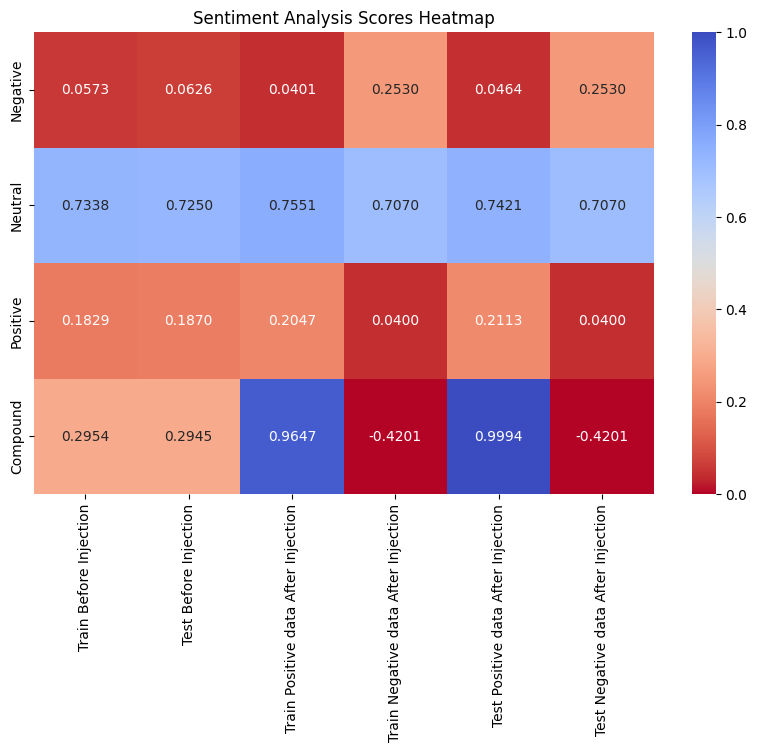

In [10]:
# Prepare the data
data = {
    'Train Before Injection': [0.0573, 0.7338, 0.1829, 0.2954],
    'Test Before Injection': [0.0626, 0.7250, 0.1870, 0.2945],
    'Train Positive data After Injection': [0.0401, 0.7551, 0.2047, 0.9647],
    'Train Negative data After Injection': [0.253, 0.707, 0.040, -0.4201],
    'Test Positive data After Injection': [0.0464, 0.7421, 0.2113, 0.9994],
    'Test Negative data After Injection': [0.253, 0.707, 0.040, -0.4201]
}


# Define the sentiment categories
categories = ['Negative', 'Neutral', 'Positive', 'Compound']

# Create a dataframe
df = pd.DataFrame(data, index=categories)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="coolwarm_r", cbar=True, vmin=0, vmax=1.0, fmt=".4f")
plt.title('Sentiment Analysis Scores Heatmap')
plt.show()